In [1]:
import os
import re
import pandas as pd
import numpy as np

import librosa

from feature_extraction import  mel_freq_cepstrum, dataset_merge, extract_peaks_and_freqs, chunks

from scipy.stats import spearmanr

import matplotlib.pyplot as plt

In [2]:
octave_MIDI = pd.read_csv('/home/jacs/Documents/DataScience/Personal/song_similarity_audio/nsynth-train/MIDI_notes.csv')

In [3]:
octave_MIDI[octave_MIDI['Octave'].apply(lambda x: x in [4,5,6])]

,Octave,C,C#,D,D#,E,F,F#,G,G#,A,A#,B
5,4,60,61,62,63,64,65,66,67,68.0,69.0,70.0,71.0
6,5,72,73,74,75,76,77,78,79,80.0,81.0,82.0,83.0
7,6,84,85,86,87,88,89,90,91,92.0,93.0,94.0,95.0


In [4]:
octave_MIDI#['C'].iloc[0]

,Octave,C,C#,D,D#,E,F,F#,G,G#,A,A#,B
0,-1,0,1,2,3,4,5,6,7,8.0,9.0,10.0,11.0
1,0,12,13,14,15,16,17,18,19,20.0,21.0,22.0,23.0
2,1,24,25,26,27,28,29,30,31,32.0,33.0,34.0,35.0
3,2,36,37,38,39,40,41,42,43,44.0,45.0,46.0,47.0
4,3,48,49,50,51,52,53,54,55,56.0,57.0,58.0,59.0
5,4,60,61,62,63,64,65,66,67,68.0,69.0,70.0,71.0
6,5,72,73,74,75,76,77,78,79,80.0,81.0,82.0,83.0
7,6,84,85,86,87,88,89,90,91,92.0,93.0,94.0,95.0
8,7,96,97,98,99,100,101,102,103,104.0,105.0,106.0,107.0
9,8,108,109,110,111,112,113,114,115,116.0,117.0,118.0,119.0


In [5]:
common_path = '/home/jacs/Documents/DataScience/Personal/'

input_path= 'song_similarity_audio/'

dummy_path = 'song_similarity/'

output_path = 'song_similarity/melodic_contour/'

# As an input there is going to be a list of youtube links that contain audio that can be
# usefull to expand and enrich the database of that particular instrument

# As an input we want a tupple, with the link as first position and instrument as second position


In [6]:
df_into = pd.read_csv(common_path+input_path+'/TinySOL/TinySOL_metadata.csv')
df_into= df_into[df_into['Needed digital retuning']]

In [4]:
notes = list(df_into['Pitch'].unique())

In [5]:
scale_4 = [note for note in notes if len(set('4') & set(note)) != 0]

In [6]:
scale_4_4 = [note for note in scale_4 if len(set('#') & set(note)) == 0]

In [7]:
scale_5 = [note for note in notes if len(set('5') & set(note)) != 0]

In [8]:
scale_6 = [note for note in notes if len(set('6') & set(note)) != 0]

# feature extraction

In [6]:
df_into.iloc[0]['Path']

'Brass/Bass_Tuba/ordinario/BTb-ord-G1-pp-N-R100u.wav'

In [7]:
audio, Fs = librosa.load(common_path+input_path+'/TinySOL/Brass/Bass_Tuba/ordinario/BTb-ord-G1-pp-N-R100u.wav')

## frequencies

In [20]:
def main_frequencies():
    for kk in range(0,len(notes)):
        print(kk)
        note_dataset = notes[kk]
        note_folder = re.sub(' ','_',str(note_dataset)).lower()+'/'
        if not os.path.exists(common_path+output_path+note_folder):
            os.makedirs(common_path+output_path+note_folder)
#        output_file = 'database_{}_cepstrum_features'.format(instrument_folder)
        df_final = pd.DataFrame()
        for woko in df_into[df_into['Pitch'] == note_dataset]['Path']:
            df_final3 = pd.DataFrame()
            wavo = common_path+input_path+'/TinySOL/' + woko
            titulo = woko.split('/')[-1]
            titulo = re.sub('.wav','',str(titulo))
            audio, Fs = librosa.load(wavo)
            length = audio.shape[0] / Fs
            print(f"length = {length}s")
            print(f"num of chunks = {length/0.25}")
            print(titulo)
            chonkos = chunks(audio, Fs, 0.25)
            for chunk in chonkos:
                sp_sorted, freq_sorted, sp_final, freq_final = extract_peaks_and_freqs(chunk, Fs)
                df_final_2 = pd.DataFrame({'10_freq': [list(freq_sorted)[:10]], '10_peak': [list(sp_sorted)[:10]], 'note_played': [note_dataset]})
                df_final3 = pd.concat((df_final3,df_final_2), axis=0).reset_index(drop=True)
            df_final = pd.concat((df_final,df_final3), axis=0).reset_index(drop=True)
        df_final.to_csv(common_path+output_path+'/'+note_folder + note_dataset+'_freq.csv', index=False)

In [8]:
main_frequencies()

0
length = 2.8788662131519276s
num of chunks = 11.51546485260771
BTb-ord-G1-pp-N-R100u


/home/jacs/jorgenv/lib/python3.11/site-packages/scipy/signal/_peak_finding.py:265: ComplexWarning: Casting complex values to real discards the imaginary part
  value = np.asarray(value, order='C', dtype=np.float64)


length = 1.3233106575963718s
num of chunks = 5.293242630385487
BTb-ord-G1-ff-N-T15d


/home/jacs/jorgenv/lib/python3.11/site-packages/scipy/signal/_peak_finding.py:265: ComplexWarning: Casting complex values to real discards the imaginary part
  value = np.asarray(value, order='C', dtype=np.float64)


length = 6.359773242630386s
num of chunks = 25.439092970521543
Hn-ord-G1-mf-N-T40d


/home/jacs/jorgenv/lib/python3.11/site-packages/scipy/signal/_peak_finding.py:265: ComplexWarning: Casting complex values to real discards the imaginary part
  value = np.asarray(value, order='C', dtype=np.float64)


length = 6.40140589569161s
num of chunks = 25.60562358276644
Acc-ord-G1-mf-alt1-T18u


/home/jacs/jorgenv/lib/python3.11/site-packages/scipy/signal/_peak_finding.py:265: ComplexWarning: Casting complex values to real discards the imaginary part
  value = np.asarray(value, order='C', dtype=np.float64)


length = 5.951337868480725s
num of chunks = 23.8053514739229
Acc-ord-G1-ff-N-T20u


/home/jacs/jorgenv/lib/python3.11/site-packages/scipy/signal/_peak_finding.py:265: ComplexWarning: Casting complex values to real discards the imaginary part
  value = np.asarray(value, order='C', dtype=np.float64)


length = 9.212108843537415s
num of chunks = 36.84843537414966
Cb-ord-G1-pp-4c-T10u


/home/jacs/jorgenv/lib/python3.11/site-packages/scipy/signal/_peak_finding.py:265: ComplexWarning: Casting complex values to real discards the imaginary part
  value = np.asarray(value, order='C', dtype=np.float64)


length = 8.335056689342403s
num of chunks = 33.340226757369614
Cb-ord-G1-mf-4c-R100u


/home/jacs/jorgenv/lib/python3.11/site-packages/scipy/signal/_peak_finding.py:265: ComplexWarning: Casting complex values to real discards the imaginary part
  value = np.asarray(value, order='C', dtype=np.float64)


length = 5.515510204081632s
num of chunks = 22.06204081632653
Cb-ord-G1-ff-4c-T12u


/home/jacs/jorgenv/lib/python3.11/site-packages/scipy/signal/_peak_finding.py:265: ComplexWarning: Casting complex values to real discards the imaginary part
  value = np.asarray(value, order='C', dtype=np.float64)


1
length = 3.3387755102040817s
num of chunks = 13.355102040816327
BTb-ord-G#1-pp-N-T16u


/home/jacs/jorgenv/lib/python3.11/site-packages/scipy/signal/_peak_finding.py:265: ComplexWarning: Casting complex values to real discards the imaginary part
  value = np.asarray(value, order='C', dtype=np.float64)


length = 2.823718820861678s
num of chunks = 11.294875283446713
BTb-ord-G#1-mf-N-T18u


/home/jacs/jorgenv/lib/python3.11/site-packages/scipy/signal/_peak_finding.py:265: ComplexWarning: Casting complex values to real discards the imaginary part
  value = np.asarray(value, order='C', dtype=np.float64)


length = 1.4616326530612245s
num of chunks = 5.846530612244898
BTb-ord-G#1-ff-N-T12u


/home/jacs/jorgenv/lib/python3.11/site-packages/scipy/signal/_peak_finding.py:265: ComplexWarning: Casting complex values to real discards the imaginary part
  value = np.asarray(value, order='C', dtype=np.float64)


length = 7.380725623582767s
num of chunks = 29.522902494331067
Acc-ord-G#1-ff-N-T16u


/home/jacs/jorgenv/lib/python3.11/site-packages/scipy/signal/_peak_finding.py:265: ComplexWarning: Casting complex values to real discards the imaginary part
  value = np.asarray(value, order='C', dtype=np.float64)


2
length = 3.0821315192743763s
num of chunks = 12.328526077097505
BTb-ord-A1-pp-N-T23d


/home/jacs/jorgenv/lib/python3.11/site-packages/scipy/signal/_peak_finding.py:265: ComplexWarning: Casting complex values to real discards the imaginary part
  value = np.asarray(value, order='C', dtype=np.float64)


length = 3.5529251700680273s
num of chunks = 14.21170068027211
BTb-ord-A1-mf-N-T33u


/home/jacs/jorgenv/lib/python3.11/site-packages/scipy/signal/_peak_finding.py:265: ComplexWarning: Casting complex values to real discards the imaginary part
  value = np.asarray(value, order='C', dtype=np.float64)


length = 1.3160544217687076s
num of chunks = 5.26421768707483
BTb-ord-A1-ff-N-T19d


/home/jacs/jorgenv/lib/python3.11/site-packages/scipy/signal/_peak_finding.py:265: ComplexWarning: Casting complex values to real discards the imaginary part
  value = np.asarray(value, order='C', dtype=np.float64)


length = 6.765578231292517s
num of chunks = 27.06231292517007
Acc-ord-A1-ff-N-T22u


/home/jacs/jorgenv/lib/python3.11/site-packages/scipy/signal/_peak_finding.py:265: ComplexWarning: Casting complex values to real discards the imaginary part
  value = np.asarray(value, order='C', dtype=np.float64)


3
length = 2.7143764172335603s
num of chunks = 10.857505668934241
BTb-ord-C2-pp-N-T13d


/home/jacs/jorgenv/lib/python3.11/site-packages/scipy/signal/_peak_finding.py:265: ComplexWarning: Casting complex values to real discards the imaginary part
  value = np.asarray(value, order='C', dtype=np.float64)


length = 2.948888888888889s
num of chunks = 11.795555555555556
BTb-ord-C2-mf-N-T23u


/home/jacs/jorgenv/lib/python3.11/site-packages/scipy/signal/_peak_finding.py:265: ComplexWarning: Casting complex values to real discards the imaginary part
  value = np.asarray(value, order='C', dtype=np.float64)


length = 5.967755102040816s
num of chunks = 23.871020408163265
Tbn-ord-C2-pp-N-T23d


/home/jacs/jorgenv/lib/python3.11/site-packages/scipy/signal/_peak_finding.py:265: ComplexWarning: Casting complex values to real discards the imaginary part
  value = np.asarray(value, order='C', dtype=np.float64)


length = 5.036598639455782s
num of chunks = 20.14639455782313
Tbn-ord-C2-mf-N-T44d


/home/jacs/jorgenv/lib/python3.11/site-packages/scipy/signal/_peak_finding.py:265: ComplexWarning: Casting complex values to real discards the imaginary part
  value = np.asarray(value, order='C', dtype=np.float64)


length = 3.231156462585034s
num of chunks = 12.924625850340137
Tbn-ord-C2-ff-N-T58d


/home/jacs/jorgenv/lib/python3.11/site-packages/scipy/signal/_peak_finding.py:265: ComplexWarning: Casting complex values to real discards the imaginary part
  value = np.asarray(value, order='C', dtype=np.float64)


length = 6.864399092970522s
num of chunks = 27.457596371882087
Acc-ord-C2-ff-N-T12u


/home/jacs/jorgenv/lib/python3.11/site-packages/scipy/signal/_peak_finding.py:265: ComplexWarning: Casting complex values to real discards the imaginary part
  value = np.asarray(value, order='C', dtype=np.float64)


length = 5.38312925170068s
num of chunks = 21.53251700680272
Bn-ord-C2-pp-N-T11d_R100u


/home/jacs/jorgenv/lib/python3.11/site-packages/scipy/signal/_peak_finding.py:265: ComplexWarning: Casting complex values to real discards the imaginary part
  value = np.asarray(value, order='C', dtype=np.float64)


4
length = 3.4292970521541952s
num of chunks = 13.717188208616781
BTb-ord-D2-pp-N-T18u


/home/jacs/jorgenv/lib/python3.11/site-packages/scipy/signal/_peak_finding.py:265: ComplexWarning: Casting complex values to real discards the imaginary part
  value = np.asarray(value, order='C', dtype=np.float64)


length = 3.510702947845805s
num of chunks = 14.04281179138322
BTb-ord-D2-mf-N-T15u


/home/jacs/jorgenv/lib/python3.11/site-packages/scipy/signal/_peak_finding.py:265: ComplexWarning: Casting complex values to real discards the imaginary part
  value = np.asarray(value, order='C', dtype=np.float64)


length = 1.415374149659864s
num of chunks = 5.661496598639456
BTb-ord-D2-ff-N-T13u


/home/jacs/jorgenv/lib/python3.11/site-packages/scipy/signal/_peak_finding.py:265: ComplexWarning: Casting complex values to real discards the imaginary part
  value = np.asarray(value, order='C', dtype=np.float64)


length = 4.866802721088435s
num of chunks = 19.46721088435374
Tbn-ord-D2-pp-N-T12d


/home/jacs/jorgenv/lib/python3.11/site-packages/scipy/signal/_peak_finding.py:265: ComplexWarning: Casting complex values to real discards the imaginary part
  value = np.asarray(value, order='C', dtype=np.float64)


length = 4.607437641723356s
num of chunks = 18.429750566893425
Tbn-ord-D2-mf-N-T26d


/home/jacs/jorgenv/lib/python3.11/site-packages/scipy/signal/_peak_finding.py:265: ComplexWarning: Casting complex values to real discards the imaginary part
  value = np.asarray(value, order='C', dtype=np.float64)


length = 3.4151927437641723s
num of chunks = 13.660770975056689
Tbn-ord-D2-ff-N-T37d


/home/jacs/jorgenv/lib/python3.11/site-packages/scipy/signal/_peak_finding.py:265: ComplexWarning: Casting complex values to real discards the imaginary part
  value = np.asarray(value, order='C', dtype=np.float64)


length = 5.503219954648526s
num of chunks = 22.012879818594104
Acc-ord-D2-ff-N-T15u


/home/jacs/jorgenv/lib/python3.11/site-packages/scipy/signal/_peak_finding.py:265: ComplexWarning: Casting complex values to real discards the imaginary part
  value = np.asarray(value, order='C', dtype=np.float64)


length = 9.223401360544218s
num of chunks = 36.89360544217687
Cb-ord-D2-pp-3c-T14d


/home/jacs/jorgenv/lib/python3.11/site-packages/scipy/signal/_peak_finding.py:265: ComplexWarning: Casting complex values to real discards the imaginary part
  value = np.asarray(value, order='C', dtype=np.float64)


length = 5.386077097505669s
num of chunks = 21.544308390022675
Cb-ord-D2-mf-4c-T14u


/home/jacs/jorgenv/lib/python3.11/site-packages/scipy/signal/_peak_finding.py:265: ComplexWarning: Casting complex values to real discards the imaginary part
  value = np.asarray(value, order='C', dtype=np.float64)


length = 4.847301587301588s
num of chunks = 19.38920634920635
Cb-ord-D2-ff-4c-T24u


/home/jacs/jorgenv/lib/python3.11/site-packages/scipy/signal/_peak_finding.py:265: ComplexWarning: Casting complex values to real discards the imaginary part
  value = np.asarray(value, order='C', dtype=np.float64)


5
length = 3.5140136054421767s
num of chunks = 14.056054421768707
BTb-ord-D#2-pp-N-T11u


/home/jacs/jorgenv/lib/python3.11/site-packages/scipy/signal/_peak_finding.py:265: ComplexWarning: Casting complex values to real discards the imaginary part
  value = np.asarray(value, order='C', dtype=np.float64)


length = 2.252018140589569s
num of chunks = 9.008072562358276
BTb-ord-D#2-mf-N-T34u


/home/jacs/jorgenv/lib/python3.11/site-packages/scipy/signal/_peak_finding.py:265: ComplexWarning: Casting complex values to real discards the imaginary part
  value = np.asarray(value, order='C', dtype=np.float64)


length = 5.507392290249433s
num of chunks = 22.02956916099773
Hn-ord-D#2-pp-N-R100u


/home/jacs/jorgenv/lib/python3.11/site-packages/scipy/signal/_peak_finding.py:265: ComplexWarning: Casting complex values to real discards the imaginary part
  value = np.asarray(value, order='C', dtype=np.float64)


length = 5.840952380952381s
num of chunks = 23.363809523809525
Hn-ord-D#2-ff-N-T11u


/home/jacs/jorgenv/lib/python3.11/site-packages/scipy/signal/_peak_finding.py:265: ComplexWarning: Casting complex values to real discards the imaginary part
  value = np.asarray(value, order='C', dtype=np.float64)


length = 5.733424036281179s
num of chunks = 22.933696145124717
Tbn-ord-D#2-pp-N-T14u


/home/jacs/jorgenv/lib/python3.11/site-packages/scipy/signal/_peak_finding.py:265: ComplexWarning: Casting complex values to real discards the imaginary part
  value = np.asarray(value, order='C', dtype=np.float64)


length = 5.766984126984127s
num of chunks = 23.06793650793651
Acc-ord-D#2-ff-N-T11u


/home/jacs/jorgenv/lib/python3.11/site-packages/scipy/signal/_peak_finding.py:265: ComplexWarning: Casting complex values to real discards the imaginary part
  value = np.asarray(value, order='C', dtype=np.float64)


length = 5.335328798185941s
num of chunks = 21.341315192743764
Cb-ord-D#2-mf-4c-T12u


/home/jacs/jorgenv/lib/python3.11/site-packages/scipy/signal/_peak_finding.py:265: ComplexWarning: Casting complex values to real discards the imaginary part
  value = np.asarray(value, order='C', dtype=np.float64)


length = 4.490702947845805s
num of chunks = 17.96281179138322
Cb-ord-D#2-ff-4c-T16u


/home/jacs/jorgenv/lib/python3.11/site-packages/scipy/signal/_peak_finding.py:265: ComplexWarning: Casting complex values to real discards the imaginary part
  value = np.asarray(value, order='C', dtype=np.float64)


length = 5.919501133786848s
num of chunks = 23.67800453514739
Bn-ord-D#2-ff-N-T17d


/home/jacs/jorgenv/lib/python3.11/site-packages/scipy/signal/_peak_finding.py:265: ComplexWarning: Casting complex values to real discards the imaginary part
  value = np.asarray(value, order='C', dtype=np.float64)


6
length = 3.0375056689342403s
num of chunks = 12.150022675736961
BTb-ord-E2-pp-N-T25u


/home/jacs/jorgenv/lib/python3.11/site-packages/scipy/signal/_peak_finding.py:265: ComplexWarning: Casting complex values to real discards the imaginary part
  value = np.asarray(value, order='C', dtype=np.float64)


length = 3.123582766439909s
num of chunks = 12.494331065759637
BTb-ord-E2-mf-N-T27u


/home/jacs/jorgenv/lib/python3.11/site-packages/scipy/signal/_peak_finding.py:265: ComplexWarning: Casting complex values to real discards the imaginary part
  value = np.asarray(value, order='C', dtype=np.float64)


length = 1.479954648526077s
num of chunks = 5.919818594104308
BTb-ord-E2-ff-N-T10u


/home/jacs/jorgenv/lib/python3.11/site-packages/scipy/signal/_peak_finding.py:265: ComplexWarning: Casting complex values to real discards the imaginary part
  value = np.asarray(value, order='C', dtype=np.float64)


length = 5.8434920634920635s
num of chunks = 23.373968253968254
Hn-ord-E2-ff-N-T18u


/home/jacs/jorgenv/lib/python3.11/site-packages/scipy/signal/_peak_finding.py:265: ComplexWarning: Casting complex values to real discards the imaginary part
  value = np.asarray(value, order='C', dtype=np.float64)


length = 5.833061224489796s
num of chunks = 23.332244897959185
Tbn-ord-E2-pp-N-T21u


/home/jacs/jorgenv/lib/python3.11/site-packages/scipy/signal/_peak_finding.py:265: ComplexWarning: Casting complex values to real discards the imaginary part
  value = np.asarray(value, order='C', dtype=np.float64)


length = 3.114784580498866s
num of chunks = 12.459138321995464
Tbn-ord-E2-ff-N-T12d


/home/jacs/jorgenv/lib/python3.11/site-packages/scipy/signal/_peak_finding.py:265: ComplexWarning: Casting complex values to real discards the imaginary part
  value = np.asarray(value, order='C', dtype=np.float64)


length = 6.280907029478458s
num of chunks = 25.12362811791383
Acc-ord-E2-ff-alt1-T10u


/home/jacs/jorgenv/lib/python3.11/site-packages/scipy/signal/_peak_finding.py:265: ComplexWarning: Casting complex values to real discards the imaginary part
  value = np.asarray(value, order='C', dtype=np.float64)


length = 5.538140589569161s
num of chunks = 22.152562358276644
Bn-ord-E2-mf-N-T10u


/home/jacs/jorgenv/lib/python3.11/site-packages/scipy/signal/_peak_finding.py:265: ComplexWarning: Casting complex values to real discards the imaginary part
  value = np.asarray(value, order='C', dtype=np.float64)


7
length = 2.8670294784580497s
num of chunks = 11.468117913832199
BTb-ord-F2-pp-N-T25u_R100u


/home/jacs/jorgenv/lib/python3.11/site-packages/scipy/signal/_peak_finding.py:265: ComplexWarning: Casting complex values to real discards the imaginary part
  value = np.asarray(value, order='C', dtype=np.float64)


length = 3.417233560090703s
num of chunks = 13.668934240362812
BTb-ord-F2-mf-N-T24u


/home/jacs/jorgenv/lib/python3.11/site-packages/scipy/signal/_peak_finding.py:265: ComplexWarning: Casting complex values to real discards the imaginary part
  value = np.asarray(value, order='C', dtype=np.float64)


length = 1.3843537414965987s
num of chunks = 5.537414965986395
BTb-ord-F2-ff-N-T15u


/home/jacs/jorgenv/lib/python3.11/site-packages/scipy/signal/_peak_finding.py:265: ComplexWarning: Casting complex values to real discards the imaginary part
  value = np.asarray(value, order='C', dtype=np.float64)


length = 5.650748299319728s
num of chunks = 22.602993197278913
Hn-ord-F2-ff-N-T11u


/home/jacs/jorgenv/lib/python3.11/site-packages/scipy/signal/_peak_finding.py:265: ComplexWarning: Casting complex values to real discards the imaginary part
  value = np.asarray(value, order='C', dtype=np.float64)


length = 6.816371882086168s
num of chunks = 27.26548752834467
Acc-ord-F2-ff-N-T14u


/home/jacs/jorgenv/lib/python3.11/site-packages/scipy/signal/_peak_finding.py:265: ComplexWarning: Casting complex values to real discards the imaginary part
  value = np.asarray(value, order='C', dtype=np.float64)


length = 7.970975056689342s
num of chunks = 31.88390022675737
Vc-ord-F2-pp-4c-T19u


/home/jacs/jorgenv/lib/python3.11/site-packages/scipy/signal/_peak_finding.py:265: ComplexWarning: Casting complex values to real discards the imaginary part
  value = np.asarray(value, order='C', dtype=np.float64)


length = 7.823990929705215s
num of chunks = 31.29596371882086
Vc-ord-F2-mf-4c-T17u


/home/jacs/jorgenv/lib/python3.11/site-packages/scipy/signal/_peak_finding.py:265: ComplexWarning: Casting complex values to real discards the imaginary part
  value = np.asarray(value, order='C', dtype=np.float64)


length = 7.446031746031746s
num of chunks = 29.784126984126985
Vc-ord-F2-ff-4c-T17u


/home/jacs/jorgenv/lib/python3.11/site-packages/scipy/signal/_peak_finding.py:265: ComplexWarning: Casting complex values to real discards the imaginary part
  value = np.asarray(value, order='C', dtype=np.float64)


length = 5.092380952380952s
num of chunks = 20.36952380952381
Cb-ord-F2-ff-4c-T12u


/home/jacs/jorgenv/lib/python3.11/site-packages/scipy/signal/_peak_finding.py:265: ComplexWarning: Casting complex values to real discards the imaginary part
  value = np.asarray(value, order='C', dtype=np.float64)


length = 5.956145124716553s
num of chunks = 23.82458049886621
Bn-ord-F2-pp-N-T17d


/home/jacs/jorgenv/lib/python3.11/site-packages/scipy/signal/_peak_finding.py:265: ComplexWarning: Casting complex values to real discards the imaginary part
  value = np.asarray(value, order='C', dtype=np.float64)


length = 6.012517006802721s
num of chunks = 24.050068027210884
Bn-ord-F2-ff-N-T10d


/home/jacs/jorgenv/lib/python3.11/site-packages/scipy/signal/_peak_finding.py:265: ComplexWarning: Casting complex values to real discards the imaginary part
  value = np.asarray(value, order='C', dtype=np.float64)


8
length = 2.8862131519274374s
num of chunks = 11.54485260770975
BTb-ord-F#2-pp-N-T14u


/home/jacs/jorgenv/lib/python3.11/site-packages/scipy/signal/_peak_finding.py:265: ComplexWarning: Casting complex values to real discards the imaginary part
  value = np.asarray(value, order='C', dtype=np.float64)


length = 3.573424036281179s
num of chunks = 14.293696145124716
BTb-ord-F#2-mf-N-T19u


/home/jacs/jorgenv/lib/python3.11/site-packages/scipy/signal/_peak_finding.py:265: ComplexWarning: Casting complex values to real discards the imaginary part
  value = np.asarray(value, order='C', dtype=np.float64)


length = 5.552426303854875s
num of chunks = 22.2097052154195
Tbn-ord-F#2-pp-N-T20d


/home/jacs/jorgenv/lib/python3.11/site-packages/scipy/signal/_peak_finding.py:265: ComplexWarning: Casting complex values to real discards the imaginary part
  value = np.asarray(value, order='C', dtype=np.float64)


length = 5.387301587301588s
num of chunks = 21.54920634920635
Tbn-ord-F#2-mf-N-T28d


/home/jacs/jorgenv/lib/python3.11/site-packages/scipy/signal/_peak_finding.py:265: ComplexWarning: Casting complex values to real discards the imaginary part
  value = np.asarray(value, order='C', dtype=np.float64)


length = 3.813968253968254s
num of chunks = 15.255873015873016
Tbn-ord-F#2-ff-N-T24d


/home/jacs/jorgenv/lib/python3.11/site-packages/scipy/signal/_peak_finding.py:265: ComplexWarning: Casting complex values to real discards the imaginary part
  value = np.asarray(value, order='C', dtype=np.float64)


length = 6.26625850340136s
num of chunks = 25.06503401360544
Cb-ord-F#2-pp-4c-T15u


/home/jacs/jorgenv/lib/python3.11/site-packages/scipy/signal/_peak_finding.py:265: ComplexWarning: Casting complex values to real discards the imaginary part
  value = np.asarray(value, order='C', dtype=np.float64)


length = 4.967120181405896s
num of chunks = 19.868480725623584
Cb-ord-F#2-mf-3c-T12u


/home/jacs/jorgenv/lib/python3.11/site-packages/scipy/signal/_peak_finding.py:265: ComplexWarning: Casting complex values to real discards the imaginary part
  value = np.asarray(value, order='C', dtype=np.float64)


length = 5.84562358276644s
num of chunks = 23.38249433106576
Cb-ord-F#2-mf-4c-T10u


/home/jacs/jorgenv/lib/python3.11/site-packages/scipy/signal/_peak_finding.py:265: ComplexWarning: Casting complex values to real discards the imaginary part
  value = np.asarray(value, order='C', dtype=np.float64)


length = 5.188390022675737s
num of chunks = 20.753560090702948
Cb-ord-F#2-ff-4c-T31u


/home/jacs/jorgenv/lib/python3.11/site-packages/scipy/signal/_peak_finding.py:265: ComplexWarning: Casting complex values to real discards the imaginary part
  value = np.asarray(value, order='C', dtype=np.float64)


length = 5.691972789115646s
num of chunks = 22.767891156462586
Bn-ord-F#2-pp-N-T12d


/home/jacs/jorgenv/lib/python3.11/site-packages/scipy/signal/_peak_finding.py:265: ComplexWarning: Casting complex values to real discards the imaginary part
  value = np.asarray(value, order='C', dtype=np.float64)


9
length = 3.244716553287982s
num of chunks = 12.978866213151928
BTb-ord-G#2-pp-N-T16u


/home/jacs/jorgenv/lib/python3.11/site-packages/scipy/signal/_peak_finding.py:265: ComplexWarning: Casting complex values to real discards the imaginary part
  value = np.asarray(value, order='C', dtype=np.float64)


length = 3.8848979591836734s
num of chunks = 15.539591836734694
BTb-ord-G#2-mf-N-T26u


/home/jacs/jorgenv/lib/python3.11/site-packages/scipy/signal/_peak_finding.py:265: ComplexWarning: Casting complex values to real discards the imaginary part
  value = np.asarray(value, order='C', dtype=np.float64)


length = 5.677052154195011s
num of chunks = 22.708208616780045
Tbn-ord-G#2-pp-N-T27u


/home/jacs/jorgenv/lib/python3.11/site-packages/scipy/signal/_peak_finding.py:265: ComplexWarning: Casting complex values to real discards the imaginary part
  value = np.asarray(value, order='C', dtype=np.float64)


length = 4.033106575963719s
num of chunks = 16.132426303854874
Tbn-ord-G#2-ff-N-T15u


/home/jacs/jorgenv/lib/python3.11/site-packages/scipy/signal/_peak_finding.py:265: ComplexWarning: Casting complex values to real discards the imaginary part
  value = np.asarray(value, order='C', dtype=np.float64)


length = 7.559909297052154s
num of chunks = 30.239637188208615
Vc-ord-G#2-ff-3c-T10d


/home/jacs/jorgenv/lib/python3.11/site-packages/scipy/signal/_peak_finding.py:265: ComplexWarning: Casting complex values to real discards the imaginary part
  value = np.asarray(value, order='C', dtype=np.float64)


length = 8.159501133786849s
num of chunks = 32.638004535147395
Vc-ord-G#2-ff-4c-T12u


/home/jacs/jorgenv/lib/python3.11/site-packages/scipy/signal/_peak_finding.py:265: ComplexWarning: Casting complex values to real discards the imaginary part
  value = np.asarray(value, order='C', dtype=np.float64)


length = 6.55297052154195s
num of chunks = 26.2118820861678
Cb-ord-G#2-pp-4c-T21u


/home/jacs/jorgenv/lib/python3.11/site-packages/scipy/signal/_peak_finding.py:265: ComplexWarning: Casting complex values to real discards the imaginary part
  value = np.asarray(value, order='C', dtype=np.float64)


length = 4.5095238095238095s
num of chunks = 18.038095238095238
Cb-ord-G#2-mf-3c-T10u


/home/jacs/jorgenv/lib/python3.11/site-packages/scipy/signal/_peak_finding.py:265: ComplexWarning: Casting complex values to real discards the imaginary part
  value = np.asarray(value, order='C', dtype=np.float64)


length = 4.865034013605442s
num of chunks = 19.460136054421767
Cb-ord-G#2-mf-4c-T12u


/home/jacs/jorgenv/lib/python3.11/site-packages/scipy/signal/_peak_finding.py:265: ComplexWarning: Casting complex values to real discards the imaginary part
  value = np.asarray(value, order='C', dtype=np.float64)


length = 4.3271201814058955s
num of chunks = 17.308480725623582
Cb-ord-G#2-ff-3c-T30u


/home/jacs/jorgenv/lib/python3.11/site-packages/scipy/signal/_peak_finding.py:265: ComplexWarning: Casting complex values to real discards the imaginary part
  value = np.asarray(value, order='C', dtype=np.float64)


length = 4.058548752834467s
num of chunks = 16.234195011337867
Cb-ord-G#2-ff-4c-T28u


/home/jacs/jorgenv/lib/python3.11/site-packages/scipy/signal/_peak_finding.py:265: ComplexWarning: Casting complex values to real discards the imaginary part
  value = np.asarray(value, order='C', dtype=np.float64)


length = 5.959229024943311s
num of chunks = 23.836916099773244
Bn-ord-G#2-pp-N-T16d


/home/jacs/jorgenv/lib/python3.11/site-packages/scipy/signal/_peak_finding.py:265: ComplexWarning: Casting complex values to real discards the imaginary part
  value = np.asarray(value, order='C', dtype=np.float64)


length = 5.935736961451247s
num of chunks = 23.742947845804988
Bn-ord-G#2-mf-N-R100d


/home/jacs/jorgenv/lib/python3.11/site-packages/scipy/signal/_peak_finding.py:265: ComplexWarning: Casting complex values to real discards the imaginary part
  value = np.asarray(value, order='C', dtype=np.float64)


10
length = 2.7454875283446714s
num of chunks = 10.981950113378685
BTb-ord-A2-pp-N-T15u


/home/jacs/jorgenv/lib/python3.11/site-packages/scipy/signal/_peak_finding.py:265: ComplexWarning: Casting complex values to real discards the imaginary part
  value = np.asarray(value, order='C', dtype=np.float64)


length = 3.6494331065759638s
num of chunks = 14.597732426303855
BTb-ord-A2-mf-N-T29u


/home/jacs/jorgenv/lib/python3.11/site-packages/scipy/signal/_peak_finding.py:265: ComplexWarning: Casting complex values to real discards the imaginary part
  value = np.asarray(value, order='C', dtype=np.float64)


length = 5.789931972789116s
num of chunks = 23.159727891156464
Hn-ord-A2-pp-N-R100u


/home/jacs/jorgenv/lib/python3.11/site-packages/scipy/signal/_peak_finding.py:265: ComplexWarning: Casting complex values to real discards the imaginary part
  value = np.asarray(value, order='C', dtype=np.float64)


length = 8.627891156462585s
num of chunks = 34.51156462585034
Vc-ord-A2-ff-3c-T19d


/home/jacs/jorgenv/lib/python3.11/site-packages/scipy/signal/_peak_finding.py:265: ComplexWarning: Casting complex values to real discards the imaginary part
  value = np.asarray(value, order='C', dtype=np.float64)


length = 6.375691609977324s
num of chunks = 25.502766439909298
Cb-ord-A2-pp-2c-T12d


/home/jacs/jorgenv/lib/python3.11/site-packages/scipy/signal/_peak_finding.py:265: ComplexWarning: Casting complex values to real discards the imaginary part
  value = np.asarray(value, order='C', dtype=np.float64)


length = 5.235555555555556s
num of chunks = 20.942222222222224
Cb-ord-A2-pp-3c-T12d


/home/jacs/jorgenv/lib/python3.11/site-packages/scipy/signal/_peak_finding.py:265: ComplexWarning: Casting complex values to real discards the imaginary part
  value = np.asarray(value, order='C', dtype=np.float64)


length = 4.882131519274377s
num of chunks = 19.528526077097506
Cb-ord-A2-mf-3c-R100d


/home/jacs/jorgenv/lib/python3.11/site-packages/scipy/signal/_peak_finding.py:265: ComplexWarning: Casting complex values to real discards the imaginary part
  value = np.asarray(value, order='C', dtype=np.float64)


length = 4.80390022675737s
num of chunks = 19.21560090702948
Cb-ord-A2-ff-1c-R100d


/home/jacs/jorgenv/lib/python3.11/site-packages/scipy/signal/_peak_finding.py:265: ComplexWarning: Casting complex values to real discards the imaginary part
  value = np.asarray(value, order='C', dtype=np.float64)


length = 4.473514739229025s
num of chunks = 17.8940589569161
Cb-ord-A2-ff-4c-T17u


/home/jacs/jorgenv/lib/python3.11/site-packages/scipy/signal/_peak_finding.py:265: ComplexWarning: Casting complex values to real discards the imaginary part
  value = np.asarray(value, order='C', dtype=np.float64)


length = 5.659002267573696s
num of chunks = 22.636009070294783
Bn-ord-A2-ff-N-T11d


/home/jacs/jorgenv/lib/python3.11/site-packages/scipy/signal/_peak_finding.py:265: ComplexWarning: Casting complex values to real discards the imaginary part
  value = np.asarray(value, order='C', dtype=np.float64)


11
length = 2.933015873015873s
num of chunks = 11.732063492063492
BTb-ord-B2-pp-N-T11d


/home/jacs/jorgenv/lib/python3.11/site-packages/scipy/signal/_peak_finding.py:265: ComplexWarning: Casting complex values to real discards the imaginary part
  value = np.asarray(value, order='C', dtype=np.float64)


length = 3.7410430839002267s
num of chunks = 14.964172335600907
BTb-ord-B2-mf-N-T17u


/home/jacs/jorgenv/lib/python3.11/site-packages/scipy/signal/_peak_finding.py:265: ComplexWarning: Casting complex values to real discards the imaginary part
  value = np.asarray(value, order='C', dtype=np.float64)


length = 6.127165532879818s
num of chunks = 24.508662131519273
Tbn-ord-B2-pp-N-T19d


/home/jacs/jorgenv/lib/python3.11/site-packages/scipy/signal/_peak_finding.py:265: ComplexWarning: Casting complex values to real discards the imaginary part
  value = np.asarray(value, order='C', dtype=np.float64)


length = 4.936417233560091s
num of chunks = 19.745668934240364
Tbn-ord-B2-mf-N-T26d


/home/jacs/jorgenv/lib/python3.11/site-packages/scipy/signal/_peak_finding.py:265: ComplexWarning: Casting complex values to real discards the imaginary part
  value = np.asarray(value, order='C', dtype=np.float64)


length = 4.466031746031746s
num of chunks = 17.864126984126983
Tbn-ord-B2-ff-N-T26d


/home/jacs/jorgenv/lib/python3.11/site-packages/scipy/signal/_peak_finding.py:265: ComplexWarning: Casting complex values to real discards the imaginary part
  value = np.asarray(value, order='C', dtype=np.float64)


length = 6.092789115646259s
num of chunks = 24.371156462585034
Acc-ord-B2-ff-N-T14u


/home/jacs/jorgenv/lib/python3.11/site-packages/scipy/signal/_peak_finding.py:265: ComplexWarning: Casting complex values to real discards the imaginary part
  value = np.asarray(value, order='C', dtype=np.float64)


length = 7.131111111111111s
num of chunks = 28.524444444444445
Acc-ord-B2-ff-alt1-T13u


/home/jacs/jorgenv/lib/python3.11/site-packages/scipy/signal/_peak_finding.py:265: ComplexWarning: Casting complex values to real discards the imaginary part
  value = np.asarray(value, order='C', dtype=np.float64)


length = 7.822675736961451s
num of chunks = 31.290702947845805
Vc-ord-B2-pp-4c-T16u


/home/jacs/jorgenv/lib/python3.11/site-packages/scipy/signal/_peak_finding.py:265: ComplexWarning: Casting complex values to real discards the imaginary part
  value = np.asarray(value, order='C', dtype=np.float64)


length = 7.04453514739229s
num of chunks = 28.17814058956916
Vc-ord-B2-mf-4c-T20u


/home/jacs/jorgenv/lib/python3.11/site-packages/scipy/signal/_peak_finding.py:265: ComplexWarning: Casting complex values to real discards the imaginary part
  value = np.asarray(value, order='C', dtype=np.float64)


length = 6.89297052154195s
num of chunks = 27.5718820861678
Vc-ord-B2-ff-4c-T11u


/home/jacs/jorgenv/lib/python3.11/site-packages/scipy/signal/_peak_finding.py:265: ComplexWarning: Casting complex values to real discards the imaginary part
  value = np.asarray(value, order='C', dtype=np.float64)


length = 5.6696145124716555s
num of chunks = 22.678458049886622
Cb-ord-B2-mf-3c-T10u


/home/jacs/jorgenv/lib/python3.11/site-packages/scipy/signal/_peak_finding.py:265: ComplexWarning: Casting complex values to real discards the imaginary part
  value = np.asarray(value, order='C', dtype=np.float64)


length = 5.071473922902494s
num of chunks = 20.285895691609976
Cb-ord-B2-ff-3c-T17u


/home/jacs/jorgenv/lib/python3.11/site-packages/scipy/signal/_peak_finding.py:265: ComplexWarning: Casting complex values to real discards the imaginary part
  value = np.asarray(value, order='C', dtype=np.float64)


length = 5.096326530612245s
num of chunks = 20.38530612244898
Cb-ord-B2-ff-4c-T25u


/home/jacs/jorgenv/lib/python3.11/site-packages/scipy/signal/_peak_finding.py:265: ComplexWarning: Casting complex values to real discards the imaginary part
  value = np.asarray(value, order='C', dtype=np.float64)


12
length = 3.1136961451247167s
num of chunks = 12.454784580498867
BTb-ord-C3-pp-N-T11d


/home/jacs/jorgenv/lib/python3.11/site-packages/scipy/signal/_peak_finding.py:265: ComplexWarning: Casting complex values to real discards the imaginary part
  value = np.asarray(value, order='C', dtype=np.float64)


length = 3.07687074829932s
num of chunks = 12.30748299319728
BTb-ord-C3-mf-N-T28u


/home/jacs/jorgenv/lib/python3.11/site-packages/scipy/signal/_peak_finding.py:265: ComplexWarning: Casting complex values to real discards the imaginary part
  value = np.asarray(value, order='C', dtype=np.float64)


length = 1.4193650793650794s
num of chunks = 5.6774603174603175
BTb-ord-C3-ff-N-T18u


/home/jacs/jorgenv/lib/python3.11/site-packages/scipy/signal/_peak_finding.py:265: ComplexWarning: Casting complex values to real discards the imaginary part
  value = np.asarray(value, order='C', dtype=np.float64)


length = 6.028934240362812s
num of chunks = 24.115736961451248
Tbn-ord-C3-pp-N-T25d


/home/jacs/jorgenv/lib/python3.11/site-packages/scipy/signal/_peak_finding.py:265: ComplexWarning: Casting complex values to real discards the imaginary part
  value = np.asarray(value, order='C', dtype=np.float64)


length = 6.215192743764172s
num of chunks = 24.86077097505669
Tbn-ord-C3-mf-N-T18d


/home/jacs/jorgenv/lib/python3.11/site-packages/scipy/signal/_peak_finding.py:265: ComplexWarning: Casting complex values to real discards the imaginary part
  value = np.asarray(value, order='C', dtype=np.float64)


length = 4.411473922902494s
num of chunks = 17.645895691609976
Tbn-ord-C3-ff-N-T25d


/home/jacs/jorgenv/lib/python3.11/site-packages/scipy/signal/_peak_finding.py:265: ComplexWarning: Casting complex values to real discards the imaginary part
  value = np.asarray(value, order='C', dtype=np.float64)


length = 4.586077097505669s
num of chunks = 18.344308390022675
Cb-ord-C3-mf-2c-T12u


/home/jacs/jorgenv/lib/python3.11/site-packages/scipy/signal/_peak_finding.py:265: ComplexWarning: Casting complex values to real discards the imaginary part
  value = np.asarray(value, order='C', dtype=np.float64)


length = 4.067165532879819s
num of chunks = 16.268662131519275
Cb-ord-C3-ff-2c-T13u


/home/jacs/jorgenv/lib/python3.11/site-packages/scipy/signal/_peak_finding.py:265: ComplexWarning: Casting complex values to real discards the imaginary part
  value = np.asarray(value, order='C', dtype=np.float64)


length = 3.9262131519274375s
num of chunks = 15.70485260770975
Cb-ord-C3-ff-4c-T14u


/home/jacs/jorgenv/lib/python3.11/site-packages/scipy/signal/_peak_finding.py:265: ComplexWarning: Casting complex values to real discards the imaginary part
  value = np.asarray(value, order='C', dtype=np.float64)


length = 5.717324263038549s
num of chunks = 22.869297052154195
Bn-ord-C3-pp-N-T15d


/home/jacs/jorgenv/lib/python3.11/site-packages/scipy/signal/_peak_finding.py:265: ComplexWarning: Casting complex values to real discards the imaginary part
  value = np.asarray(value, order='C', dtype=np.float64)


length = 5.264036281179139s
num of chunks = 21.056145124716554
Bn-ord-C3-mf-N-R100u


/home/jacs/jorgenv/lib/python3.11/site-packages/scipy/signal/_peak_finding.py:265: ComplexWarning: Casting complex values to real discards the imaginary part
  value = np.asarray(value, order='C', dtype=np.float64)


length = 5.914467120181406s
num of chunks = 23.657868480725625
Bn-ord-C3-ff-N-T12d


/home/jacs/jorgenv/lib/python3.11/site-packages/scipy/signal/_peak_finding.py:265: ComplexWarning: Casting complex values to real discards the imaginary part
  value = np.asarray(value, order='C', dtype=np.float64)


13
length = 3.2635374149659864s
num of chunks = 13.054149659863945
BTb-ord-G3-pp-N-T14d


/home/jacs/jorgenv/lib/python3.11/site-packages/scipy/signal/_peak_finding.py:265: ComplexWarning: Casting complex values to real discards the imaginary part
  value = np.asarray(value, order='C', dtype=np.float64)


length = 3.702312925170068s
num of chunks = 14.809251700680273
BTb-ord-G3-mf-N-T14u


/home/jacs/jorgenv/lib/python3.11/site-packages/scipy/signal/_peak_finding.py:265: ComplexWarning: Casting complex values to real discards the imaginary part
  value = np.asarray(value, order='C', dtype=np.float64)


length = 1.4463945578231292s
num of chunks = 5.785578231292517
BTb-ord-G3-ff-N-T14u


/home/jacs/jorgenv/lib/python3.11/site-packages/scipy/signal/_peak_finding.py:265: ComplexWarning: Casting complex values to real discards the imaginary part
  value = np.asarray(value, order='C', dtype=np.float64)


length = 5.57469387755102s
num of chunks = 22.29877551020408
Tbn-ord-G3-mf-N-T18d


/home/jacs/jorgenv/lib/python3.11/site-packages/scipy/signal/_peak_finding.py:265: ComplexWarning: Casting complex values to real discards the imaginary part
  value = np.asarray(value, order='C', dtype=np.float64)


length = 6.366122448979592s
num of chunks = 25.464489795918368
TpC-ord-G3-mf-N-T12u


/home/jacs/jorgenv/lib/python3.11/site-packages/scipy/signal/_peak_finding.py:265: ComplexWarning: Casting complex values to real discards the imaginary part
  value = np.asarray(value, order='C', dtype=np.float64)


length = 5.98140589569161s
num of chunks = 23.92562358276644
TpC-ord-G3-ff-N-T21u


/home/jacs/jorgenv/lib/python3.11/site-packages/scipy/signal/_peak_finding.py:265: ComplexWarning: Casting complex values to real discards the imaginary part
  value = np.asarray(value, order='C', dtype=np.float64)


length = 5.807437641723356s
num of chunks = 23.229750566893426
Cb-ord-G3-pp-1c-T11d


/home/jacs/jorgenv/lib/python3.11/site-packages/scipy/signal/_peak_finding.py:265: ComplexWarning: Casting complex values to real discards the imaginary part
  value = np.asarray(value, order='C', dtype=np.float64)


length = 5.64625850340136s
num of chunks = 22.58503401360544
Cb-ord-G3-pp-2c-T13d


/home/jacs/jorgenv/lib/python3.11/site-packages/scipy/signal/_peak_finding.py:265: ComplexWarning: Casting complex values to real discards the imaginary part
  value = np.asarray(value, order='C', dtype=np.float64)


length = 3.7956916099773244s
num of chunks = 15.182766439909297
Cb-ord-G3-ff-2c-T22u


/home/jacs/jorgenv/lib/python3.11/site-packages/scipy/signal/_peak_finding.py:265: ComplexWarning: Casting complex values to real discards the imaginary part
  value = np.asarray(value, order='C', dtype=np.float64)


length = 4.485170068027211s
num of chunks = 17.940680272108843
Cb-ord-G3-ff-3c-T16u


/home/jacs/jorgenv/lib/python3.11/site-packages/scipy/signal/_peak_finding.py:265: ComplexWarning: Casting complex values to real discards the imaginary part
  value = np.asarray(value, order='C', dtype=np.float64)


length = 8.049659863945578s
num of chunks = 32.19863945578231
Va-ord-G3-pp-4c-T19u


/home/jacs/jorgenv/lib/python3.11/site-packages/scipy/signal/_peak_finding.py:265: ComplexWarning: Casting complex values to real discards the imaginary part
  value = np.asarray(value, order='C', dtype=np.float64)


length = 7.489931972789115s
num of chunks = 29.95972789115646
Va-ord-G3-mf-4c-T21u


/home/jacs/jorgenv/lib/python3.11/site-packages/scipy/signal/_peak_finding.py:265: ComplexWarning: Casting complex values to real discards the imaginary part
  value = np.asarray(value, order='C', dtype=np.float64)


length = 7.762675736961452s
num of chunks = 31.050702947845807
Va-ord-G3-ff-4c-T22u


/home/jacs/jorgenv/lib/python3.11/site-packages/scipy/signal/_peak_finding.py:265: ComplexWarning: Casting complex values to real discards the imaginary part
  value = np.asarray(value, order='C', dtype=np.float64)


length = 6.610430839002268s
num of chunks = 26.44172335600907
ClBb-ord-G3-pp-N-T12d


/home/jacs/jorgenv/lib/python3.11/site-packages/scipy/signal/_peak_finding.py:265: ComplexWarning: Casting complex values to real discards the imaginary part
  value = np.asarray(value, order='C', dtype=np.float64)


length = 6.716916099773242s
num of chunks = 26.86766439909297
ClBb-ord-G3-ff-N-T20u


/home/jacs/jorgenv/lib/python3.11/site-packages/scipy/signal/_peak_finding.py:265: ComplexWarning: Casting complex values to real discards the imaginary part
  value = np.asarray(value, order='C', dtype=np.float64)


14
length = 2.889342403628118s
num of chunks = 11.557369614512472
BTb-ord-A#3-pp-N-T13d


/home/jacs/jorgenv/lib/python3.11/site-packages/scipy/signal/_peak_finding.py:265: ComplexWarning: Casting complex values to real discards the imaginary part
  value = np.asarray(value, order='C', dtype=np.float64)


length = 4.20281179138322s
num of chunks = 16.81124716553288
BTb-ord-A#3-mf-N-T14u


/home/jacs/jorgenv/lib/python3.11/site-packages/scipy/signal/_peak_finding.py:265: ComplexWarning: Casting complex values to real discards the imaginary part
  value = np.asarray(value, order='C', dtype=np.float64)


length = 5.960045351473923s
num of chunks = 23.84018140589569
TpC-ord-A#3-ff-N-T23u_R100u


/home/jacs/jorgenv/lib/python3.11/site-packages/scipy/signal/_peak_finding.py:265: ComplexWarning: Casting complex values to real discards the imaginary part
  value = np.asarray(value, order='C', dtype=np.float64)


length = 9.17954648526077s
num of chunks = 36.71818594104308
Vc-ord-A#3-pp-2c-T12u


/home/jacs/jorgenv/lib/python3.11/site-packages/scipy/signal/_peak_finding.py:265: ComplexWarning: Casting complex values to real discards the imaginary part
  value = np.asarray(value, order='C', dtype=np.float64)


length = 7.7561904761904765s
num of chunks = 31.024761904761906
Vc-ord-A#3-mf-2c-T12u


/home/jacs/jorgenv/lib/python3.11/site-packages/scipy/signal/_peak_finding.py:265: ComplexWarning: Casting complex values to real discards the imaginary part
  value = np.asarray(value, order='C', dtype=np.float64)


length = 9.58984126984127s
num of chunks = 38.35936507936508
Vc-ord-A#3-mf-3c-T16d_R100u


/home/jacs/jorgenv/lib/python3.11/site-packages/scipy/signal/_peak_finding.py:265: ComplexWarning: Casting complex values to real discards the imaginary part
  value = np.asarray(value, order='C', dtype=np.float64)


length = 8.025351473922903s
num of chunks = 32.10140589569161
Vc-ord-A#3-ff-2c-T12u


/home/jacs/jorgenv/lib/python3.11/site-packages/scipy/signal/_peak_finding.py:265: ComplexWarning: Casting complex values to real discards the imaginary part
  value = np.asarray(value, order='C', dtype=np.float64)


length = 7.57374149659864s
num of chunks = 30.29496598639456
Vn-ord-A#3-ff-4c-T15u


/home/jacs/jorgenv/lib/python3.11/site-packages/scipy/signal/_peak_finding.py:265: ComplexWarning: Casting complex values to real discards the imaginary part
  value = np.asarray(value, order='C', dtype=np.float64)


length = 6.381904761904762s
num of chunks = 25.527619047619048
ClBb-ord-A#3-ff-N-T13u


/home/jacs/jorgenv/lib/python3.11/site-packages/scipy/signal/_peak_finding.py:265: ComplexWarning: Casting complex values to real discards the imaginary part
  value = np.asarray(value, order='C', dtype=np.float64)


length = 6.691972789115646s
num of chunks = 26.767891156462586
Ob-ord-A#3-pp-N-T12d


/home/jacs/jorgenv/lib/python3.11/site-packages/scipy/signal/_peak_finding.py:265: ComplexWarning: Casting complex values to real discards the imaginary part
  value = np.asarray(value, order='C', dtype=np.float64)


length = 7.161043083900227s
num of chunks = 28.644172335600906
Ob-ord-A#3-ff-N-T10d


/home/jacs/jorgenv/lib/python3.11/site-packages/scipy/signal/_peak_finding.py:265: ComplexWarning: Casting complex values to real discards the imaginary part
  value = np.asarray(value, order='C', dtype=np.float64)


15
length = 3.1388208616780044s
num of chunks = 12.555283446712018
BTb-ord-B3-pp-N-T14d


/home/jacs/jorgenv/lib/python3.11/site-packages/scipy/signal/_peak_finding.py:265: ComplexWarning: Casting complex values to real discards the imaginary part
  value = np.asarray(value, order='C', dtype=np.float64)


length = 1.4124263038548752s
num of chunks = 5.649705215419501
BTb-ord-B3-ff-N-T18d


/home/jacs/jorgenv/lib/python3.11/site-packages/scipy/signal/_peak_finding.py:265: ComplexWarning: Casting complex values to real discards the imaginary part
  value = np.asarray(value, order='C', dtype=np.float64)


length = 7.030702947845805s
num of chunks = 28.12281179138322
TpC-ord-B3-ff-N-R100d


/home/jacs/jorgenv/lib/python3.11/site-packages/scipy/signal/_peak_finding.py:265: ComplexWarning: Casting complex values to real discards the imaginary part
  value = np.asarray(value, order='C', dtype=np.float64)


length = 7.587165532879818s
num of chunks = 30.348662131519273
Acc-ord-B3-mf-alt4-T10d


/home/jacs/jorgenv/lib/python3.11/site-packages/scipy/signal/_peak_finding.py:265: ComplexWarning: Casting complex values to real discards the imaginary part
  value = np.asarray(value, order='C', dtype=np.float64)


length = 7.523174603174603s
num of chunks = 30.09269841269841
Vc-ord-B3-ff-1c-T11u


/home/jacs/jorgenv/lib/python3.11/site-packages/scipy/signal/_peak_finding.py:265: ComplexWarning: Casting complex values to real discards the imaginary part
  value = np.asarray(value, order='C', dtype=np.float64)


length = 7.114240362811791s
num of chunks = 28.456961451247164
Vc-ord-B3-ff-3c-T11u


/home/jacs/jorgenv/lib/python3.11/site-packages/scipy/signal/_peak_finding.py:265: ComplexWarning: Casting complex values to real discards the imaginary part
  value = np.asarray(value, order='C', dtype=np.float64)


length = 7.243265306122449s
num of chunks = 28.973061224489797
Va-ord-B3-pp-3c-T12u


/home/jacs/jorgenv/lib/python3.11/site-packages/scipy/signal/_peak_finding.py:265: ComplexWarning: Casting complex values to real discards the imaginary part
  value = np.asarray(value, order='C', dtype=np.float64)


length = 7.479002267573696s
num of chunks = 29.916009070294784
Va-ord-B3-mf-3c-T16u


/home/jacs/jorgenv/lib/python3.11/site-packages/scipy/signal/_peak_finding.py:265: ComplexWarning: Casting complex values to real discards the imaginary part
  value = np.asarray(value, order='C', dtype=np.float64)


length = 8.133832199546486s
num of chunks = 32.535328798185944
Va-ord-B3-ff-3c-T18u


/home/jacs/jorgenv/lib/python3.11/site-packages/scipy/signal/_peak_finding.py:265: ComplexWarning: Casting complex values to real discards the imaginary part
  value = np.asarray(value, order='C', dtype=np.float64)


length = 7.164580498866213s
num of chunks = 28.658321995464853
Vn-ord-B3-pp-4c-T10u


/home/jacs/jorgenv/lib/python3.11/site-packages/scipy/signal/_peak_finding.py:265: ComplexWarning: Casting complex values to real discards the imaginary part
  value = np.asarray(value, order='C', dtype=np.float64)


length = 8.538684807256235s
num of chunks = 34.15473922902494
Vn-ord-B3-mf-4c-T15u


/home/jacs/jorgenv/lib/python3.11/site-packages/scipy/signal/_peak_finding.py:265: ComplexWarning: Casting complex values to real discards the imaginary part
  value = np.asarray(value, order='C', dtype=np.float64)


length = 8.231111111111112s
num of chunks = 32.92444444444445
Vn-ord-B3-ff-4c-T17u


/home/jacs/jorgenv/lib/python3.11/site-packages/scipy/signal/_peak_finding.py:265: ComplexWarning: Casting complex values to real discards the imaginary part
  value = np.asarray(value, order='C', dtype=np.float64)


length = 6.489024943310658s
num of chunks = 25.95609977324263
ClBb-ord-B3-pp-N-T12d


/home/jacs/jorgenv/lib/python3.11/site-packages/scipy/signal/_peak_finding.py:265: ComplexWarning: Casting complex values to real discards the imaginary part
  value = np.asarray(value, order='C', dtype=np.float64)


length = 6.526485260770975s
num of chunks = 26.1059410430839
ClBb-ord-B3-ff-N-T16u


/home/jacs/jorgenv/lib/python3.11/site-packages/scipy/signal/_peak_finding.py:265: ComplexWarning: Casting complex values to real discards the imaginary part
  value = np.asarray(value, order='C', dtype=np.float64)


length = 5.732063492063492s
num of chunks = 22.92825396825397
Fl-ord-B3-pp-N-T19u


/home/jacs/jorgenv/lib/python3.11/site-packages/scipy/signal/_peak_finding.py:265: ComplexWarning: Casting complex values to real discards the imaginary part
  value = np.asarray(value, order='C', dtype=np.float64)


16
length = 3.07124716553288s
num of chunks = 12.28498866213152
BTb-ord-F#1-mf-N-T18u


/home/jacs/jorgenv/lib/python3.11/site-packages/scipy/signal/_peak_finding.py:265: ComplexWarning: Casting complex values to real discards the imaginary part
  value = np.asarray(value, order='C', dtype=np.float64)


length = 7.115102040816327s
num of chunks = 28.460408163265306
Acc-ord-F#1-mf-alt1-T12u


/home/jacs/jorgenv/lib/python3.11/site-packages/scipy/signal/_peak_finding.py:265: ComplexWarning: Casting complex values to real discards the imaginary part
  value = np.asarray(value, order='C', dtype=np.float64)


length = 7.097006802721088s
num of chunks = 28.388027210884353
Acc-ord-F#1-ff-N-T29u


/home/jacs/jorgenv/lib/python3.11/site-packages/scipy/signal/_peak_finding.py:265: ComplexWarning: Casting complex values to real discards the imaginary part
  value = np.asarray(value, order='C', dtype=np.float64)


17
length = 3.266031746031746s
num of chunks = 13.064126984126984
BTb-ord-B1-mf-N-T16u


/home/jacs/jorgenv/lib/python3.11/site-packages/scipy/signal/_peak_finding.py:265: ComplexWarning: Casting complex values to real discards the imaginary part
  value = np.asarray(value, order='C', dtype=np.float64)


length = 6.496598639455782s
num of chunks = 25.98639455782313
Hn-ord-B1-pp-N-T15d


/home/jacs/jorgenv/lib/python3.11/site-packages/scipy/signal/_peak_finding.py:265: ComplexWarning: Casting complex values to real discards the imaginary part
  value = np.asarray(value, order='C', dtype=np.float64)


length = 5.709433106575964s
num of chunks = 22.837732426303855
Tbn-ord-B1-mf-N-T14d


/home/jacs/jorgenv/lib/python3.11/site-packages/scipy/signal/_peak_finding.py:265: ComplexWarning: Casting complex values to real discards the imaginary part
  value = np.asarray(value, order='C', dtype=np.float64)


length = 3.1444897959183673s
num of chunks = 12.57795918367347
Tbn-ord-B1-ff-N-T27d


/home/jacs/jorgenv/lib/python3.11/site-packages/scipy/signal/_peak_finding.py:265: ComplexWarning: Casting complex values to real discards the imaginary part
  value = np.asarray(value, order='C', dtype=np.float64)


length = 6.320770975056689s
num of chunks = 25.283083900226757
Acc-ord-B1-ff-N-T11u


/home/jacs/jorgenv/lib/python3.11/site-packages/scipy/signal/_peak_finding.py:265: ComplexWarning: Casting complex values to real discards the imaginary part
  value = np.asarray(value, order='C', dtype=np.float64)


length = 7.092925170068027s
num of chunks = 28.37170068027211
Cb-ord-B1-mf-3c-R100u


/home/jacs/jorgenv/lib/python3.11/site-packages/scipy/signal/_peak_finding.py:265: ComplexWarning: Casting complex values to real discards the imaginary part
  value = np.asarray(value, order='C', dtype=np.float64)


length = 5.703219954648526s
num of chunks = 22.812879818594105
Bn-ord-B1-pp-N-T11d


/home/jacs/jorgenv/lib/python3.11/site-packages/scipy/signal/_peak_finding.py:265: ComplexWarning: Casting complex values to real discards the imaginary part
  value = np.asarray(value, order='C', dtype=np.float64)


18
length = 3.2879818594104306s
num of chunks = 13.151927437641723
BTb-ord-G2-mf-N-T15u


/home/jacs/jorgenv/lib/python3.11/site-packages/scipy/signal/_peak_finding.py:265: ComplexWarning: Casting complex values to real discards the imaginary part
  value = np.asarray(value, order='C', dtype=np.float64)


length = 5.805079365079365s
num of chunks = 23.22031746031746
Hn-ord-G2-ff-N-R100u


/home/jacs/jorgenv/lib/python3.11/site-packages/scipy/signal/_peak_finding.py:265: ComplexWarning: Casting complex values to real discards the imaginary part
  value = np.asarray(value, order='C', dtype=np.float64)


length = 6.166031746031746s
num of chunks = 24.664126984126984
Cb-ord-G2-pp-4c-T13u


/home/jacs/jorgenv/lib/python3.11/site-packages/scipy/signal/_peak_finding.py:265: ComplexWarning: Casting complex values to real discards the imaginary part
  value = np.asarray(value, order='C', dtype=np.float64)


length = 6.894013605442177s
num of chunks = 27.576054421768706
Cb-ord-G2-mf-2c-T11d


/home/jacs/jorgenv/lib/python3.11/site-packages/scipy/signal/_peak_finding.py:265: ComplexWarning: Casting complex values to real discards the imaginary part
  value = np.asarray(value, order='C', dtype=np.float64)


length = 5.517551020408163s
num of chunks = 22.070204081632653
Cb-ord-G2-mf-4c-T10u_R100u


/home/jacs/jorgenv/lib/python3.11/site-packages/scipy/signal/_peak_finding.py:265: ComplexWarning: Casting complex values to real discards the imaginary part
  value = np.asarray(value, order='C', dtype=np.float64)


length = 5.652925170068027s
num of chunks = 22.611700680272108
Bn-ord-G2-mf-N-T10d


/home/jacs/jorgenv/lib/python3.11/site-packages/scipy/signal/_peak_finding.py:265: ComplexWarning: Casting complex values to real discards the imaginary part
  value = np.asarray(value, order='C', dtype=np.float64)


19
length = 3.87750566893424s
num of chunks = 15.51002267573696
BTb-ord-A#2-mf-N-T29u


/home/jacs/jorgenv/lib/python3.11/site-packages/scipy/signal/_peak_finding.py:265: ComplexWarning: Casting complex values to real discards the imaginary part
  value = np.asarray(value, order='C', dtype=np.float64)


length = 1.5363718820861678s
num of chunks = 6.145487528344671
BTb-ord-A#2-ff-N-T19u


/home/jacs/jorgenv/lib/python3.11/site-packages/scipy/signal/_peak_finding.py:265: ComplexWarning: Casting complex values to real discards the imaginary part
  value = np.asarray(value, order='C', dtype=np.float64)


length = 5.835056689342403s
num of chunks = 23.340226757369614
Hn-ord-A#2-pp-N-R100d


/home/jacs/jorgenv/lib/python3.11/site-packages/scipy/signal/_peak_finding.py:265: ComplexWarning: Casting complex values to real discards the imaginary part
  value = np.asarray(value, order='C', dtype=np.float64)


length = 7.548480725623583s
num of chunks = 30.193922902494332
Vc-ord-A#2-mf-3c-T13u


/home/jacs/jorgenv/lib/python3.11/site-packages/scipy/signal/_peak_finding.py:265: ComplexWarning: Casting complex values to real discards the imaginary part
  value = np.asarray(value, order='C', dtype=np.float64)


length = 5.590929705215419s
num of chunks = 22.363718820861678
Cb-ord-A#2-mf-2c-T13u


/home/jacs/jorgenv/lib/python3.11/site-packages/scipy/signal/_peak_finding.py:265: ComplexWarning: Casting complex values to real discards the imaginary part
  value = np.asarray(value, order='C', dtype=np.float64)


length = 4.787482993197279s
num of chunks = 19.149931972789116
Cb-ord-A#2-ff-2c-T14u


/home/jacs/jorgenv/lib/python3.11/site-packages/scipy/signal/_peak_finding.py:265: ComplexWarning: Casting complex values to real discards the imaginary part
  value = np.asarray(value, order='C', dtype=np.float64)


length = 3.6941043083900227s
num of chunks = 14.77641723356009
Cb-ord-A#2-ff-3c-T13u


/home/jacs/jorgenv/lib/python3.11/site-packages/scipy/signal/_peak_finding.py:265: ComplexWarning: Casting complex values to real discards the imaginary part
  value = np.asarray(value, order='C', dtype=np.float64)


length = 4.154875283446712s
num of chunks = 16.619501133786848
Cb-ord-A#2-ff-4c-T21u


/home/jacs/jorgenv/lib/python3.11/site-packages/scipy/signal/_peak_finding.py:265: ComplexWarning: Casting complex values to real discards the imaginary part
  value = np.asarray(value, order='C', dtype=np.float64)


length = 5.452925170068027s
num of chunks = 21.811700680272107
Bn-ord-A#2-mf-N-T11u


/home/jacs/jorgenv/lib/python3.11/site-packages/scipy/signal/_peak_finding.py:265: ComplexWarning: Casting complex values to real discards the imaginary part
  value = np.asarray(value, order='C', dtype=np.float64)


20
length = 3.8502947845804987s
num of chunks = 15.401179138321995
BTb-ord-C#3-mf-N-T25u


/home/jacs/jorgenv/lib/python3.11/site-packages/scipy/signal/_peak_finding.py:265: ComplexWarning: Casting complex values to real discards the imaginary part
  value = np.asarray(value, order='C', dtype=np.float64)


length = 7.729931972789116s
num of chunks = 30.919727891156462
Cb-ord-C#3-pp-3c-T10u


/home/jacs/jorgenv/lib/python3.11/site-packages/scipy/signal/_peak_finding.py:265: ComplexWarning: Casting complex values to real discards the imaginary part
  value = np.asarray(value, order='C', dtype=np.float64)


length = 6.799818594104308s
num of chunks = 27.199274376417232
Cb-ord-C#3-pp-4c-T16d


/home/jacs/jorgenv/lib/python3.11/site-packages/scipy/signal/_peak_finding.py:265: ComplexWarning: Casting complex values to real discards the imaginary part
  value = np.asarray(value, order='C', dtype=np.float64)


length = 4.973015873015873s
num of chunks = 19.892063492063492
Cb-ord-C#3-mf-1c-T11u


/home/jacs/jorgenv/lib/python3.11/site-packages/scipy/signal/_peak_finding.py:265: ComplexWarning: Casting complex values to real discards the imaginary part
  value = np.asarray(value, order='C', dtype=np.float64)


length = 5.982222222222222s
num of chunks = 23.92888888888889
Cb-ord-C#3-mf-2c-T17u


/home/jacs/jorgenv/lib/python3.11/site-packages/scipy/signal/_peak_finding.py:265: ComplexWarning: Casting complex values to real discards the imaginary part
  value = np.asarray(value, order='C', dtype=np.float64)


length = 4.129433106575964s
num of chunks = 16.517732426303855
Cb-ord-C#3-ff-3c-T20u


/home/jacs/jorgenv/lib/python3.11/site-packages/scipy/signal/_peak_finding.py:265: ComplexWarning: Casting complex values to real discards the imaginary part
  value = np.asarray(value, order='C', dtype=np.float64)


length = 7.123492063492064s
num of chunks = 28.493968253968255
Va-ord-C#3-pp-4c-T22u


/home/jacs/jorgenv/lib/python3.11/site-packages/scipy/signal/_peak_finding.py:265: ComplexWarning: Casting complex values to real discards the imaginary part
  value = np.asarray(value, order='C', dtype=np.float64)


length = 6.667210884353741s
num of chunks = 26.668843537414965
Va-ord-C#3-mf-4c-T24u


/home/jacs/jorgenv/lib/python3.11/site-packages/scipy/signal/_peak_finding.py:265: ComplexWarning: Casting complex values to real discards the imaginary part
  value = np.asarray(value, order='C', dtype=np.float64)


length = 7.453424036281179s
num of chunks = 29.813696145124716
Va-ord-C#3-ff-4c-T26u


/home/jacs/jorgenv/lib/python3.11/site-packages/scipy/signal/_peak_finding.py:265: ComplexWarning: Casting complex values to real discards the imaginary part
  value = np.asarray(value, order='C', dtype=np.float64)


length = 5.987936507936508s
num of chunks = 23.951746031746033
ASax-ord-C#3-pp-N-T11d


/home/jacs/jorgenv/lib/python3.11/site-packages/scipy/signal/_peak_finding.py:265: ComplexWarning: Casting complex values to real discards the imaginary part
  value = np.asarray(value, order='C', dtype=np.float64)


length = 5.657233560090703s
num of chunks = 22.628934240362813
Bn-ord-C#3-mf-N-R100d


/home/jacs/jorgenv/lib/python3.11/site-packages/scipy/signal/_peak_finding.py:265: ComplexWarning: Casting complex values to real discards the imaginary part
  value = np.asarray(value, order='C', dtype=np.float64)


21
length = 3.5541950113378684s
num of chunks = 14.216780045351474
BTb-ord-D3-mf-N-T16u


/home/jacs/jorgenv/lib/python3.11/site-packages/scipy/signal/_peak_finding.py:265: ComplexWarning: Casting complex values to real discards the imaginary part
  value = np.asarray(value, order='C', dtype=np.float64)


length = 1.3151927437641724s
num of chunks = 5.26077097505669
BTb-ord-D3-ff-N-T15u


/home/jacs/jorgenv/lib/python3.11/site-packages/scipy/signal/_peak_finding.py:265: ComplexWarning: Casting complex values to real discards the imaginary part
  value = np.asarray(value, order='C', dtype=np.float64)


length = 6.152698412698412s
num of chunks = 24.61079365079365
Tbn-ord-D3-pp-N-T11u


/home/jacs/jorgenv/lib/python3.11/site-packages/scipy/signal/_peak_finding.py:265: ComplexWarning: Casting complex values to real discards the imaginary part
  value = np.asarray(value, order='C', dtype=np.float64)


length = 8.83859410430839s
num of chunks = 35.35437641723356
Vc-ord-D3-ff-4c-T10d


/home/jacs/jorgenv/lib/python3.11/site-packages/scipy/signal/_peak_finding.py:265: ComplexWarning: Casting complex values to real discards the imaginary part
  value = np.asarray(value, order='C', dtype=np.float64)


length = 6.10344671201814s
num of chunks = 24.41378684807256
Cb-ord-D3-pp-3c-T27d


/home/jacs/jorgenv/lib/python3.11/site-packages/scipy/signal/_peak_finding.py:265: ComplexWarning: Casting complex values to real discards the imaginary part
  value = np.asarray(value, order='C', dtype=np.float64)


length = 7.588027210884354s
num of chunks = 30.352108843537415
Cb-ord-D3-pp-4c-T15u


/home/jacs/jorgenv/lib/python3.11/site-packages/scipy/signal/_peak_finding.py:265: ComplexWarning: Casting complex values to real discards the imaginary part
  value = np.asarray(value, order='C', dtype=np.float64)


length = 4.880408163265306s
num of chunks = 19.521632653061225
Cb-ord-D3-mf-4c-T19u


/home/jacs/jorgenv/lib/python3.11/site-packages/scipy/signal/_peak_finding.py:265: ComplexWarning: Casting complex values to real discards the imaginary part
  value = np.asarray(value, order='C', dtype=np.float64)


length = 5.004036281179138s
num of chunks = 20.01614512471655
Cb-ord-D3-ff-4c-T31u


/home/jacs/jorgenv/lib/python3.11/site-packages/scipy/signal/_peak_finding.py:265: ComplexWarning: Casting complex values to real discards the imaginary part
  value = np.asarray(value, order='C', dtype=np.float64)


length = 5.430430839002268s
num of chunks = 21.721723356009072
Bn-ord-D3-pp-N-T13d


/home/jacs/jorgenv/lib/python3.11/site-packages/scipy/signal/_peak_finding.py:265: ComplexWarning: Casting complex values to real discards the imaginary part
  value = np.asarray(value, order='C', dtype=np.float64)


length = 6.126757369614513s
num of chunks = 24.50702947845805
Bn-ord-D3-ff-N-T11d


/home/jacs/jorgenv/lib/python3.11/site-packages/scipy/signal/_peak_finding.py:265: ComplexWarning: Casting complex values to real discards the imaginary part
  value = np.asarray(value, order='C', dtype=np.float64)


length = 6.556326530612245s
num of chunks = 26.22530612244898
ClBb-ord-D3-ff-N-T31u


/home/jacs/jorgenv/lib/python3.11/site-packages/scipy/signal/_peak_finding.py:265: ComplexWarning: Casting complex values to real discards the imaginary part
  value = np.asarray(value, order='C', dtype=np.float64)


22
length = 4.088526077097506s
num of chunks = 16.354104308390024
BTb-ord-D#3-mf-N-T25u


/home/jacs/jorgenv/lib/python3.11/site-packages/scipy/signal/_peak_finding.py:265: ComplexWarning: Casting complex values to real discards the imaginary part
  value = np.asarray(value, order='C', dtype=np.float64)


length = 1.4719727891156462s
num of chunks = 5.887891156462585
BTb-ord-D#3-ff-N-T17u


/home/jacs/jorgenv/lib/python3.11/site-packages/scipy/signal/_peak_finding.py:265: ComplexWarning: Casting complex values to real discards the imaginary part
  value = np.asarray(value, order='C', dtype=np.float64)


length = 6.856916099773243s
num of chunks = 27.427664399092972
Vc-ord-D#3-pp-4c-T11u


/home/jacs/jorgenv/lib/python3.11/site-packages/scipy/signal/_peak_finding.py:265: ComplexWarning: Casting complex values to real discards the imaginary part
  value = np.asarray(value, order='C', dtype=np.float64)


length = 6.793469387755102s
num of chunks = 27.173877551020407
Vc-ord-D#3-mf-4c-T13u


/home/jacs/jorgenv/lib/python3.11/site-packages/scipy/signal/_peak_finding.py:265: ComplexWarning: Casting complex values to real discards the imaginary part
  value = np.asarray(value, order='C', dtype=np.float64)


length = 8.364716553287982s
num of chunks = 33.45886621315193
Vc-ord-D#3-ff-2c-T16d


/home/jacs/jorgenv/lib/python3.11/site-packages/scipy/signal/_peak_finding.py:265: ComplexWarning: Casting complex values to real discards the imaginary part
  value = np.asarray(value, order='C', dtype=np.float64)


length = 7.128888888888889s
num of chunks = 28.515555555555554
Vc-ord-D#3-ff-3c-T12u


/home/jacs/jorgenv/lib/python3.11/site-packages/scipy/signal/_peak_finding.py:265: ComplexWarning: Casting complex values to real discards the imaginary part
  value = np.asarray(value, order='C', dtype=np.float64)


length = 5.712698412698413s
num of chunks = 22.85079365079365
Vc-ord-D#3-ff-4c-T16u


/home/jacs/jorgenv/lib/python3.11/site-packages/scipy/signal/_peak_finding.py:265: ComplexWarning: Casting complex values to real discards the imaginary part
  value = np.asarray(value, order='C', dtype=np.float64)


length = 5.753151927437642s
num of chunks = 23.01260770975057
Cb-ord-D#3-pp-3c-T18d


/home/jacs/jorgenv/lib/python3.11/site-packages/scipy/signal/_peak_finding.py:265: ComplexWarning: Casting complex values to real discards the imaginary part
  value = np.asarray(value, order='C', dtype=np.float64)


length = 4.611746031746032s
num of chunks = 18.446984126984127
Cb-ord-D#3-mf-3c-T24d


/home/jacs/jorgenv/lib/python3.11/site-packages/scipy/signal/_peak_finding.py:265: ComplexWarning: Casting complex values to real discards the imaginary part
  value = np.asarray(value, order='C', dtype=np.float64)


length = 4.297324263038549s
num of chunks = 17.189297052154195
Cb-ord-D#3-mf-4c-T11u


/home/jacs/jorgenv/lib/python3.11/site-packages/scipy/signal/_peak_finding.py:265: ComplexWarning: Casting complex values to real discards the imaginary part
  value = np.asarray(value, order='C', dtype=np.float64)


length = 4.479727891156463s
num of chunks = 17.91891156462585
Cb-ord-D#3-ff-1c-T11u


/home/jacs/jorgenv/lib/python3.11/site-packages/scipy/signal/_peak_finding.py:265: ComplexWarning: Casting complex values to real discards the imaginary part
  value = np.asarray(value, order='C', dtype=np.float64)


length = 3.6122902494331064s
num of chunks = 14.449160997732426
Cb-ord-D#3-ff-4c-T31u


/home/jacs/jorgenv/lib/python3.11/site-packages/scipy/signal/_peak_finding.py:265: ComplexWarning: Casting complex values to real discards the imaginary part
  value = np.asarray(value, order='C', dtype=np.float64)


length = 7.081632653061225s
num of chunks = 28.3265306122449
Va-ord-D#3-pp-4c-T17u


/home/jacs/jorgenv/lib/python3.11/site-packages/scipy/signal/_peak_finding.py:265: ComplexWarning: Casting complex values to real discards the imaginary part
  value = np.asarray(value, order='C', dtype=np.float64)


length = 7.176281179138322s
num of chunks = 28.70512471655329
Va-ord-D#3-mf-4c-T22u


/home/jacs/jorgenv/lib/python3.11/site-packages/scipy/signal/_peak_finding.py:265: ComplexWarning: Casting complex values to real discards the imaginary part
  value = np.asarray(value, order='C', dtype=np.float64)


length = 8.279455782312926s
num of chunks = 33.117823129251704
Va-ord-D#3-ff-4c-T20u


/home/jacs/jorgenv/lib/python3.11/site-packages/scipy/signal/_peak_finding.py:265: ComplexWarning: Casting complex values to real discards the imaginary part
  value = np.asarray(value, order='C', dtype=np.float64)


length = 6.483401360544217s
num of chunks = 25.93360544217687
ClBb-ord-D#3-ff-N-T35u


/home/jacs/jorgenv/lib/python3.11/site-packages/scipy/signal/_peak_finding.py:265: ComplexWarning: Casting complex values to real discards the imaginary part
  value = np.asarray(value, order='C', dtype=np.float64)


23
length = 3.5876643990929704s
num of chunks = 14.350657596371882
BTb-ord-E3-mf-N-T23u


/home/jacs/jorgenv/lib/python3.11/site-packages/scipy/signal/_peak_finding.py:265: ComplexWarning: Casting complex values to real discards the imaginary part
  value = np.asarray(value, order='C', dtype=np.float64)


length = 1.4456235827664399s
num of chunks = 5.7824943310657595
BTb-ord-E3-ff-N-T16u


/home/jacs/jorgenv/lib/python3.11/site-packages/scipy/signal/_peak_finding.py:265: ComplexWarning: Casting complex values to real discards the imaginary part
  value = np.asarray(value, order='C', dtype=np.float64)


length = 7.12530612244898s
num of chunks = 28.50122448979592
Vc-ord-E3-mf-4c-T11u


/home/jacs/jorgenv/lib/python3.11/site-packages/scipy/signal/_peak_finding.py:265: ComplexWarning: Casting complex values to real discards the imaginary part
  value = np.asarray(value, order='C', dtype=np.float64)


length = 7.380952380952381s
num of chunks = 29.523809523809526
Vc-ord-E3-ff-3c-T11d


/home/jacs/jorgenv/lib/python3.11/site-packages/scipy/signal/_peak_finding.py:265: ComplexWarning: Casting complex values to real discards the imaginary part
  value = np.asarray(value, order='C', dtype=np.float64)


length = 7.073922902494331s
num of chunks = 28.295691609977325
Cb-ord-E3-pp-3c-T24d


/home/jacs/jorgenv/lib/python3.11/site-packages/scipy/signal/_peak_finding.py:265: ComplexWarning: Casting complex values to real discards the imaginary part
  value = np.asarray(value, order='C', dtype=np.float64)


length = 5.067165532879819s
num of chunks = 20.268662131519275
Cb-ord-E3-mf-3c-T14d


/home/jacs/jorgenv/lib/python3.11/site-packages/scipy/signal/_peak_finding.py:265: ComplexWarning: Casting complex values to real discards the imaginary part
  value = np.asarray(value, order='C', dtype=np.float64)


length = 4.656009070294784s
num of chunks = 18.624036281179137
Cb-ord-E3-ff-1c-T12u


/home/jacs/jorgenv/lib/python3.11/site-packages/scipy/signal/_peak_finding.py:265: ComplexWarning: Casting complex values to real discards the imaginary part
  value = np.asarray(value, order='C', dtype=np.float64)


length = 5.228163265306122s
num of chunks = 20.91265306122449
Cb-ord-E3-ff-2c-T16u


/home/jacs/jorgenv/lib/python3.11/site-packages/scipy/signal/_peak_finding.py:265: ComplexWarning: Casting complex values to real discards the imaginary part
  value = np.asarray(value, order='C', dtype=np.float64)


length = 5.463219954648526s
num of chunks = 21.852879818594104
Cb-ord-E3-ff-3c-T17d


/home/jacs/jorgenv/lib/python3.11/site-packages/scipy/signal/_peak_finding.py:265: ComplexWarning: Casting complex values to real discards the imaginary part
  value = np.asarray(value, order='C', dtype=np.float64)


length = 7.258684807256236s
num of chunks = 29.034739229024943
Va-ord-E3-pp-4c-T17u


/home/jacs/jorgenv/lib/python3.11/site-packages/scipy/signal/_peak_finding.py:265: ComplexWarning: Casting complex values to real discards the imaginary part
  value = np.asarray(value, order='C', dtype=np.float64)


length = 7.332834467120182s
num of chunks = 29.331337868480727
Va-ord-E3-mf-4c-T19u


/home/jacs/jorgenv/lib/python3.11/site-packages/scipy/signal/_peak_finding.py:265: ComplexWarning: Casting complex values to real discards the imaginary part
  value = np.asarray(value, order='C', dtype=np.float64)


length = 7.638367346938775s
num of chunks = 30.5534693877551
Va-ord-E3-ff-4c-T23u


/home/jacs/jorgenv/lib/python3.11/site-packages/scipy/signal/_peak_finding.py:265: ComplexWarning: Casting complex values to real discards the imaginary part
  value = np.asarray(value, order='C', dtype=np.float64)


length = 5.733424036281179s
num of chunks = 22.933696145124717
Bn-ord-E3-pp-N-T13d


/home/jacs/jorgenv/lib/python3.11/site-packages/scipy/signal/_peak_finding.py:265: ComplexWarning: Casting complex values to real discards the imaginary part
  value = np.asarray(value, order='C', dtype=np.float64)


length = 5.76625850340136s
num of chunks = 23.06503401360544
Bn-ord-E3-mf-N-T11d


/home/jacs/jorgenv/lib/python3.11/site-packages/scipy/signal/_peak_finding.py:265: ComplexWarning: Casting complex values to real discards the imaginary part
  value = np.asarray(value, order='C', dtype=np.float64)


length = 5.384897959183673s
num of chunks = 21.539591836734694
Bn-ord-E3-ff-N-R100u


/home/jacs/jorgenv/lib/python3.11/site-packages/scipy/signal/_peak_finding.py:265: ComplexWarning: Casting complex values to real discards the imaginary part
  value = np.asarray(value, order='C', dtype=np.float64)


length = 6.556054421768708s
num of chunks = 26.22421768707483
ClBb-ord-E3-ff-N-T20u


/home/jacs/jorgenv/lib/python3.11/site-packages/scipy/signal/_peak_finding.py:265: ComplexWarning: Casting complex values to real discards the imaginary part
  value = np.asarray(value, order='C', dtype=np.float64)


24
length = 3.738185941043084s
num of chunks = 14.952743764172336
BTb-ord-G#3-mf-N-T11u


/home/jacs/jorgenv/lib/python3.11/site-packages/scipy/signal/_peak_finding.py:265: ComplexWarning: Casting complex values to real discards the imaginary part
  value = np.asarray(value, order='C', dtype=np.float64)


length = 5.06249433106576s
num of chunks = 20.24997732426304
Tbn-ord-G#3-ff-N-T10u


/home/jacs/jorgenv/lib/python3.11/site-packages/scipy/signal/_peak_finding.py:265: ComplexWarning: Casting complex values to real discards the imaginary part
  value = np.asarray(value, order='C', dtype=np.float64)


length = 6.6899319727891156s
num of chunks = 26.759727891156462
TpC-ord-G#3-ff-N-T23u_R100d


/home/jacs/jorgenv/lib/python3.11/site-packages/scipy/signal/_peak_finding.py:265: ComplexWarning: Casting complex values to real discards the imaginary part
  value = np.asarray(value, order='C', dtype=np.float64)


length = 7.702131519274376s
num of chunks = 30.808526077097504
Vc-ord-G#3-pp-4c-T24u


/home/jacs/jorgenv/lib/python3.11/site-packages/scipy/signal/_peak_finding.py:265: ComplexWarning: Casting complex values to real discards the imaginary part
  value = np.asarray(value, order='C', dtype=np.float64)


length = 7.080181405895692s
num of chunks = 28.320725623582767
Vc-ord-G#3-ff-4c-T15u


/home/jacs/jorgenv/lib/python3.11/site-packages/scipy/signal/_peak_finding.py:265: ComplexWarning: Casting complex values to real discards the imaginary part
  value = np.asarray(value, order='C', dtype=np.float64)


length = 5.411655328798186s
num of chunks = 21.646621315192743
Cb-ord-G#3-mf-1c-T13u


/home/jacs/jorgenv/lib/python3.11/site-packages/scipy/signal/_peak_finding.py:265: ComplexWarning: Casting complex values to real discards the imaginary part
  value = np.asarray(value, order='C', dtype=np.float64)


length = 4.6190929705215416s
num of chunks = 18.476371882086166
Cb-ord-G#3-mf-2c-T12u


/home/jacs/jorgenv/lib/python3.11/site-packages/scipy/signal/_peak_finding.py:265: ComplexWarning: Casting complex values to real discards the imaginary part
  value = np.asarray(value, order='C', dtype=np.float64)


length = 3.789433106575964s
num of chunks = 15.157732426303856
Cb-ord-G#3-ff-1c-T11u


/home/jacs/jorgenv/lib/python3.11/site-packages/scipy/signal/_peak_finding.py:265: ComplexWarning: Casting complex values to real discards the imaginary part
  value = np.asarray(value, order='C', dtype=np.float64)


length = 3.0546031746031748s
num of chunks = 12.218412698412699
Cb-ord-G#3-ff-2c-T13u


/home/jacs/jorgenv/lib/python3.11/site-packages/scipy/signal/_peak_finding.py:265: ComplexWarning: Casting complex values to real discards the imaginary part
  value = np.asarray(value, order='C', dtype=np.float64)


length = 7.554195011337868s
num of chunks = 30.216780045351474
Va-ord-G#3-pp-4c-T18u


/home/jacs/jorgenv/lib/python3.11/site-packages/scipy/signal/_peak_finding.py:265: ComplexWarning: Casting complex values to real discards the imaginary part
  value = np.asarray(value, order='C', dtype=np.float64)


length = 6.916326530612245s
num of chunks = 27.66530612244898
Va-ord-G#3-mf-4c-T23u


/home/jacs/jorgenv/lib/python3.11/site-packages/scipy/signal/_peak_finding.py:265: ComplexWarning: Casting complex values to real discards the imaginary part
  value = np.asarray(value, order='C', dtype=np.float64)


length = 7.0908843537414965s
num of chunks = 28.363537414965986
Va-ord-G#3-ff-4c-T24u


/home/jacs/jorgenv/lib/python3.11/site-packages/scipy/signal/_peak_finding.py:265: ComplexWarning: Casting complex values to real discards the imaginary part
  value = np.asarray(value, order='C', dtype=np.float64)


length = 7.881043083900226s
num of chunks = 31.524172335600905
Vn-ord-G#3-pp-4c-T15u


/home/jacs/jorgenv/lib/python3.11/site-packages/scipy/signal/_peak_finding.py:265: ComplexWarning: Casting complex values to real discards the imaginary part
  value = np.asarray(value, order='C', dtype=np.float64)


length = 8.026077097505668s
num of chunks = 32.10430839002267
Vn-ord-G#3-mf-4c-T13u


/home/jacs/jorgenv/lib/python3.11/site-packages/scipy/signal/_peak_finding.py:265: ComplexWarning: Casting complex values to real discards the imaginary part
  value = np.asarray(value, order='C', dtype=np.float64)


length = 7.658095238095238s
num of chunks = 30.632380952380952
Vn-ord-G#3-ff-4c-T16u


/home/jacs/jorgenv/lib/python3.11/site-packages/scipy/signal/_peak_finding.py:265: ComplexWarning: Casting complex values to real discards the imaginary part
  value = np.asarray(value, order='C', dtype=np.float64)


length = 5.739365079365079s
num of chunks = 22.957460317460317
Bn-ord-G#3-pp-N-T19d


/home/jacs/jorgenv/lib/python3.11/site-packages/scipy/signal/_peak_finding.py:265: ComplexWarning: Casting complex values to real discards the imaginary part
  value = np.asarray(value, order='C', dtype=np.float64)


length = 6.5593650793650795s
num of chunks = 26.237460317460318
ClBb-ord-G#3-ff-N-T19u


/home/jacs/jorgenv/lib/python3.11/site-packages/scipy/signal/_peak_finding.py:265: ComplexWarning: Casting complex values to real discards the imaginary part
  value = np.asarray(value, order='C', dtype=np.float64)


25
length = 4.025804988662132s
num of chunks = 16.103219954648527
BTb-ord-E4-mf-N-T11d


/home/jacs/jorgenv/lib/python3.11/site-packages/scipy/signal/_peak_finding.py:265: ComplexWarning: Casting complex values to real discards the imaginary part
  value = np.asarray(value, order='C', dtype=np.float64)


length = 4.741723356009071s
num of chunks = 18.966893424036282
Tbn-ord-E4-mf-N-T10u


/home/jacs/jorgenv/lib/python3.11/site-packages/scipy/signal/_peak_finding.py:265: ComplexWarning: Casting complex values to real discards the imaginary part
  value = np.asarray(value, order='C', dtype=np.float64)


length = 6.096689342403628s
num of chunks = 24.38675736961451
TpC-ord-E4-mf-N-T11u


/home/jacs/jorgenv/lib/python3.11/site-packages/scipy/signal/_peak_finding.py:265: ComplexWarning: Casting complex values to real discards the imaginary part
  value = np.asarray(value, order='C', dtype=np.float64)


length = 6.544444444444444s
num of chunks = 26.177777777777777
Vc-ord-E4-ff-3c-T10u


/home/jacs/jorgenv/lib/python3.11/site-packages/scipy/signal/_peak_finding.py:265: ComplexWarning: Casting complex values to real discards the imaginary part
  value = np.asarray(value, order='C', dtype=np.float64)


length = 6.345578231292517s
num of chunks = 25.38231292517007
ClBb-ord-E4-ff-N-T30u


/home/jacs/jorgenv/lib/python3.11/site-packages/scipy/signal/_peak_finding.py:265: ComplexWarning: Casting complex values to real discards the imaginary part
  value = np.asarray(value, order='C', dtype=np.float64)


length = 6.1407709750566895s
num of chunks = 24.563083900226758
Ob-ord-E4-pp-N-R100u


/home/jacs/jorgenv/lib/python3.11/site-packages/scipy/signal/_peak_finding.py:265: ComplexWarning: Casting complex values to real discards the imaginary part
  value = np.asarray(value, order='C', dtype=np.float64)


26
length = 1.4419047619047618s
num of chunks = 5.767619047619047
BTb-ord-A#1-ff-N-T30d


/home/jacs/jorgenv/lib/python3.11/site-packages/scipy/signal/_peak_finding.py:265: ComplexWarning: Casting complex values to real discards the imaginary part
  value = np.asarray(value, order='C', dtype=np.float64)


length = 6.021814058956916s
num of chunks = 24.087256235827663
Hn-ord-A#1-mf-N-T17d


/home/jacs/jorgenv/lib/python3.11/site-packages/scipy/signal/_peak_finding.py:265: ComplexWarning: Casting complex values to real discards the imaginary part
  value = np.asarray(value, order='C', dtype=np.float64)


length = 2.9979591836734696s
num of chunks = 11.991836734693878
Tbn-ord-A#1-ff-N-T14d


/home/jacs/jorgenv/lib/python3.11/site-packages/scipy/signal/_peak_finding.py:265: ComplexWarning: Casting complex values to real discards the imaginary part
  value = np.asarray(value, order='C', dtype=np.float64)


length = 6.724897959183673s
num of chunks = 26.899591836734693
Acc-ord-A#1-mf-alt1-T12u


/home/jacs/jorgenv/lib/python3.11/site-packages/scipy/signal/_peak_finding.py:265: ComplexWarning: Casting complex values to real discards the imaginary part
  value = np.asarray(value, order='C', dtype=np.float64)


length = 6.8920181405895695s
num of chunks = 27.568072562358278
Acc-ord-A#1-ff-N-T12u


/home/jacs/jorgenv/lib/python3.11/site-packages/scipy/signal/_peak_finding.py:265: ComplexWarning: Casting complex values to real discards the imaginary part
  value = np.asarray(value, order='C', dtype=np.float64)


27
length = 1.5580498866213153s
num of chunks = 6.232199546485261
BTb-ord-C#4-ff-N-T21u


/home/jacs/jorgenv/lib/python3.11/site-packages/scipy/signal/_peak_finding.py:265: ComplexWarning: Casting complex values to real discards the imaginary part
  value = np.asarray(value, order='C', dtype=np.float64)


length = 6.534195011337869s
num of chunks = 26.136780045351475
Hn-ord-C#4-mf-N-T12u


/home/jacs/jorgenv/lib/python3.11/site-packages/scipy/signal/_peak_finding.py:265: ComplexWarning: Casting complex values to real discards the imaginary part
  value = np.asarray(value, order='C', dtype=np.float64)


length = 5.264625850340136s
num of chunks = 21.058503401360543
Tbn-ord-C#4-mf-N-T13d


/home/jacs/jorgenv/lib/python3.11/site-packages/scipy/signal/_peak_finding.py:265: ComplexWarning: Casting complex values to real discards the imaginary part
  value = np.asarray(value, order='C', dtype=np.float64)


length = 6.453151927437641s
num of chunks = 25.812607709750566
TpC-ord-C#4-pp-N-T11u


/home/jacs/jorgenv/lib/python3.11/site-packages/scipy/signal/_peak_finding.py:265: ComplexWarning: Casting complex values to real discards the imaginary part
  value = np.asarray(value, order='C', dtype=np.float64)


length = 6.239863945578231s
num of chunks = 24.959455782312926
TpC-ord-C#4-mf-N-T17u


/home/jacs/jorgenv/lib/python3.11/site-packages/scipy/signal/_peak_finding.py:265: ComplexWarning: Casting complex values to real discards the imaginary part
  value = np.asarray(value, order='C', dtype=np.float64)


length = 5.367301587301587s
num of chunks = 21.46920634920635
TpC-ord-C#4-ff-N-T39u


/home/jacs/jorgenv/lib/python3.11/site-packages/scipy/signal/_peak_finding.py:265: ComplexWarning: Casting complex values to real discards the imaginary part
  value = np.asarray(value, order='C', dtype=np.float64)


length = 6.652743764172335s
num of chunks = 26.61097505668934
Cb-ord-C#4-pp-1c-T10u


/home/jacs/jorgenv/lib/python3.11/site-packages/scipy/signal/_peak_finding.py:265: ComplexWarning: Casting complex values to real discards the imaginary part
  value = np.asarray(value, order='C', dtype=np.float64)


length = 5.246258503401361s
num of chunks = 20.985034013605443
Cb-ord-C#4-pp-2c-T10u


/home/jacs/jorgenv/lib/python3.11/site-packages/scipy/signal/_peak_finding.py:265: ComplexWarning: Casting complex values to real discards the imaginary part
  value = np.asarray(value, order='C', dtype=np.float64)


length = 4.337097505668934s
num of chunks = 17.348390022675737
Cb-ord-C#4-mf-1c-T29u


/home/jacs/jorgenv/lib/python3.11/site-packages/scipy/signal/_peak_finding.py:265: ComplexWarning: Casting complex values to real discards the imaginary part
  value = np.asarray(value, order='C', dtype=np.float64)


length = 5.026802721088435s
num of chunks = 20.10721088435374
Cb-ord-C#4-mf-2c-T12u


/home/jacs/jorgenv/lib/python3.11/site-packages/scipy/signal/_peak_finding.py:265: ComplexWarning: Casting complex values to real discards the imaginary part
  value = np.asarray(value, order='C', dtype=np.float64)


length = 3.7501133786848073s
num of chunks = 15.00045351473923
Cb-ord-C#4-ff-1c-T22u


/home/jacs/jorgenv/lib/python3.11/site-packages/scipy/signal/_peak_finding.py:265: ComplexWarning: Casting complex values to real discards the imaginary part
  value = np.asarray(value, order='C', dtype=np.float64)


length = 3.36984126984127s
num of chunks = 13.47936507936508
Cb-ord-C#4-ff-2c-T13u


/home/jacs/jorgenv/lib/python3.11/site-packages/scipy/signal/_peak_finding.py:265: ComplexWarning: Casting complex values to real discards the imaginary part
  value = np.asarray(value, order='C', dtype=np.float64)


length = 6.986893424036281s
num of chunks = 27.947573696145124
Va-ord-C#4-ff-4c-T10u


/home/jacs/jorgenv/lib/python3.11/site-packages/scipy/signal/_peak_finding.py:265: ComplexWarning: Casting complex values to real discards the imaginary part
  value = np.asarray(value, order='C', dtype=np.float64)


length = 6.27891156462585s
num of chunks = 25.1156462585034
ClBb-ord-C#4-ff-N-T15u


/home/jacs/jorgenv/lib/python3.11/site-packages/scipy/signal/_peak_finding.py:265: ComplexWarning: Casting complex values to real discards the imaginary part
  value = np.asarray(value, order='C', dtype=np.float64)


length = 6.422040816326531s
num of chunks = 25.688163265306123
Ob-ord-C#4-pp-N-R100u


/home/jacs/jorgenv/lib/python3.11/site-packages/scipy/signal/_peak_finding.py:265: ComplexWarning: Casting complex values to real discards the imaginary part
  value = np.asarray(value, order='C', dtype=np.float64)


28
length = 6.11374149659864s
num of chunks = 24.45496598639456
Hn-ord-F#4-pp-N-T10u


/home/jacs/jorgenv/lib/python3.11/site-packages/scipy/signal/_peak_finding.py:265: ComplexWarning: Casting complex values to real discards the imaginary part
  value = np.asarray(value, order='C', dtype=np.float64)


length = 4.9459410430839s
num of chunks = 19.7837641723356
Tbn-ord-F#4-pp-N-T10u


/home/jacs/jorgenv/lib/python3.11/site-packages/scipy/signal/_peak_finding.py:265: ComplexWarning: Casting complex values to real discards the imaginary part
  value = np.asarray(value, order='C', dtype=np.float64)


length = 4.697732426303855s
num of chunks = 18.79092970521542
Tbn-ord-F#4-mf-N-T10u


/home/jacs/jorgenv/lib/python3.11/site-packages/scipy/signal/_peak_finding.py:265: ComplexWarning: Casting complex values to real discards the imaginary part
  value = np.asarray(value, order='C', dtype=np.float64)


length = 4.662131519274377s
num of chunks = 18.648526077097507
Tbn-ord-F#4-ff-N-T10u


/home/jacs/jorgenv/lib/python3.11/site-packages/scipy/signal/_peak_finding.py:265: ComplexWarning: Casting complex values to real discards the imaginary part
  value = np.asarray(value, order='C', dtype=np.float64)


length = 6.168027210884354s
num of chunks = 24.672108843537416
TpC-ord-F#4-pp-N-T12u


/home/jacs/jorgenv/lib/python3.11/site-packages/scipy/signal/_peak_finding.py:265: ComplexWarning: Casting complex values to real discards the imaginary part
  value = np.asarray(value, order='C', dtype=np.float64)


length = 6.104988662131519s
num of chunks = 24.419954648526076
TpC-ord-F#4-mf-N-T16u


/home/jacs/jorgenv/lib/python3.11/site-packages/scipy/signal/_peak_finding.py:265: ComplexWarning: Casting complex values to real discards the imaginary part
  value = np.asarray(value, order='C', dtype=np.float64)


length = 6.144399092970522s
num of chunks = 24.577596371882088
TpC-ord-F#4-ff-N-T14u


/home/jacs/jorgenv/lib/python3.11/site-packages/scipy/signal/_peak_finding.py:265: ComplexWarning: Casting complex values to real discards the imaginary part
  value = np.asarray(value, order='C', dtype=np.float64)


length = 7.0s
num of chunks = 28.0
Va-ord-F#4-mf-4c-T26u


/home/jacs/jorgenv/lib/python3.11/site-packages/scipy/signal/_peak_finding.py:265: ComplexWarning: Casting complex values to real discards the imaginary part
  value = np.asarray(value, order='C', dtype=np.float64)


length = 7.132108843537415s
num of chunks = 28.52843537414966
Va-ord-F#4-ff-4c-T29u


/home/jacs/jorgenv/lib/python3.11/site-packages/scipy/signal/_peak_finding.py:265: ComplexWarning: Casting complex values to real discards the imaginary part
  value = np.asarray(value, order='C', dtype=np.float64)


length = 8.423990929705216s
num of chunks = 33.69596371882086
Vn-ord-F#4-ff-3c-T10u


/home/jacs/jorgenv/lib/python3.11/site-packages/scipy/signal/_peak_finding.py:265: ComplexWarning: Casting complex values to real discards the imaginary part
  value = np.asarray(value, order='C', dtype=np.float64)


length = 6.404399092970522s
num of chunks = 25.617596371882087
ClBb-ord-F#4-ff-N-T24u


/home/jacs/jorgenv/lib/python3.11/site-packages/scipy/signal/_peak_finding.py:265: ComplexWarning: Casting complex values to real discards the imaginary part
  value = np.asarray(value, order='C', dtype=np.float64)


length = 7.540498866213152s
num of chunks = 30.16199546485261
Ob-ord-F#4-ff-N-T11d


/home/jacs/jorgenv/lib/python3.11/site-packages/scipy/signal/_peak_finding.py:265: ComplexWarning: Casting complex values to real discards the imaginary part
  value = np.asarray(value, order='C', dtype=np.float64)


29
length = 6.015192743764172s
num of chunks = 24.060770975056688
Hn-ord-G#4-pp-N-T10u


/home/jacs/jorgenv/lib/python3.11/site-packages/scipy/signal/_peak_finding.py:265: ComplexWarning: Casting complex values to real discards the imaginary part
  value = np.asarray(value, order='C', dtype=np.float64)


length = 6.782312925170068s
num of chunks = 27.12925170068027
Vc-ord-G#4-pp-2c-T13u


/home/jacs/jorgenv/lib/python3.11/site-packages/scipy/signal/_peak_finding.py:265: ComplexWarning: Casting complex values to real discards the imaginary part
  value = np.asarray(value, order='C', dtype=np.float64)


length = 7.511428571428572s
num of chunks = 30.045714285714286
Vc-ord-G#4-ff-1c-T18u


/home/jacs/jorgenv/lib/python3.11/site-packages/scipy/signal/_peak_finding.py:265: ComplexWarning: Casting complex values to real discards the imaginary part
  value = np.asarray(value, order='C', dtype=np.float64)


length = 4.373741496598639s
num of chunks = 17.494965986394558
Cb-ord-G#4-pp-1c-T22u


/home/jacs/jorgenv/lib/python3.11/site-packages/scipy/signal/_peak_finding.py:265: ComplexWarning: Casting complex values to real discards the imaginary part
  value = np.asarray(value, order='C', dtype=np.float64)


length = 6.9564172335600905s
num of chunks = 27.825668934240362
Va-ord-G#4-pp-3c-T10d


/home/jacs/jorgenv/lib/python3.11/site-packages/scipy/signal/_peak_finding.py:265: ComplexWarning: Casting complex values to real discards the imaginary part
  value = np.asarray(value, order='C', dtype=np.float64)


length = 7.2739229024943315s
num of chunks = 29.095691609977326
Va-ord-G#4-pp-4c-T10u


/home/jacs/jorgenv/lib/python3.11/site-packages/scipy/signal/_peak_finding.py:265: ComplexWarning: Casting complex values to real discards the imaginary part
  value = np.asarray(value, order='C', dtype=np.float64)


length = 7.479274376417234s
num of chunks = 29.917097505668934
Va-ord-G#4-mf-2c-T10d


/home/jacs/jorgenv/lib/python3.11/site-packages/scipy/signal/_peak_finding.py:265: ComplexWarning: Casting complex values to real discards the imaginary part
  value = np.asarray(value, order='C', dtype=np.float64)


length = 7.266530612244898s
num of chunks = 29.06612244897959
Va-ord-G#4-mf-4c-T11u


/home/jacs/jorgenv/lib/python3.11/site-packages/scipy/signal/_peak_finding.py:265: ComplexWarning: Casting complex values to real discards the imaginary part
  value = np.asarray(value, order='C', dtype=np.float64)


length = 7.038548752834467s
num of chunks = 28.15419501133787
Va-ord-G#4-ff-4c-T10u


/home/jacs/jorgenv/lib/python3.11/site-packages/scipy/signal/_peak_finding.py:265: ComplexWarning: Casting complex values to real discards the imaginary part
  value = np.asarray(value, order='C', dtype=np.float64)


length = 4.981496598639456s
num of chunks = 19.925986394557825
Bn-ord-G#4-mf-N-R100u


/home/jacs/jorgenv/lib/python3.11/site-packages/scipy/signal/_peak_finding.py:265: ComplexWarning: Casting complex values to real discards the imaginary part
  value = np.asarray(value, order='C', dtype=np.float64)


30
length = 6.285895691609977s
num of chunks = 25.14358276643991
Hn-ord-D5-pp-N-T10u


/home/jacs/jorgenv/lib/python3.11/site-packages/scipy/signal/_peak_finding.py:265: ComplexWarning: Casting complex values to real discards the imaginary part
  value = np.asarray(value, order='C', dtype=np.float64)


length = 6.15687074829932s
num of chunks = 24.62748299319728
TpC-ord-D5-mf-N-T14u


/home/jacs/jorgenv/lib/python3.11/site-packages/scipy/signal/_peak_finding.py:265: ComplexWarning: Casting complex values to real discards the imaginary part
  value = np.asarray(value, order='C', dtype=np.float64)


length = 8.164126984126984s
num of chunks = 32.656507936507936
Va-ord-D5-mf-3c-T10d


/home/jacs/jorgenv/lib/python3.11/site-packages/scipy/signal/_peak_finding.py:265: ComplexWarning: Casting complex values to real discards the imaginary part
  value = np.asarray(value, order='C', dtype=np.float64)


length = 6.927210884353742s
num of chunks = 27.708843537414968
ClBb-ord-D5-ff-N-T14u


/home/jacs/jorgenv/lib/python3.11/site-packages/scipy/signal/_peak_finding.py:265: ComplexWarning: Casting complex values to real discards the imaginary part
  value = np.asarray(value, order='C', dtype=np.float64)


length = 6.505578231292517s
num of chunks = 26.02231292517007
Fl-ord-D5-mf-N-T11d


/home/jacs/jorgenv/lib/python3.11/site-packages/scipy/signal/_peak_finding.py:265: ComplexWarning: Casting complex values to real discards the imaginary part
  value = np.asarray(value, order='C', dtype=np.float64)


31
length = 5.454421768707483s
num of chunks = 21.817687074829934
Hn-ord-F5-pp-N-T11u


/home/jacs/jorgenv/lib/python3.11/site-packages/scipy/signal/_peak_finding.py:265: ComplexWarning: Casting complex values to real discards the imaginary part
  value = np.asarray(value, order='C', dtype=np.float64)


length = 6.2680725623582765s
num of chunks = 25.072290249433106
TpC-ord-F5-pp-N-T12d


/home/jacs/jorgenv/lib/python3.11/site-packages/scipy/signal/_peak_finding.py:265: ComplexWarning: Casting complex values to real discards the imaginary part
  value = np.asarray(value, order='C', dtype=np.float64)


length = 6.456507936507936s
num of chunks = 25.826031746031745
TpC-ord-F5-mf-N-T11d


/home/jacs/jorgenv/lib/python3.11/site-packages/scipy/signal/_peak_finding.py:265: ComplexWarning: Casting complex values to real discards the imaginary part
  value = np.asarray(value, order='C', dtype=np.float64)


length = 7.144943310657596s
num of chunks = 28.579773242630385
Va-ord-F5-mf-2c-T12u


/home/jacs/jorgenv/lib/python3.11/site-packages/scipy/signal/_peak_finding.py:265: ComplexWarning: Casting complex values to real discards the imaginary part
  value = np.asarray(value, order='C', dtype=np.float64)


length = 6.903356009070294s
num of chunks = 27.613424036281177
Va-ord-F5-ff-2c-T11u


/home/jacs/jorgenv/lib/python3.11/site-packages/scipy/signal/_peak_finding.py:265: ComplexWarning: Casting complex values to real discards the imaginary part
  value = np.asarray(value, order='C', dtype=np.float64)


length = 6.893786848072562s
num of chunks = 27.575147392290248
Vn-ord-F5-ff-3c-T15u


/home/jacs/jorgenv/lib/python3.11/site-packages/scipy/signal/_peak_finding.py:265: ComplexWarning: Casting complex values to real discards the imaginary part
  value = np.asarray(value, order='C', dtype=np.float64)


length = 6.584761904761905s
num of chunks = 26.33904761904762
Fl-ord-F5-ff-N-T13d


/home/jacs/jorgenv/lib/python3.11/site-packages/scipy/signal/_peak_finding.py:265: ComplexWarning: Casting complex values to real discards the imaginary part
  value = np.asarray(value, order='C', dtype=np.float64)


length = 7.0258956916099775s
num of chunks = 28.10358276643991
Ob-ord-F5-mf-N-T12u


/home/jacs/jorgenv/lib/python3.11/site-packages/scipy/signal/_peak_finding.py:265: ComplexWarning: Casting complex values to real discards the imaginary part
  value = np.asarray(value, order='C', dtype=np.float64)


length = 6.782358276643991s
num of chunks = 27.129433106575963
Ob-ord-F5-ff-N-T10u


/home/jacs/jorgenv/lib/python3.11/site-packages/scipy/signal/_peak_finding.py:265: ComplexWarning: Casting complex values to real discards the imaginary part
  value = np.asarray(value, order='C', dtype=np.float64)


32
length = 5.925986394557823s
num of chunks = 23.70394557823129
Hn-ord-E5-mf-N-T13u


/home/jacs/jorgenv/lib/python3.11/site-packages/scipy/signal/_peak_finding.py:265: ComplexWarning: Casting complex values to real discards the imaginary part
  value = np.asarray(value, order='C', dtype=np.float64)


length = 6.185079365079365s
num of chunks = 24.74031746031746
TpC-ord-E5-pp-N-T31d


/home/jacs/jorgenv/lib/python3.11/site-packages/scipy/signal/_peak_finding.py:265: ComplexWarning: Casting complex values to real discards the imaginary part
  value = np.asarray(value, order='C', dtype=np.float64)


length = 6.180907029478458s
num of chunks = 24.723628117913833
TpC-ord-E5-mf-N-R100u


/home/jacs/jorgenv/lib/python3.11/site-packages/scipy/signal/_peak_finding.py:265: ComplexWarning: Casting complex values to real discards the imaginary part
  value = np.asarray(value, order='C', dtype=np.float64)


length = 7.716281179138322s
num of chunks = 30.86512471655329
Va-ord-E5-pp-1c-T18u


/home/jacs/jorgenv/lib/python3.11/site-packages/scipy/signal/_peak_finding.py:265: ComplexWarning: Casting complex values to real discards the imaginary part
  value = np.asarray(value, order='C', dtype=np.float64)


length = 7.122086167800454s
num of chunks = 28.488344671201816
Va-ord-E5-pp-2c-T11u


/home/jacs/jorgenv/lib/python3.11/site-packages/scipy/signal/_peak_finding.py:265: ComplexWarning: Casting complex values to real discards the imaginary part
  value = np.asarray(value, order='C', dtype=np.float64)


length = 6.8612244897959185s
num of chunks = 27.444897959183674
Va-ord-E5-pp-3c-T13u


/home/jacs/jorgenv/lib/python3.11/site-packages/scipy/signal/_peak_finding.py:265: ComplexWarning: Casting complex values to real discards the imaginary part
  value = np.asarray(value, order='C', dtype=np.float64)


length = 7.529931972789115s
num of chunks = 30.11972789115646
Va-ord-E5-mf-1c-T16u


/home/jacs/jorgenv/lib/python3.11/site-packages/scipy/signal/_peak_finding.py:265: ComplexWarning: Casting complex values to real discards the imaginary part
  value = np.asarray(value, order='C', dtype=np.float64)


length = 7.50140589569161s
num of chunks = 30.00562358276644
Va-ord-E5-mf-2c-T11u


/home/jacs/jorgenv/lib/python3.11/site-packages/scipy/signal/_peak_finding.py:265: ComplexWarning: Casting complex values to real discards the imaginary part
  value = np.asarray(value, order='C', dtype=np.float64)


length = 7.577233560090703s
num of chunks = 30.308934240362813
Va-ord-E5-ff-1c-T13u


/home/jacs/jorgenv/lib/python3.11/site-packages/scipy/signal/_peak_finding.py:265: ComplexWarning: Casting complex values to real discards the imaginary part
  value = np.asarray(value, order='C', dtype=np.float64)


length = 7.4754195011337865s
num of chunks = 29.901678004535146
Va-ord-E5-ff-2c-T16u


/home/jacs/jorgenv/lib/python3.11/site-packages/scipy/signal/_peak_finding.py:265: ComplexWarning: Casting complex values to real discards the imaginary part
  value = np.asarray(value, order='C', dtype=np.float64)


length = 6.531337868480725s
num of chunks = 26.1253514739229
Fl-ord-E5-pp-N-T13u


/home/jacs/jorgenv/lib/python3.11/site-packages/scipy/signal/_peak_finding.py:265: ComplexWarning: Casting complex values to real discards the imaginary part
  value = np.asarray(value, order='C', dtype=np.float64)


length = 6.586031746031746s
num of chunks = 26.344126984126984
Ob-ord-E5-mf-N-T10u


/home/jacs/jorgenv/lib/python3.11/site-packages/scipy/signal/_peak_finding.py:265: ComplexWarning: Casting complex values to real discards the imaginary part
  value = np.asarray(value, order='C', dtype=np.float64)


33
length = 6.1347845804988665s
num of chunks = 24.539138321995466
Hn-ord-D#5-ff-N-T10u


/home/jacs/jorgenv/lib/python3.11/site-packages/scipy/signal/_peak_finding.py:265: ComplexWarning: Casting complex values to real discards the imaginary part
  value = np.asarray(value, order='C', dtype=np.float64)


length = 5.3473922902494335s
num of chunks = 21.389569160997734
Acc-ord-D#5-mf-alt3-T10d


/home/jacs/jorgenv/lib/python3.11/site-packages/scipy/signal/_peak_finding.py:265: ComplexWarning: Casting complex values to real discards the imaginary part
  value = np.asarray(value, order='C', dtype=np.float64)


length = 8.355510204081632s
num of chunks = 33.42204081632653
Vc-ord-D#5-pp-1c-T10d


/home/jacs/jorgenv/lib/python3.11/site-packages/scipy/signal/_peak_finding.py:265: ComplexWarning: Casting complex values to real discards the imaginary part
  value = np.asarray(value, order='C', dtype=np.float64)


length = 6.783990929705215s
num of chunks = 27.13596371882086
Va-ord-D#5-mf-1c-T11u


/home/jacs/jorgenv/lib/python3.11/site-packages/scipy/signal/_peak_finding.py:265: ComplexWarning: Casting complex values to real discards the imaginary part
  value = np.asarray(value, order='C', dtype=np.float64)


length = 7.111655328798186s
num of chunks = 28.446621315192743
Va-ord-D#5-mf-3c-T11u


/home/jacs/jorgenv/lib/python3.11/site-packages/scipy/signal/_peak_finding.py:265: ComplexWarning: Casting complex values to real discards the imaginary part
  value = np.asarray(value, order='C', dtype=np.float64)


length = 7.319637188208617s
num of chunks = 29.278548752834467
Va-ord-D#5-ff-1c-T12u


/home/jacs/jorgenv/lib/python3.11/site-packages/scipy/signal/_peak_finding.py:265: ComplexWarning: Casting complex values to real discards the imaginary part
  value = np.asarray(value, order='C', dtype=np.float64)


length = 5.859818594104309s
num of chunks = 23.439274376417234
Bn-ord-D#5-ff-N-T14d


/home/jacs/jorgenv/lib/python3.11/site-packages/scipy/signal/_peak_finding.py:265: ComplexWarning: Casting complex values to real discards the imaginary part
  value = np.asarray(value, order='C', dtype=np.float64)


length = 6.785532879818594s
num of chunks = 27.142131519274376
ClBb-ord-D#5-ff-N-T11u


/home/jacs/jorgenv/lib/python3.11/site-packages/scipy/signal/_peak_finding.py:265: ComplexWarning: Casting complex values to real discards the imaginary part
  value = np.asarray(value, order='C', dtype=np.float64)


length = 6.395963718820862s
num of chunks = 25.583854875283446
Fl-ord-D#5-pp-N-T10u


/home/jacs/jorgenv/lib/python3.11/site-packages/scipy/signal/_peak_finding.py:265: ComplexWarning: Casting complex values to real discards the imaginary part
  value = np.asarray(value, order='C', dtype=np.float64)


34
length = 5.246167800453515s
num of chunks = 20.98467120181406
Tbn-ord-A3-pp-N-T14u


/home/jacs/jorgenv/lib/python3.11/site-packages/scipy/signal/_peak_finding.py:265: ComplexWarning: Casting complex values to real discards the imaginary part
  value = np.asarray(value, order='C', dtype=np.float64)


length = 6.3986848072562355s
num of chunks = 25.594739229024942
TpC-ord-A3-pp-N-T10d


/home/jacs/jorgenv/lib/python3.11/site-packages/scipy/signal/_peak_finding.py:265: ComplexWarning: Casting complex values to real discards the imaginary part
  value = np.asarray(value, order='C', dtype=np.float64)


length = 6.314467120181406s
num of chunks = 25.257868480725623
TpC-ord-A3-ff-N-T23u


/home/jacs/jorgenv/lib/python3.11/site-packages/scipy/signal/_peak_finding.py:265: ComplexWarning: Casting complex values to real discards the imaginary part
  value = np.asarray(value, order='C', dtype=np.float64)


length = 10.160090702947846s
num of chunks = 40.640362811791384
Vc-ord-A3-mf-3c-T16d


/home/jacs/jorgenv/lib/python3.11/site-packages/scipy/signal/_peak_finding.py:265: ComplexWarning: Casting complex values to real discards the imaginary part
  value = np.asarray(value, order='C', dtype=np.float64)


length = 9.308344671201814s
num of chunks = 37.233378684807256
Vc-ord-A3-ff-3c-T21d


/home/jacs/jorgenv/lib/python3.11/site-packages/scipy/signal/_peak_finding.py:265: ComplexWarning: Casting complex values to real discards the imaginary part
  value = np.asarray(value, order='C', dtype=np.float64)


length = 7.370022675736961s
num of chunks = 29.480090702947845
Va-ord-A3-pp-4c-T14u


/home/jacs/jorgenv/lib/python3.11/site-packages/scipy/signal/_peak_finding.py:265: ComplexWarning: Casting complex values to real discards the imaginary part
  value = np.asarray(value, order='C', dtype=np.float64)


length = 8.068979591836735s
num of chunks = 32.27591836734694
Va-ord-A3-mf-3c-R100d


/home/jacs/jorgenv/lib/python3.11/site-packages/scipy/signal/_peak_finding.py:265: ComplexWarning: Casting complex values to real discards the imaginary part
  value = np.asarray(value, order='C', dtype=np.float64)


length = 7.210748299319728s
num of chunks = 28.84299319727891
Va-ord-A3-mf-4c-T10u


/home/jacs/jorgenv/lib/python3.11/site-packages/scipy/signal/_peak_finding.py:265: ComplexWarning: Casting complex values to real discards the imaginary part
  value = np.asarray(value, order='C', dtype=np.float64)


length = 7.708072562358277s
num of chunks = 30.832290249433107
Va-ord-A3-ff-4c-T16u


/home/jacs/jorgenv/lib/python3.11/site-packages/scipy/signal/_peak_finding.py:265: ComplexWarning: Casting complex values to real discards the imaginary part
  value = np.asarray(value, order='C', dtype=np.float64)


length = 8.643809523809523s
num of chunks = 34.57523809523809
ASax-ord-A3-mf-N-R100d


/home/jacs/jorgenv/lib/python3.11/site-packages/scipy/signal/_peak_finding.py:265: ComplexWarning: Casting complex values to real discards the imaginary part
  value = np.asarray(value, order='C', dtype=np.float64)


length = 5.580680272108843s
num of chunks = 22.322721088435372
Bn-ord-A3-pp-N-T11d


/home/jacs/jorgenv/lib/python3.11/site-packages/scipy/signal/_peak_finding.py:265: ComplexWarning: Casting complex values to real discards the imaginary part
  value = np.asarray(value, order='C', dtype=np.float64)


length = 5.222040816326531s
num of chunks = 20.888163265306122
Bn-ord-A3-ff-N-T14d


/home/jacs/jorgenv/lib/python3.11/site-packages/scipy/signal/_peak_finding.py:265: ComplexWarning: Casting complex values to real discards the imaginary part
  value = np.asarray(value, order='C', dtype=np.float64)


length = 6.978503401360544s
num of chunks = 27.914013605442175
ClBb-ord-A3-ff-N-T22u


/home/jacs/jorgenv/lib/python3.11/site-packages/scipy/signal/_peak_finding.py:265: ComplexWarning: Casting complex values to real discards the imaginary part
  value = np.asarray(value, order='C', dtype=np.float64)


35
length = 4.839319727891157s
num of chunks = 19.357278911564627
Tbn-ord-D#4-pp-N-T13u


/home/jacs/jorgenv/lib/python3.11/site-packages/scipy/signal/_peak_finding.py:265: ComplexWarning: Casting complex values to real discards the imaginary part
  value = np.asarray(value, order='C', dtype=np.float64)


length = 5.793333333333333s
num of chunks = 23.173333333333332
TpC-ord-D#4-mf-N-T16u


/home/jacs/jorgenv/lib/python3.11/site-packages/scipy/signal/_peak_finding.py:265: ComplexWarning: Casting complex values to real discards the imaginary part
  value = np.asarray(value, order='C', dtype=np.float64)


length = 8.098367346938776s
num of chunks = 32.393469387755104
Vc-ord-D#4-mf-2c-T12u


/home/jacs/jorgenv/lib/python3.11/site-packages/scipy/signal/_peak_finding.py:265: ComplexWarning: Casting complex values to real discards the imaginary part
  value = np.asarray(value, order='C', dtype=np.float64)


length = 7.081814058956916s
num of chunks = 28.327256235827665
Vc-ord-D#4-ff-1c-T22u


/home/jacs/jorgenv/lib/python3.11/site-packages/scipy/signal/_peak_finding.py:265: ComplexWarning: Casting complex values to real discards the imaginary part
  value = np.asarray(value, order='C', dtype=np.float64)


length = 7.548707482993198s
num of chunks = 30.19482993197279
Vc-ord-D#4-ff-2c-T12u


/home/jacs/jorgenv/lib/python3.11/site-packages/scipy/signal/_peak_finding.py:265: ComplexWarning: Casting complex values to real discards the imaginary part
  value = np.asarray(value, order='C', dtype=np.float64)


length = 5.210657596371882s
num of chunks = 20.842630385487528
Cb-ord-D#4-pp-1c-T10u


/home/jacs/jorgenv/lib/python3.11/site-packages/scipy/signal/_peak_finding.py:265: ComplexWarning: Casting complex values to real discards the imaginary part
  value = np.asarray(value, order='C', dtype=np.float64)


length = 4.391292517006803s
num of chunks = 17.56517006802721
Cb-ord-D#4-mf-1c-T18u


/home/jacs/jorgenv/lib/python3.11/site-packages/scipy/signal/_peak_finding.py:265: ComplexWarning: Casting complex values to real discards the imaginary part
  value = np.asarray(value, order='C', dtype=np.float64)


length = 3.2199546485260773s
num of chunks = 12.879818594104309
Cb-ord-D#4-ff-1c-T20u


/home/jacs/jorgenv/lib/python3.11/site-packages/scipy/signal/_peak_finding.py:265: ComplexWarning: Casting complex values to real discards the imaginary part
  value = np.asarray(value, order='C', dtype=np.float64)


length = 7.341269841269841s
num of chunks = 29.365079365079364
Vn-ord-D#4-ff-4c-T10u


/home/jacs/jorgenv/lib/python3.11/site-packages/scipy/signal/_peak_finding.py:265: ComplexWarning: Casting complex values to real discards the imaginary part
  value = np.asarray(value, order='C', dtype=np.float64)


length = 6.237551020408163s
num of chunks = 24.950204081632652
ClBb-ord-D#4-pp-N-T12d


/home/jacs/jorgenv/lib/python3.11/site-packages/scipy/signal/_peak_finding.py:265: ComplexWarning: Casting complex values to real discards the imaginary part
  value = np.asarray(value, order='C', dtype=np.float64)


length = 6.528843537414966s
num of chunks = 26.115374149659864
ClBb-ord-D#4-ff-N-T20u


/home/jacs/jorgenv/lib/python3.11/site-packages/scipy/signal/_peak_finding.py:265: ComplexWarning: Casting complex values to real discards the imaginary part
  value = np.asarray(value, order='C', dtype=np.float64)


36
length = 4.418095238095238s
num of chunks = 17.67238095238095
Tbn-ord-C#2-mf-N-T33d


/home/jacs/jorgenv/lib/python3.11/site-packages/scipy/signal/_peak_finding.py:265: ComplexWarning: Casting complex values to real discards the imaginary part
  value = np.asarray(value, order='C', dtype=np.float64)


length = 3.193469387755102s
num of chunks = 12.773877551020409
Tbn-ord-C#2-ff-N-T21d


/home/jacs/jorgenv/lib/python3.11/site-packages/scipy/signal/_peak_finding.py:265: ComplexWarning: Casting complex values to real discards the imaginary part
  value = np.asarray(value, order='C', dtype=np.float64)


length = 7.058956916099773s
num of chunks = 28.235827664399093
Acc-ord-C#2-ff-N-T12u


/home/jacs/jorgenv/lib/python3.11/site-packages/scipy/signal/_peak_finding.py:265: ComplexWarning: Casting complex values to real discards the imaginary part
  value = np.asarray(value, order='C', dtype=np.float64)


length = 6.650975056689342s
num of chunks = 26.603900226757368
Cb-ord-C#2-pp-4c-R100u


/home/jacs/jorgenv/lib/python3.11/site-packages/scipy/signal/_peak_finding.py:265: ComplexWarning: Casting complex values to real discards the imaginary part
  value = np.asarray(value, order='C', dtype=np.float64)


length = 4.9392743764172335s
num of chunks = 19.757097505668934
Cb-ord-C#2-ff-3c-T11u


/home/jacs/jorgenv/lib/python3.11/site-packages/scipy/signal/_peak_finding.py:265: ComplexWarning: Casting complex values to real discards the imaginary part
  value = np.asarray(value, order='C', dtype=np.float64)


length = 4.914149659863946s
num of chunks = 19.656598639455783
Cb-ord-C#2-ff-4c-T27u


/home/jacs/jorgenv/lib/python3.11/site-packages/scipy/signal/_peak_finding.py:265: ComplexWarning: Casting complex values to real discards the imaginary part
  value = np.asarray(value, order='C', dtype=np.float64)


37
length = 3.92281179138322s
num of chunks = 15.69124716553288
Tbn-ord-C5-mf-N-T23u


/home/jacs/jorgenv/lib/python3.11/site-packages/scipy/signal/_peak_finding.py:265: ComplexWarning: Casting complex values to real discards the imaginary part
  value = np.asarray(value, order='C', dtype=np.float64)


length = 3.9292970521541952s
num of chunks = 15.717188208616781
Tbn-ord-C5-ff-N-T24u


/home/jacs/jorgenv/lib/python3.11/site-packages/scipy/signal/_peak_finding.py:265: ComplexWarning: Casting complex values to real discards the imaginary part
  value = np.asarray(value, order='C', dtype=np.float64)


length = 6.323764172335601s
num of chunks = 25.295056689342402
TpC-ord-C5-pp-N-T11d


/home/jacs/jorgenv/lib/python3.11/site-packages/scipy/signal/_peak_finding.py:265: ComplexWarning: Casting complex values to real discards the imaginary part
  value = np.asarray(value, order='C', dtype=np.float64)


length = 7.171791383219954s
num of chunks = 28.687165532879817
Vc-ord-C5-pp-2c-T12u


/home/jacs/jorgenv/lib/python3.11/site-packages/scipy/signal/_peak_finding.py:265: ComplexWarning: Casting complex values to real discards the imaginary part
  value = np.asarray(value, order='C', dtype=np.float64)


length = 6.983718820861678s
num of chunks = 27.93487528344671
Vc-ord-C5-mf-1c-T11u


/home/jacs/jorgenv/lib/python3.11/site-packages/scipy/signal/_peak_finding.py:265: ComplexWarning: Casting complex values to real discards the imaginary part
  value = np.asarray(value, order='C', dtype=np.float64)


length = 7.388934240362812s
num of chunks = 29.55573696145125
Vc-ord-C5-mf-2c-T11u


/home/jacs/jorgenv/lib/python3.11/site-packages/scipy/signal/_peak_finding.py:265: ComplexWarning: Casting complex values to real discards the imaginary part
  value = np.asarray(value, order='C', dtype=np.float64)


length = 6.501587301587302s
num of chunks = 26.006349206349206
Vc-ord-C5-ff-1c-T16u


/home/jacs/jorgenv/lib/python3.11/site-packages/scipy/signal/_peak_finding.py:265: ComplexWarning: Casting complex values to real discards the imaginary part
  value = np.asarray(value, order='C', dtype=np.float64)


length = 7.011655328798186s
num of chunks = 28.046621315192745
Va-ord-C5-pp-4c-T20u


/home/jacs/jorgenv/lib/python3.11/site-packages/scipy/signal/_peak_finding.py:265: ComplexWarning: Casting complex values to real discards the imaginary part
  value = np.asarray(value, order='C', dtype=np.float64)


length = 7.264172335600907s
num of chunks = 29.05668934240363
Va-ord-C5-mf-4c-T21u


/home/jacs/jorgenv/lib/python3.11/site-packages/scipy/signal/_peak_finding.py:265: ComplexWarning: Casting complex values to real discards the imaginary part
  value = np.asarray(value, order='C', dtype=np.float64)


length = 7.463809523809524s
num of chunks = 29.855238095238096
Va-ord-C5-ff-4c-T17u


/home/jacs/jorgenv/lib/python3.11/site-packages/scipy/signal/_peak_finding.py:265: ComplexWarning: Casting complex values to real discards the imaginary part
  value = np.asarray(value, order='C', dtype=np.float64)


length = 6.67015873015873s
num of chunks = 26.68063492063492
Fl-ord-C5-mf-N-T17d


/home/jacs/jorgenv/lib/python3.11/site-packages/scipy/signal/_peak_finding.py:265: ComplexWarning: Casting complex values to real discards the imaginary part
  value = np.asarray(value, order='C', dtype=np.float64)


length = 6.666575963718821s
num of chunks = 26.666303854875284
Fl-ord-C5-ff-N-T19d


/home/jacs/jorgenv/lib/python3.11/site-packages/scipy/signal/_peak_finding.py:265: ComplexWarning: Casting complex values to real discards the imaginary part
  value = np.asarray(value, order='C', dtype=np.float64)


38
length = 6.2568707482993196s
num of chunks = 25.027482993197278
TpC-ord-C4-pp-N-T10d


/home/jacs/jorgenv/lib/python3.11/site-packages/scipy/signal/_peak_finding.py:265: ComplexWarning: Casting complex values to real discards the imaginary part
  value = np.asarray(value, order='C', dtype=np.float64)


length = 4.839455782312926s
num of chunks = 19.357823129251702
Cb-ord-C4-pp-2c-T13u


/home/jacs/jorgenv/lib/python3.11/site-packages/scipy/signal/_peak_finding.py:265: ComplexWarning: Casting complex values to real discards the imaginary part
  value = np.asarray(value, order='C', dtype=np.float64)


length = 4.342675736961451s
num of chunks = 17.370702947845803
Cb-ord-C4-mf-2c-T13u


/home/jacs/jorgenv/lib/python3.11/site-packages/scipy/signal/_peak_finding.py:265: ComplexWarning: Casting complex values to real discards the imaginary part
  value = np.asarray(value, order='C', dtype=np.float64)


length = 3.4290249433106577s
num of chunks = 13.71609977324263
Cb-ord-C4-ff-2c-T20u


/home/jacs/jorgenv/lib/python3.11/site-packages/scipy/signal/_peak_finding.py:265: ComplexWarning: Casting complex values to real discards the imaginary part
  value = np.asarray(value, order='C', dtype=np.float64)


length = 6.499546485260771s
num of chunks = 25.998185941043083
ClBb-ord-C4-ff-N-T33u


/home/jacs/jorgenv/lib/python3.11/site-packages/scipy/signal/_peak_finding.py:265: ComplexWarning: Casting complex values to real discards the imaginary part
  value = np.asarray(value, order='C', dtype=np.float64)


length = 6.177278911564626s
num of chunks = 24.709115646258503
Fl-ord-C4-mf-N-T14d


/home/jacs/jorgenv/lib/python3.11/site-packages/scipy/signal/_peak_finding.py:265: ComplexWarning: Casting complex values to real discards the imaginary part
  value = np.asarray(value, order='C', dtype=np.float64)


39
length = 6.0429931972789115s
num of chunks = 24.171972789115646
TpC-ord-D4-pp-N-T18u


/home/jacs/jorgenv/lib/python3.11/site-packages/scipy/signal/_peak_finding.py:265: ComplexWarning: Casting complex values to real discards the imaginary part
  value = np.asarray(value, order='C', dtype=np.float64)


length = 5.963310657596372s
num of chunks = 23.853242630385488
TpC-ord-D4-mf-N-T13u


/home/jacs/jorgenv/lib/python3.11/site-packages/scipy/signal/_peak_finding.py:265: ComplexWarning: Casting complex values to real discards the imaginary part
  value = np.asarray(value, order='C', dtype=np.float64)


length = 6.420362811791383s
num of chunks = 25.681451247165533
TpC-ord-D4-ff-N-T27u


/home/jacs/jorgenv/lib/python3.11/site-packages/scipy/signal/_peak_finding.py:265: ComplexWarning: Casting complex values to real discards the imaginary part
  value = np.asarray(value, order='C', dtype=np.float64)


length = 5.538911564625851s
num of chunks = 22.155646258503403
Cb-ord-D4-pp-1c-T12d


/home/jacs/jorgenv/lib/python3.11/site-packages/scipy/signal/_peak_finding.py:265: ComplexWarning: Casting complex values to real discards the imaginary part
  value = np.asarray(value, order='C', dtype=np.float64)


length = 4.490068027210884s
num of chunks = 17.960272108843537
Cb-ord-D4-mf-1c-T13d


/home/jacs/jorgenv/lib/python3.11/site-packages/scipy/signal/_peak_finding.py:265: ComplexWarning: Casting complex values to real discards the imaginary part
  value = np.asarray(value, order='C', dtype=np.float64)


length = 4.121541950113379s
num of chunks = 16.486167800453515
Cb-ord-D4-ff-1c-T17d


/home/jacs/jorgenv/lib/python3.11/site-packages/scipy/signal/_peak_finding.py:265: ComplexWarning: Casting complex values to real discards the imaginary part
  value = np.asarray(value, order='C', dtype=np.float64)


length = 6.1309297052154195s
num of chunks = 24.523718820861678
ClBb-ord-D4-pp-N-T12d


/home/jacs/jorgenv/lib/python3.11/site-packages/scipy/signal/_peak_finding.py:265: ComplexWarning: Casting complex values to real discards the imaginary part
  value = np.asarray(value, order='C', dtype=np.float64)


length = 6.563038548752835s
num of chunks = 26.25215419501134
ClBb-ord-D4-ff-N-T19u


/home/jacs/jorgenv/lib/python3.11/site-packages/scipy/signal/_peak_finding.py:265: ComplexWarning: Casting complex values to real discards the imaginary part
  value = np.asarray(value, order='C', dtype=np.float64)


40
length = 5.911428571428571s
num of chunks = 23.645714285714284
TpC-ord-F4-pp-N-T12u


/home/jacs/jorgenv/lib/python3.11/site-packages/scipy/signal/_peak_finding.py:265: ComplexWarning: Casting complex values to real discards the imaginary part
  value = np.asarray(value, order='C', dtype=np.float64)


length = 6.165487528344671s
num of chunks = 24.661950113378683
TpC-ord-F4-mf-N-T25u


/home/jacs/jorgenv/lib/python3.11/site-packages/scipy/signal/_peak_finding.py:265: ComplexWarning: Casting complex values to real discards the imaginary part
  value = np.asarray(value, order='C', dtype=np.float64)


length = 6.023083900226758s
num of chunks = 24.09233560090703
TpC-ord-F4-ff-N-T17u


/home/jacs/jorgenv/lib/python3.11/site-packages/scipy/signal/_peak_finding.py:265: ComplexWarning: Casting complex values to real discards the imaginary part
  value = np.asarray(value, order='C', dtype=np.float64)


length = 8.16281179138322s
num of chunks = 32.65124716553288
Vc-ord-F4-pp-3c-T18u


/home/jacs/jorgenv/lib/python3.11/site-packages/scipy/signal/_peak_finding.py:265: ComplexWarning: Casting complex values to real discards the imaginary part
  value = np.asarray(value, order='C', dtype=np.float64)


length = 6.943265306122449s
num of chunks = 27.773061224489798
Vc-ord-F4-mf-3c-T11u


/home/jacs/jorgenv/lib/python3.11/site-packages/scipy/signal/_peak_finding.py:265: ComplexWarning: Casting complex values to real discards the imaginary part
  value = np.asarray(value, order='C', dtype=np.float64)


length = 7.205532879818594s
num of chunks = 28.822131519274375
Vc-ord-F4-ff-3c-T14u


/home/jacs/jorgenv/lib/python3.11/site-packages/scipy/signal/_peak_finding.py:265: ComplexWarning: Casting complex values to real discards the imaginary part
  value = np.asarray(value, order='C', dtype=np.float64)


length = 3.6697959183673468s
num of chunks = 14.679183673469387
Cb-ord-F4-mf-1c-T16u


/home/jacs/jorgenv/lib/python3.11/site-packages/scipy/signal/_peak_finding.py:265: ComplexWarning: Casting complex values to real discards the imaginary part
  value = np.asarray(value, order='C', dtype=np.float64)


length = 7.925260770975057s
num of chunks = 31.701043083900228
Va-ord-F4-ff-2c-T10u


/home/jacs/jorgenv/lib/python3.11/site-packages/scipy/signal/_peak_finding.py:265: ComplexWarning: Casting complex values to real discards the imaginary part
  value = np.asarray(value, order='C', dtype=np.float64)


length = 8.205124716553287s
num of chunks = 32.82049886621315
Vn-ord-F4-ff-4c-T11u


/home/jacs/jorgenv/lib/python3.11/site-packages/scipy/signal/_peak_finding.py:265: ComplexWarning: Casting complex values to real discards the imaginary part
  value = np.asarray(value, order='C', dtype=np.float64)


length = 6.354149659863945s
num of chunks = 25.41659863945578
ClBb-ord-F4-pp-N-T14d


/home/jacs/jorgenv/lib/python3.11/site-packages/scipy/signal/_peak_finding.py:265: ComplexWarning: Casting complex values to real discards the imaginary part
  value = np.asarray(value, order='C', dtype=np.float64)


length = 6.50984126984127s
num of chunks = 26.03936507936508
ClBb-ord-F4-ff-N-T13u


/home/jacs/jorgenv/lib/python3.11/site-packages/scipy/signal/_peak_finding.py:265: ComplexWarning: Casting complex values to real discards the imaginary part
  value = np.asarray(value, order='C', dtype=np.float64)


41
length = 6.296734693877551s
num of chunks = 25.186938775510203
TpC-ord-F#5-pp-N-T22d


/home/jacs/jorgenv/lib/python3.11/site-packages/scipy/signal/_peak_finding.py:265: ComplexWarning: Casting complex values to real discards the imaginary part
  value = np.asarray(value, order='C', dtype=np.float64)


length = 6.532290249433107s
num of chunks = 26.129160997732427
TpC-ord-F#5-mf-N-T10d


/home/jacs/jorgenv/lib/python3.11/site-packages/scipy/signal/_peak_finding.py:265: ComplexWarning: Casting complex values to real discards the imaginary part
  value = np.asarray(value, order='C', dtype=np.float64)


length = 8.511065759637189s
num of chunks = 34.044263038548756
Acc-ord-F#5-ff-N-T10d


/home/jacs/jorgenv/lib/python3.11/site-packages/scipy/signal/_peak_finding.py:265: ComplexWarning: Casting complex values to real discards the imaginary part
  value = np.asarray(value, order='C', dtype=np.float64)


length = 6.6315192743764175s
num of chunks = 26.52607709750567
Vc-ord-F#5-mf-1c-T12u


/home/jacs/jorgenv/lib/python3.11/site-packages/scipy/signal/_peak_finding.py:265: ComplexWarning: Casting complex values to real discards the imaginary part
  value = np.asarray(value, order='C', dtype=np.float64)


length = 6.449977324263038s
num of chunks = 25.799909297052153
Vc-ord-F#5-ff-1c-T33u


/home/jacs/jorgenv/lib/python3.11/site-packages/scipy/signal/_peak_finding.py:265: ComplexWarning: Casting complex values to real discards the imaginary part
  value = np.asarray(value, order='C', dtype=np.float64)


length = 6.9379591836734695s
num of chunks = 27.751836734693878
Va-ord-F#5-pp-2c-R100u


/home/jacs/jorgenv/lib/python3.11/site-packages/scipy/signal/_peak_finding.py:265: ComplexWarning: Casting complex values to real discards the imaginary part
  value = np.asarray(value, order='C', dtype=np.float64)


length = 6.634240362811791s
num of chunks = 26.536961451247166
ClBb-ord-F#5-pp-N-T11d


/home/jacs/jorgenv/lib/python3.11/site-packages/scipy/signal/_peak_finding.py:265: ComplexWarning: Casting complex values to real discards the imaginary part
  value = np.asarray(value, order='C', dtype=np.float64)


length = 7.065170068027211s
num of chunks = 28.260680272108843
Fl-ord-F#5-ff-N-T11d


/home/jacs/jorgenv/lib/python3.11/site-packages/scipy/signal/_peak_finding.py:265: ComplexWarning: Casting complex values to real discards the imaginary part
  value = np.asarray(value, order='C', dtype=np.float64)


length = 6.452154195011338s
num of chunks = 25.80861678004535
Ob-ord-F#5-pp-N-T12d


/home/jacs/jorgenv/lib/python3.11/site-packages/scipy/signal/_peak_finding.py:265: ComplexWarning: Casting complex values to real discards the imaginary part
  value = np.asarray(value, order='C', dtype=np.float64)


42
length = 6.193786848072563s
num of chunks = 24.77514739229025
TpC-ord-G5-pp-N-T25d


/home/jacs/jorgenv/lib/python3.11/site-packages/scipy/signal/_peak_finding.py:265: ComplexWarning: Casting complex values to real discards the imaginary part
  value = np.asarray(value, order='C', dtype=np.float64)


length = 7.362086167800453s
num of chunks = 29.448344671201813
Va-ord-G5-pp-3c-T15u


/home/jacs/jorgenv/lib/python3.11/site-packages/scipy/signal/_peak_finding.py:265: ComplexWarning: Casting complex values to real discards the imaginary part
  value = np.asarray(value, order='C', dtype=np.float64)


length = 8.265487528344671s
num of chunks = 33.061950113378686
Vn-ord-G5-ff-1c-T11d


/home/jacs/jorgenv/lib/python3.11/site-packages/scipy/signal/_peak_finding.py:265: ComplexWarning: Casting complex values to real discards the imaginary part
  value = np.asarray(value, order='C', dtype=np.float64)


length = 6.819501133786848s
num of chunks = 27.278004535147392
ClBb-ord-G5-ff-N-T12u


/home/jacs/jorgenv/lib/python3.11/site-packages/scipy/signal/_peak_finding.py:265: ComplexWarning: Casting complex values to real discards the imaginary part
  value = np.asarray(value, order='C', dtype=np.float64)


length = 6.331111111111111s
num of chunks = 25.324444444444445
Fl-ord-G5-pp-N-T11u


/home/jacs/jorgenv/lib/python3.11/site-packages/scipy/signal/_peak_finding.py:265: ComplexWarning: Casting complex values to real discards the imaginary part
  value = np.asarray(value, order='C', dtype=np.float64)


length = 6.585714285714285s
num of chunks = 26.34285714285714
Fl-ord-G5-mf-N-T16d


/home/jacs/jorgenv/lib/python3.11/site-packages/scipy/signal/_peak_finding.py:265: ComplexWarning: Casting complex values to real discards the imaginary part
  value = np.asarray(value, order='C', dtype=np.float64)


length = 6.50312925170068s
num of chunks = 26.01251700680272
Fl-ord-G5-ff-N-T14d


/home/jacs/jorgenv/lib/python3.11/site-packages/scipy/signal/_peak_finding.py:265: ComplexWarning: Casting complex values to real discards the imaginary part
  value = np.asarray(value, order='C', dtype=np.float64)


43
length = 6.8002267573696145s
num of chunks = 27.200907029478458
TpC-ord-G#5-pp-N-T23d


/home/jacs/jorgenv/lib/python3.11/site-packages/scipy/signal/_peak_finding.py:265: ComplexWarning: Casting complex values to real discards the imaginary part
  value = np.asarray(value, order='C', dtype=np.float64)


length = 6.291836734693877s
num of chunks = 25.16734693877551
Vc-ord-G#5-ff-1c-T10u


/home/jacs/jorgenv/lib/python3.11/site-packages/scipy/signal/_peak_finding.py:265: ComplexWarning: Casting complex values to real discards the imaginary part
  value = np.asarray(value, order='C', dtype=np.float64)


length = 7.183537414965986s
num of chunks = 28.734149659863945
Va-ord-G#5-pp-1c-T13u


/home/jacs/jorgenv/lib/python3.11/site-packages/scipy/signal/_peak_finding.py:265: ComplexWarning: Casting complex values to real discards the imaginary part
  value = np.asarray(value, order='C', dtype=np.float64)


length = 7.3684807256235825s
num of chunks = 29.47392290249433
Va-ord-G#5-mf-1c-T13u


/home/jacs/jorgenv/lib/python3.11/site-packages/scipy/signal/_peak_finding.py:265: ComplexWarning: Casting complex values to real discards the imaginary part
  value = np.asarray(value, order='C', dtype=np.float64)


length = 7.159727891156463s
num of chunks = 28.63891156462585
Va-ord-G#5-ff-1c-T15u


/home/jacs/jorgenv/lib/python3.11/site-packages/scipy/signal/_peak_finding.py:265: ComplexWarning: Casting complex values to real discards the imaginary part
  value = np.asarray(value, order='C', dtype=np.float64)


length = 6.835510204081633s
num of chunks = 27.34204081632653
Fl-ord-G#5-ff-N-T19d


/home/jacs/jorgenv/lib/python3.11/site-packages/scipy/signal/_peak_finding.py:265: ComplexWarning: Casting complex values to real discards the imaginary part
  value = np.asarray(value, order='C', dtype=np.float64)


length = 4.769659863945578s
num of chunks = 19.078639455782312
Ob-ord-G#5-pp-N-T11u


/home/jacs/jorgenv/lib/python3.11/site-packages/scipy/signal/_peak_finding.py:265: ComplexWarning: Casting complex values to real discards the imaginary part
  value = np.asarray(value, order='C', dtype=np.float64)


44
length = 6.323356009070295s
num of chunks = 25.29342403628118
TpC-ord-A5-pp-N-T26d


/home/jacs/jorgenv/lib/python3.11/site-packages/scipy/signal/_peak_finding.py:265: ComplexWarning: Casting complex values to real discards the imaginary part
  value = np.asarray(value, order='C', dtype=np.float64)


length = 6.1834467120181404s
num of chunks = 24.733786848072562
TpC-ord-A5-ff-N-T13u


/home/jacs/jorgenv/lib/python3.11/site-packages/scipy/signal/_peak_finding.py:265: ComplexWarning: Casting complex values to real discards the imaginary part
  value = np.asarray(value, order='C', dtype=np.float64)


length = 5.872607709750567s
num of chunks = 23.49043083900227
Vc-ord-A5-ff-1c-T13d


/home/jacs/jorgenv/lib/python3.11/site-packages/scipy/signal/_peak_finding.py:265: ComplexWarning: Casting complex values to real discards the imaginary part
  value = np.asarray(value, order='C', dtype=np.float64)


length = 7.152834467120181s
num of chunks = 28.611337868480724
Va-ord-A5-pp-2c-T11u


/home/jacs/jorgenv/lib/python3.11/site-packages/scipy/signal/_peak_finding.py:265: ComplexWarning: Casting complex values to real discards the imaginary part
  value = np.asarray(value, order='C', dtype=np.float64)


length = 6.188208616780045s
num of chunks = 24.75283446712018
Fl-ord-A5-mf-N-T11d


/home/jacs/jorgenv/lib/python3.11/site-packages/scipy/signal/_peak_finding.py:265: ComplexWarning: Casting complex values to real discards the imaginary part
  value = np.asarray(value, order='C', dtype=np.float64)


length = 6.668072562358277s
num of chunks = 26.672290249433107
Fl-ord-A5-ff-N-T22d


/home/jacs/jorgenv/lib/python3.11/site-packages/scipy/signal/_peak_finding.py:265: ComplexWarning: Casting complex values to real discards the imaginary part
  value = np.asarray(value, order='C', dtype=np.float64)


length = 6.7765532879818595s
num of chunks = 27.106213151927438
Ob-ord-A5-mf-N-T11u


/home/jacs/jorgenv/lib/python3.11/site-packages/scipy/signal/_peak_finding.py:265: ComplexWarning: Casting complex values to real discards the imaginary part
  value = np.asarray(value, order='C', dtype=np.float64)


length = 6.964081632653061s
num of chunks = 27.856326530612243
Ob-ord-A5-ff-N-T19u


/home/jacs/jorgenv/lib/python3.11/site-packages/scipy/signal/_peak_finding.py:265: ComplexWarning: Casting complex values to real discards the imaginary part
  value = np.asarray(value, order='C', dtype=np.float64)


45
length = 5.30140589569161s
num of chunks = 21.20562358276644
TpC-ord-F#3-mf-N-T23u


/home/jacs/jorgenv/lib/python3.11/site-packages/scipy/signal/_peak_finding.py:265: ComplexWarning: Casting complex values to real discards the imaginary part
  value = np.asarray(value, order='C', dtype=np.float64)


length = 6.824308390022676s
num of chunks = 27.297233560090703
Vc-ord-F#3-mf-4c-T15u


/home/jacs/jorgenv/lib/python3.11/site-packages/scipy/signal/_peak_finding.py:265: ComplexWarning: Casting complex values to real discards the imaginary part
  value = np.asarray(value, order='C', dtype=np.float64)


length = 6.3756462585034015s
num of chunks = 25.502585034013606
Vc-ord-F#3-ff-4c-T14u


/home/jacs/jorgenv/lib/python3.11/site-packages/scipy/signal/_peak_finding.py:265: ComplexWarning: Casting complex values to real discards the imaginary part
  value = np.asarray(value, order='C', dtype=np.float64)


length = 4.084263038548753s
num of chunks = 16.33705215419501
Cb-ord-F#3-mf-2c-T14u


/home/jacs/jorgenv/lib/python3.11/site-packages/scipy/signal/_peak_finding.py:265: ComplexWarning: Casting complex values to real discards the imaginary part
  value = np.asarray(value, order='C', dtype=np.float64)


length = 4.196145124716553s
num of chunks = 16.784580498866212
Cb-ord-F#3-mf-3c-T15u


/home/jacs/jorgenv/lib/python3.11/site-packages/scipy/signal/_peak_finding.py:265: ComplexWarning: Casting complex values to real discards the imaginary part
  value = np.asarray(value, order='C', dtype=np.float64)


length = 3.6911111111111112s
num of chunks = 14.764444444444445
Cb-ord-F#3-ff-2c-T19u


/home/jacs/jorgenv/lib/python3.11/site-packages/scipy/signal/_peak_finding.py:265: ComplexWarning: Casting complex values to real discards the imaginary part
  value = np.asarray(value, order='C', dtype=np.float64)


length = 3.7062585034013606s
num of chunks = 14.825034013605443
Cb-ord-F#3-ff-3c-T10u


/home/jacs/jorgenv/lib/python3.11/site-packages/scipy/signal/_peak_finding.py:265: ComplexWarning: Casting complex values to real discards the imaginary part
  value = np.asarray(value, order='C', dtype=np.float64)


length = 6.884036281179139s
num of chunks = 27.536145124716555
Va-ord-F#3-pp-4c-T11u


/home/jacs/jorgenv/lib/python3.11/site-packages/scipy/signal/_peak_finding.py:265: ComplexWarning: Casting complex values to real discards the imaginary part
  value = np.asarray(value, order='C', dtype=np.float64)


length = 7.559410430839002s
num of chunks = 30.23764172335601
Va-ord-F#3-mf-4c-T12u


/home/jacs/jorgenv/lib/python3.11/site-packages/scipy/signal/_peak_finding.py:265: ComplexWarning: Casting complex values to real discards the imaginary part
  value = np.asarray(value, order='C', dtype=np.float64)


length = 7.919319727891157s
num of chunks = 31.677278911564628
Va-ord-F#3-ff-4c-T17u


/home/jacs/jorgenv/lib/python3.11/site-packages/scipy/signal/_peak_finding.py:265: ComplexWarning: Casting complex values to real discards the imaginary part
  value = np.asarray(value, order='C', dtype=np.float64)


length = 5.711927437641723s
num of chunks = 22.847709750566892
Bn-ord-F#3-pp-N-T23d


/home/jacs/jorgenv/lib/python3.11/site-packages/scipy/signal/_peak_finding.py:265: ComplexWarning: Casting complex values to real discards the imaginary part
  value = np.asarray(value, order='C', dtype=np.float64)


length = 5.713333333333333s
num of chunks = 22.85333333333333
Bn-ord-F#3-mf-N-T16d


/home/jacs/jorgenv/lib/python3.11/site-packages/scipy/signal/_peak_finding.py:265: ComplexWarning: Casting complex values to real discards the imaginary part
  value = np.asarray(value, order='C', dtype=np.float64)


length = 6.359092970521542s
num of chunks = 25.436371882086167
Bn-ord-F#3-ff-N-T13d


/home/jacs/jorgenv/lib/python3.11/site-packages/scipy/signal/_peak_finding.py:265: ComplexWarning: Casting complex values to real discards the imaginary part
  value = np.asarray(value, order='C', dtype=np.float64)


length = 6.405124716553288s
num of chunks = 25.62049886621315
ClBb-ord-F#3-mf-N-T15d


/home/jacs/jorgenv/lib/python3.11/site-packages/scipy/signal/_peak_finding.py:265: ComplexWarning: Casting complex values to real discards the imaginary part
  value = np.asarray(value, order='C', dtype=np.float64)


length = 6.572380952380953s
num of chunks = 26.28952380952381
ClBb-ord-F#3-ff-N-T21u


/home/jacs/jorgenv/lib/python3.11/site-packages/scipy/signal/_peak_finding.py:265: ComplexWarning: Casting complex values to real discards the imaginary part
  value = np.asarray(value, order='C', dtype=np.float64)


46
length = 5.66562358276644s
num of chunks = 22.66249433106576
TpC-ord-G4-mf-N-T15u


/home/jacs/jorgenv/lib/python3.11/site-packages/scipy/signal/_peak_finding.py:265: ComplexWarning: Casting complex values to real discards the imaginary part
  value = np.asarray(value, order='C', dtype=np.float64)


length = 5.027482993197279s
num of chunks = 20.109931972789116
Cb-ord-G4-pp-1c-T12d


/home/jacs/jorgenv/lib/python3.11/site-packages/scipy/signal/_peak_finding.py:265: ComplexWarning: Casting complex values to real discards the imaginary part
  value = np.asarray(value, order='C', dtype=np.float64)


length = 6.453469387755102s
num of chunks = 25.813877551020408
ClBb-ord-G4-ff-N-T30u


/home/jacs/jorgenv/lib/python3.11/site-packages/scipy/signal/_peak_finding.py:265: ComplexWarning: Casting complex values to real discards the imaginary part
  value = np.asarray(value, order='C', dtype=np.float64)


length = 6.376054421768708s
num of chunks = 25.50421768707483
Ob-ord-G4-mf-N-R100u


/home/jacs/jorgenv/lib/python3.11/site-packages/scipy/signal/_peak_finding.py:265: ComplexWarning: Casting complex values to real discards the imaginary part
  value = np.asarray(value, order='C', dtype=np.float64)


47
length = 5.993922902494331s
num of chunks = 23.975691609977325
TpC-ord-A4-mf-N-T19u


/home/jacs/jorgenv/lib/python3.11/site-packages/scipy/signal/_peak_finding.py:265: ComplexWarning: Casting complex values to real discards the imaginary part
  value = np.asarray(value, order='C', dtype=np.float64)


length = 5.7476643990929706s
num of chunks = 22.990657596371882
TpC-ord-A4-ff-N-T22u


/home/jacs/jorgenv/lib/python3.11/site-packages/scipy/signal/_peak_finding.py:265: ComplexWarning: Casting complex values to real discards the imaginary part
  value = np.asarray(value, order='C', dtype=np.float64)


length = 3.6137868480725626s
num of chunks = 14.45514739229025
Cb-ord-A4-mf-1c-T10u


/home/jacs/jorgenv/lib/python3.11/site-packages/scipy/signal/_peak_finding.py:265: ComplexWarning: Casting complex values to real discards the imaginary part
  value = np.asarray(value, order='C', dtype=np.float64)


length = 8.081269841269842s
num of chunks = 32.32507936507937
Va-ord-A4-ff-3c-R100d


/home/jacs/jorgenv/lib/python3.11/site-packages/scipy/signal/_peak_finding.py:265: ComplexWarning: Casting complex values to real discards the imaginary part
  value = np.asarray(value, order='C', dtype=np.float64)


length = 5.464172335600907s
num of chunks = 21.856689342403627
Bn-ord-A4-mf-N-T14u_R100d


/home/jacs/jorgenv/lib/python3.11/site-packages/scipy/signal/_peak_finding.py:265: ComplexWarning: Casting complex values to real discards the imaginary part
  value = np.asarray(value, order='C', dtype=np.float64)


length = 6.31514739229025s
num of chunks = 25.260589569161
ClBb-ord-A4-pp-N-T13d


/home/jacs/jorgenv/lib/python3.11/site-packages/scipy/signal/_peak_finding.py:265: ComplexWarning: Casting complex values to real discards the imaginary part
  value = np.asarray(value, order='C', dtype=np.float64)


length = 6.386621315192744s
num of chunks = 25.546485260770975
Fl-ord-A4-pp-N-T18u


/home/jacs/jorgenv/lib/python3.11/site-packages/scipy/signal/_peak_finding.py:265: ComplexWarning: Casting complex values to real discards the imaginary part
  value = np.asarray(value, order='C', dtype=np.float64)


48
length = 6.56843537414966s
num of chunks = 26.27374149659864
TpC-ord-C#5-mf-N-T17u


/home/jacs/jorgenv/lib/python3.11/site-packages/scipy/signal/_peak_finding.py:265: ComplexWarning: Casting complex values to real discards the imaginary part
  value = np.asarray(value, order='C', dtype=np.float64)


length = 7.2136054421768705s
num of chunks = 28.854421768707482
Va-ord-C#5-ff-1c-R100u


/home/jacs/jorgenv/lib/python3.11/site-packages/scipy/signal/_peak_finding.py:265: ComplexWarning: Casting complex values to real discards the imaginary part
  value = np.asarray(value, order='C', dtype=np.float64)


length = 7.323764172335601s
num of chunks = 29.295056689342402
Vn-ord-C#5-mf-3c-T11u


/home/jacs/jorgenv/lib/python3.11/site-packages/scipy/signal/_peak_finding.py:265: ComplexWarning: Casting complex values to real discards the imaginary part
  value = np.asarray(value, order='C', dtype=np.float64)


length = 7.012879818594104s
num of chunks = 28.051519274376417
Vn-ord-C#5-ff-3c-T13u


/home/jacs/jorgenv/lib/python3.11/site-packages/scipy/signal/_peak_finding.py:265: ComplexWarning: Casting complex values to real discards the imaginary part
  value = np.asarray(value, order='C', dtype=np.float64)


length = 6.413968253968254s
num of chunks = 25.655873015873016
Vn-ord-C#5-ff-4c-T10u


/home/jacs/jorgenv/lib/python3.11/site-packages/scipy/signal/_peak_finding.py:265: ComplexWarning: Casting complex values to real discards the imaginary part
  value = np.asarray(value, order='C', dtype=np.float64)


length = 6.921315192743764s
num of chunks = 27.685260770975056
ClBb-ord-C#5-ff-N-T13u


/home/jacs/jorgenv/lib/python3.11/site-packages/scipy/signal/_peak_finding.py:265: ComplexWarning: Casting complex values to real discards the imaginary part
  value = np.asarray(value, order='C', dtype=np.float64)


length = 6.216553287981859s
num of chunks = 24.866213151927436
Fl-ord-C#5-pp-N-T10u


/home/jacs/jorgenv/lib/python3.11/site-packages/scipy/signal/_peak_finding.py:265: ComplexWarning: Casting complex values to real discards the imaginary part
  value = np.asarray(value, order='C', dtype=np.float64)


49
length = 6.984716553287982s
num of chunks = 27.93886621315193
TpC-ord-B5-mf-N-T13u


/home/jacs/jorgenv/lib/python3.11/site-packages/scipy/signal/_peak_finding.py:265: ComplexWarning: Casting complex values to real discards the imaginary part
  value = np.asarray(value, order='C', dtype=np.float64)


length = 7.153605442176871s
num of chunks = 28.614421768707484
Va-ord-B5-pp-1c-T14u


/home/jacs/jorgenv/lib/python3.11/site-packages/scipy/signal/_peak_finding.py:265: ComplexWarning: Casting complex values to real discards the imaginary part
  value = np.asarray(value, order='C', dtype=np.float64)


length = 6.778684807256236s
num of chunks = 27.114739229024945
Va-ord-B5-pp-2c-T20u


/home/jacs/jorgenv/lib/python3.11/site-packages/scipy/signal/_peak_finding.py:265: ComplexWarning: Casting complex values to real discards the imaginary part
  value = np.asarray(value, order='C', dtype=np.float64)


length = 7.794784580498866s
num of chunks = 31.179138321995463
Va-ord-B5-mf-1c-T15u


/home/jacs/jorgenv/lib/python3.11/site-packages/scipy/signal/_peak_finding.py:265: ComplexWarning: Casting complex values to real discards the imaginary part
  value = np.asarray(value, order='C', dtype=np.float64)


length = 7.5035827664399095s
num of chunks = 30.014331065759638
Va-ord-B5-ff-1c-T18u


/home/jacs/jorgenv/lib/python3.11/site-packages/scipy/signal/_peak_finding.py:265: ComplexWarning: Casting complex values to real discards the imaginary part
  value = np.asarray(value, order='C', dtype=np.float64)


length = 6.287165532879818s
num of chunks = 25.148662131519274
Fl-ord-B5-mf-N-T17d


/home/jacs/jorgenv/lib/python3.11/site-packages/scipy/signal/_peak_finding.py:265: ComplexWarning: Casting complex values to real discards the imaginary part
  value = np.asarray(value, order='C', dtype=np.float64)


length = 6.516462585034014s
num of chunks = 26.065850340136056
Fl-ord-B5-ff-N-T20d


/home/jacs/jorgenv/lib/python3.11/site-packages/scipy/signal/_peak_finding.py:265: ComplexWarning: Casting complex values to real discards the imaginary part
  value = np.asarray(value, order='C', dtype=np.float64)


length = 6.337505668934241s
num of chunks = 25.350022675736962
Ob-ord-B5-pp-N-T20u


/home/jacs/jorgenv/lib/python3.11/site-packages/scipy/signal/_peak_finding.py:265: ComplexWarning: Casting complex values to real discards the imaginary part
  value = np.asarray(value, order='C', dtype=np.float64)


length = 6.696417233560091s
num of chunks = 26.785668934240363
Ob-ord-B5-mf-N-T12u


/home/jacs/jorgenv/lib/python3.11/site-packages/scipy/signal/_peak_finding.py:265: ComplexWarning: Casting complex values to real discards the imaginary part
  value = np.asarray(value, order='C', dtype=np.float64)


length = 6.366349206349207s
num of chunks = 25.465396825396827
Ob-ord-B5-ff-N-T11u


/home/jacs/jorgenv/lib/python3.11/site-packages/scipy/signal/_peak_finding.py:265: ComplexWarning: Casting complex values to real discards the imaginary part
  value = np.asarray(value, order='C', dtype=np.float64)


50
length = 5.6341950113378685s
num of chunks = 22.536780045351474
TpC-ord-C6-mf-N-T11u


/home/jacs/jorgenv/lib/python3.11/site-packages/scipy/signal/_peak_finding.py:265: ComplexWarning: Casting complex values to real discards the imaginary part
  value = np.asarray(value, order='C', dtype=np.float64)


length = 5.744852607709751s
num of chunks = 22.979410430839003
TpC-ord-C6-ff-N-T17u


/home/jacs/jorgenv/lib/python3.11/site-packages/scipy/signal/_peak_finding.py:265: ComplexWarning: Casting complex values to real discards the imaginary part
  value = np.asarray(value, order='C', dtype=np.float64)


length = 7.658730158730159s
num of chunks = 30.634920634920636
Va-ord-C6-mf-1c-T12u


/home/jacs/jorgenv/lib/python3.11/site-packages/scipy/signal/_peak_finding.py:265: ComplexWarning: Casting complex values to real discards the imaginary part
  value = np.asarray(value, order='C', dtype=np.float64)


length = 7.3140136054421765s
num of chunks = 29.256054421768706
Va-ord-C6-ff-1c-T17u


/home/jacs/jorgenv/lib/python3.11/site-packages/scipy/signal/_peak_finding.py:265: ComplexWarning: Casting complex values to real discards the imaginary part
  value = np.asarray(value, order='C', dtype=np.float64)


length = 7.432925170068027s
num of chunks = 29.73170068027211
Vn-ord-C6-pp-1c-T11d


/home/jacs/jorgenv/lib/python3.11/site-packages/scipy/signal/_peak_finding.py:265: ComplexWarning: Casting complex values to real discards the imaginary part
  value = np.asarray(value, order='C', dtype=np.float64)


length = 7.543809523809524s
num of chunks = 30.175238095238097
Vn-ord-C6-pp-3c-T14d


/home/jacs/jorgenv/lib/python3.11/site-packages/scipy/signal/_peak_finding.py:265: ComplexWarning: Casting complex values to real discards the imaginary part
  value = np.asarray(value, order='C', dtype=np.float64)


length = 7.700725623582766s
num of chunks = 30.802902494331065
Vn-ord-C6-mf-1c-T12d


/home/jacs/jorgenv/lib/python3.11/site-packages/scipy/signal/_peak_finding.py:265: ComplexWarning: Casting complex values to real discards the imaginary part
  value = np.asarray(value, order='C', dtype=np.float64)


length = 7.252517006802721s
num of chunks = 29.010068027210885
Vn-ord-C6-mf-3c-T13d


/home/jacs/jorgenv/lib/python3.11/site-packages/scipy/signal/_peak_finding.py:265: ComplexWarning: Casting complex values to real discards the imaginary part
  value = np.asarray(value, order='C', dtype=np.float64)


length = 8.27297052154195s
num of chunks = 33.0918820861678
Vn-ord-C6-ff-1c-T11d


/home/jacs/jorgenv/lib/python3.11/site-packages/scipy/signal/_peak_finding.py:265: ComplexWarning: Casting complex values to real discards the imaginary part
  value = np.asarray(value, order='C', dtype=np.float64)


length = 7.092925170068027s
num of chunks = 28.37170068027211
Vn-ord-C6-ff-2c-T11d


/home/jacs/jorgenv/lib/python3.11/site-packages/scipy/signal/_peak_finding.py:265: ComplexWarning: Casting complex values to real discards the imaginary part
  value = np.asarray(value, order='C', dtype=np.float64)


length = 7.4990022675736965s
num of chunks = 29.996009070294786
Vn-ord-C6-ff-3c-T18d


/home/jacs/jorgenv/lib/python3.11/site-packages/scipy/signal/_peak_finding.py:265: ComplexWarning: Casting complex values to real discards the imaginary part
  value = np.asarray(value, order='C', dtype=np.float64)


length = 6.5645804988662135s
num of chunks = 26.258321995464854
Fl-ord-C6-mf-N-T25d


/home/jacs/jorgenv/lib/python3.11/site-packages/scipy/signal/_peak_finding.py:265: ComplexWarning: Casting complex values to real discards the imaginary part
  value = np.asarray(value, order='C', dtype=np.float64)


length = 7.190204081632653s
num of chunks = 28.760816326530612
Fl-ord-C6-ff-N-T38d


/home/jacs/jorgenv/lib/python3.11/site-packages/scipy/signal/_peak_finding.py:265: ComplexWarning: Casting complex values to real discards the imaginary part
  value = np.asarray(value, order='C', dtype=np.float64)


length = 6.502585034013605s
num of chunks = 26.01034013605442
Ob-ord-C6-pp-N-T13u


/home/jacs/jorgenv/lib/python3.11/site-packages/scipy/signal/_peak_finding.py:265: ComplexWarning: Casting complex values to real discards the imaginary part
  value = np.asarray(value, order='C', dtype=np.float64)


51
length = 6.166031746031746s
num of chunks = 24.664126984126984
TpC-ord-C#6-mf-N-T10u


/home/jacs/jorgenv/lib/python3.11/site-packages/scipy/signal/_peak_finding.py:265: ComplexWarning: Casting complex values to real discards the imaginary part
  value = np.asarray(value, order='C', dtype=np.float64)


length = 6.483401360544217s
num of chunks = 25.93360544217687
Acc-ord-C#6-mf-alt2-T10d


/home/jacs/jorgenv/lib/python3.11/site-packages/scipy/signal/_peak_finding.py:265: ComplexWarning: Casting complex values to real discards the imaginary part
  value = np.asarray(value, order='C', dtype=np.float64)


length = 6.753333333333333s
num of chunks = 27.013333333333332
Va-ord-C#6-pp-2c-T11u


/home/jacs/jorgenv/lib/python3.11/site-packages/scipy/signal/_peak_finding.py:265: ComplexWarning: Casting complex values to real discards the imaginary part
  value = np.asarray(value, order='C', dtype=np.float64)


length = 7.253333333333333s
num of chunks = 29.013333333333332
Va-ord-C#6-ff-1c-T10u


/home/jacs/jorgenv/lib/python3.11/site-packages/scipy/signal/_peak_finding.py:265: ComplexWarning: Casting complex values to real discards the imaginary part
  value = np.asarray(value, order='C', dtype=np.float64)


length = 6.53233560090703s
num of chunks = 26.12934240362812
Fl-ord-C#6-pp-N-T12d


/home/jacs/jorgenv/lib/python3.11/site-packages/scipy/signal/_peak_finding.py:265: ComplexWarning: Casting complex values to real discards the imaginary part
  value = np.asarray(value, order='C', dtype=np.float64)


length = 6.792517006802721s
num of chunks = 27.170068027210885
Fl-ord-C#6-mf-N-T15d


/home/jacs/jorgenv/lib/python3.11/site-packages/scipy/signal/_peak_finding.py:265: ComplexWarning: Casting complex values to real discards the imaginary part
  value = np.asarray(value, order='C', dtype=np.float64)


length = 7.78140589569161s
num of chunks = 31.12562358276644
Fl-ord-C#6-ff-N-T30d


/home/jacs/jorgenv/lib/python3.11/site-packages/scipy/signal/_peak_finding.py:265: ComplexWarning: Casting complex values to real discards the imaginary part
  value = np.asarray(value, order='C', dtype=np.float64)


length = 6.9221768707483s
num of chunks = 27.6887074829932
Ob-ord-C#6-pp-N-T10u


/home/jacs/jorgenv/lib/python3.11/site-packages/scipy/signal/_peak_finding.py:265: ComplexWarning: Casting complex values to real discards the imaginary part
  value = np.asarray(value, order='C', dtype=np.float64)


52
length = 6.752743764172336s
num of chunks = 27.010975056689343
Acc-ord-G#7-pp-N-T11d


/home/jacs/jorgenv/lib/python3.11/site-packages/scipy/signal/_peak_finding.py:265: ComplexWarning: Casting complex values to real discards the imaginary part
  value = np.asarray(value, order='C', dtype=np.float64)


length = 5.1873015873015875s
num of chunks = 20.74920634920635
Acc-ord-G#7-pp-alt1-T10d


/home/jacs/jorgenv/lib/python3.11/site-packages/scipy/signal/_peak_finding.py:265: ComplexWarning: Casting complex values to real discards the imaginary part
  value = np.asarray(value, order='C', dtype=np.float64)


length = 5.758412698412698s
num of chunks = 23.033650793650793
Acc-ord-G#7-mf-N-T10d


/home/jacs/jorgenv/lib/python3.11/site-packages/scipy/signal/_peak_finding.py:265: ComplexWarning: Casting complex values to real discards the imaginary part
  value = np.asarray(value, order='C', dtype=np.float64)


length = 7.817369614512471s
num of chunks = 31.269478458049885
Acc-ord-G#7-ff-N-T13d


/home/jacs/jorgenv/lib/python3.11/site-packages/scipy/signal/_peak_finding.py:265: ComplexWarning: Casting complex values to real discards the imaginary part
  value = np.asarray(value, order='C', dtype=np.float64)


53
length = 5.237097505668935s
num of chunks = 20.94839002267574
Acc-ord-B7-pp-N-T13d


/home/jacs/jorgenv/lib/python3.11/site-packages/scipy/signal/_peak_finding.py:265: ComplexWarning: Casting complex values to real discards the imaginary part
  value = np.asarray(value, order='C', dtype=np.float64)


length = 9.214557823129251s
num of chunks = 36.858231292517004
Acc-ord-B7-pp-alt1-T13d


/home/jacs/jorgenv/lib/python3.11/site-packages/scipy/signal/_peak_finding.py:265: ComplexWarning: Casting complex values to real discards the imaginary part
  value = np.asarray(value, order='C', dtype=np.float64)


length = 4.215374149659864s
num of chunks = 16.861496598639455
Acc-ord-B7-mf-N-T13d


/home/jacs/jorgenv/lib/python3.11/site-packages/scipy/signal/_peak_finding.py:265: ComplexWarning: Casting complex values to real discards the imaginary part
  value = np.asarray(value, order='C', dtype=np.float64)


length = 8.218185941043084s
num of chunks = 32.872743764172334
Acc-ord-B7-ff-N-T13d


/home/jacs/jorgenv/lib/python3.11/site-packages/scipy/signal/_peak_finding.py:265: ComplexWarning: Casting complex values to real discards the imaginary part
  value = np.asarray(value, order='C', dtype=np.float64)


54
length = 6.941814058956916s
num of chunks = 27.767256235827663
Acc-ord-E1-mf-N-T17u


/home/jacs/jorgenv/lib/python3.11/site-packages/scipy/signal/_peak_finding.py:265: ComplexWarning: Casting complex values to real discards the imaginary part
  value = np.asarray(value, order='C', dtype=np.float64)


length = 7.208526077097505s
num of chunks = 28.83410430839002
Acc-ord-E1-mf-alt1-T13u


/home/jacs/jorgenv/lib/python3.11/site-packages/scipy/signal/_peak_finding.py:265: ComplexWarning: Casting complex values to real discards the imaginary part
  value = np.asarray(value, order='C', dtype=np.float64)


length = 7.490702947845805s
num of chunks = 29.96281179138322
Acc-ord-E1-ff-N-T20u


/home/jacs/jorgenv/lib/python3.11/site-packages/scipy/signal/_peak_finding.py:265: ComplexWarning: Casting complex values to real discards the imaginary part
  value = np.asarray(value, order='C', dtype=np.float64)


55
length = 6.200680272108843s
num of chunks = 24.802721088435373
Acc-ord-F1-mf-N-T19u


/home/jacs/jorgenv/lib/python3.11/site-packages/scipy/signal/_peak_finding.py:265: ComplexWarning: Casting complex values to real discards the imaginary part
  value = np.asarray(value, order='C', dtype=np.float64)


length = 6.932290249433106s
num of chunks = 27.729160997732425
Acc-ord-F1-mf-alt1-T27u


/home/jacs/jorgenv/lib/python3.11/site-packages/scipy/signal/_peak_finding.py:265: ComplexWarning: Casting complex values to real discards the imaginary part
  value = np.asarray(value, order='C', dtype=np.float64)


length = 7.112063492063492s
num of chunks = 28.44825396825397
Acc-ord-F1-ff-N-T30u


/home/jacs/jorgenv/lib/python3.11/site-packages/scipy/signal/_peak_finding.py:265: ComplexWarning: Casting complex values to real discards the imaginary part
  value = np.asarray(value, order='C', dtype=np.float64)


56
length = 7.130022675736962s
num of chunks = 28.520090702947847
Vc-ord-F3-mf-3c-T11d


/home/jacs/jorgenv/lib/python3.11/site-packages/scipy/signal/_peak_finding.py:265: ComplexWarning: Casting complex values to real discards the imaginary part
  value = np.asarray(value, order='C', dtype=np.float64)


length = 6.5859410430839s
num of chunks = 26.3437641723356
Vc-ord-F3-mf-4c-T17u


/home/jacs/jorgenv/lib/python3.11/site-packages/scipy/signal/_peak_finding.py:265: ComplexWarning: Casting complex values to real discards the imaginary part
  value = np.asarray(value, order='C', dtype=np.float64)


length = 7.770430839002268s
num of chunks = 31.08172335600907
Vc-ord-F3-ff-2c-T17d


/home/jacs/jorgenv/lib/python3.11/site-packages/scipy/signal/_peak_finding.py:265: ComplexWarning: Casting complex values to real discards the imaginary part
  value = np.asarray(value, order='C', dtype=np.float64)


length = 6.655419501133787s
num of chunks = 26.62167800453515
Vc-ord-F3-ff-3c-T17d


/home/jacs/jorgenv/lib/python3.11/site-packages/scipy/signal/_peak_finding.py:265: ComplexWarning: Casting complex values to real discards the imaginary part
  value = np.asarray(value, order='C', dtype=np.float64)


length = 5.854285714285714s
num of chunks = 23.417142857142856
Vc-ord-F3-ff-4c-T14u


/home/jacs/jorgenv/lib/python3.11/site-packages/scipy/signal/_peak_finding.py:265: ComplexWarning: Casting complex values to real discards the imaginary part
  value = np.asarray(value, order='C', dtype=np.float64)


length = 4.5922448979591834s
num of chunks = 18.368979591836734
Cb-ord-F3-pp-3c-T35d


/home/jacs/jorgenv/lib/python3.11/site-packages/scipy/signal/_peak_finding.py:265: ComplexWarning: Casting complex values to real discards the imaginary part
  value = np.asarray(value, order='C', dtype=np.float64)


length = 3.380498866213152s
num of chunks = 13.521995464852608
Cb-ord-F3-ff-2c-T12u


/home/jacs/jorgenv/lib/python3.11/site-packages/scipy/signal/_peak_finding.py:265: ComplexWarning: Casting complex values to real discards the imaginary part
  value = np.asarray(value, order='C', dtype=np.float64)


length = 7.2096598639455785s
num of chunks = 28.838639455782314
Va-ord-F3-ff-4c-T23u_R100u


/home/jacs/jorgenv/lib/python3.11/site-packages/scipy/signal/_peak_finding.py:265: ComplexWarning: Casting complex values to real discards the imaginary part
  value = np.asarray(value, order='C', dtype=np.float64)


length = 5.2181859410430835s
num of chunks = 20.872743764172334
Bn-ord-F3-pp-N-T15d


/home/jacs/jorgenv/lib/python3.11/site-packages/scipy/signal/_peak_finding.py:265: ComplexWarning: Casting complex values to real discards the imaginary part
  value = np.asarray(value, order='C', dtype=np.float64)


length = 6.0692063492063495s
num of chunks = 24.276825396825398
Bn-ord-F3-ff-N-T10d


/home/jacs/jorgenv/lib/python3.11/site-packages/scipy/signal/_peak_finding.py:265: ComplexWarning: Casting complex values to real discards the imaginary part
  value = np.asarray(value, order='C', dtype=np.float64)


length = 6.334829931972789s
num of chunks = 25.339319727891155
ClBb-ord-F3-pp-N-T10d


/home/jacs/jorgenv/lib/python3.11/site-packages/scipy/signal/_peak_finding.py:265: ComplexWarning: Casting complex values to real discards the imaginary part
  value = np.asarray(value, order='C', dtype=np.float64)


length = 6.096190476190476s
num of chunks = 24.384761904761906
ClBb-ord-F3-ff-N-T16u


/home/jacs/jorgenv/lib/python3.11/site-packages/scipy/signal/_peak_finding.py:265: ComplexWarning: Casting complex values to real discards the imaginary part
  value = np.asarray(value, order='C', dtype=np.float64)


57
length = 4.182539682539683s
num of chunks = 16.73015873015873
Cb-ord-A#4-pp-1c-T13u


/home/jacs/jorgenv/lib/python3.11/site-packages/scipy/signal/_peak_finding.py:265: ComplexWarning: Casting complex values to real discards the imaginary part
  value = np.asarray(value, order='C', dtype=np.float64)


length = 3.8333333333333335s
num of chunks = 15.333333333333334
Cb-ord-A#4-mf-1c-T20u


/home/jacs/jorgenv/lib/python3.11/site-packages/scipy/signal/_peak_finding.py:265: ComplexWarning: Casting complex values to real discards the imaginary part
  value = np.asarray(value, order='C', dtype=np.float64)


length = 7.47859410430839s
num of chunks = 29.91437641723356
Va-ord-A#4-mf-3c-T11d


/home/jacs/jorgenv/lib/python3.11/site-packages/scipy/signal/_peak_finding.py:265: ComplexWarning: Casting complex values to real discards the imaginary part
  value = np.asarray(value, order='C', dtype=np.float64)


length = 7.77891156462585s
num of chunks = 31.1156462585034
Va-ord-A#4-ff-1c-T12u


/home/jacs/jorgenv/lib/python3.11/site-packages/scipy/signal/_peak_finding.py:265: ComplexWarning: Casting complex values to real discards the imaginary part
  value = np.asarray(value, order='C', dtype=np.float64)


length = 5.727437641723356s
num of chunks = 22.909750566893425
Bn-ord-A#4-pp-N-T13u


/home/jacs/jorgenv/lib/python3.11/site-packages/scipy/signal/_peak_finding.py:265: ComplexWarning: Casting complex values to real discards the imaginary part
  value = np.asarray(value, order='C', dtype=np.float64)


length = 5.15750566893424s
num of chunks = 20.63002267573696
Bn-ord-A#4-mf-N-T14u


/home/jacs/jorgenv/lib/python3.11/site-packages/scipy/signal/_peak_finding.py:265: ComplexWarning: Casting complex values to real discards the imaginary part
  value = np.asarray(value, order='C', dtype=np.float64)


length = 5.989024943310658s
num of chunks = 23.95609977324263
Bn-ord-A#4-ff-N-T11u


/home/jacs/jorgenv/lib/python3.11/site-packages/scipy/signal/_peak_finding.py:265: ComplexWarning: Casting complex values to real discards the imaginary part
  value = np.asarray(value, order='C', dtype=np.float64)


length = 7.10421768707483s
num of chunks = 28.41687074829932
ClBb-ord-A#4-pp-N-T15d


/home/jacs/jorgenv/lib/python3.11/site-packages/scipy/signal/_peak_finding.py:265: ComplexWarning: Casting complex values to real discards the imaginary part
  value = np.asarray(value, order='C', dtype=np.float64)


length = 6.529795918367347s
num of chunks = 26.119183673469387
Fl-ord-A#4-pp-N-T11u


/home/jacs/jorgenv/lib/python3.11/site-packages/scipy/signal/_peak_finding.py:265: ComplexWarning: Casting complex values to real discards the imaginary part
  value = np.asarray(value, order='C', dtype=np.float64)


length = 6.377505668934241s
num of chunks = 25.510022675736963
Ob-ord-A#4-mf-N-R100u


/home/jacs/jorgenv/lib/python3.11/site-packages/scipy/signal/_peak_finding.py:265: ComplexWarning: Casting complex values to real discards the imaginary part
  value = np.asarray(value, order='C', dtype=np.float64)


58
length = 3.1309750566893424s
num of chunks = 12.52390022675737
Cb-ord-B4-ff-1c-T15d


/home/jacs/jorgenv/lib/python3.11/site-packages/scipy/signal/_peak_finding.py:265: ComplexWarning: Casting complex values to real discards the imaginary part
  value = np.asarray(value, order='C', dtype=np.float64)


length = 7.791156462585034s
num of chunks = 31.164625850340137
Va-ord-B4-pp-3c-T11d


/home/jacs/jorgenv/lib/python3.11/site-packages/scipy/signal/_peak_finding.py:265: ComplexWarning: Casting complex values to real discards the imaginary part
  value = np.asarray(value, order='C', dtype=np.float64)


length = 7.458503401360544s
num of chunks = 29.834013605442177
Va-ord-B4-ff-1c-T10u


/home/jacs/jorgenv/lib/python3.11/site-packages/scipy/signal/_peak_finding.py:265: ComplexWarning: Casting complex values to real discards the imaginary part
  value = np.asarray(value, order='C', dtype=np.float64)


length = 7.551201814058957s
num of chunks = 30.204807256235828
Va-ord-B4-ff-2c-T11u


/home/jacs/jorgenv/lib/python3.11/site-packages/scipy/signal/_peak_finding.py:265: ComplexWarning: Casting complex values to real discards the imaginary part
  value = np.asarray(value, order='C', dtype=np.float64)


length = 8.545079365079365s
num of chunks = 34.18031746031746
Vn-ord-B4-ff-2c-T10u


/home/jacs/jorgenv/lib/python3.11/site-packages/scipy/signal/_peak_finding.py:265: ComplexWarning: Casting complex values to real discards the imaginary part
  value = np.asarray(value, order='C', dtype=np.float64)


length = 6.709433106575964s
num of chunks = 26.837732426303855
Vn-ord-B4-ff-4c-T12u


/home/jacs/jorgenv/lib/python3.11/site-packages/scipy/signal/_peak_finding.py:265: ComplexWarning: Casting complex values to real discards the imaginary part
  value = np.asarray(value, order='C', dtype=np.float64)


length = 6.270430839002268s
num of chunks = 25.08172335600907
ClBb-ord-B4-mf-N-T12u


/home/jacs/jorgenv/lib/python3.11/site-packages/scipy/signal/_peak_finding.py:265: ComplexWarning: Casting complex values to real discards the imaginary part
  value = np.asarray(value, order='C', dtype=np.float64)


length = 6.704897959183674s
num of chunks = 26.819591836734695
ClBb-ord-B4-ff-N-T21u


/home/jacs/jorgenv/lib/python3.11/site-packages/scipy/signal/_peak_finding.py:265: ComplexWarning: Casting complex values to real discards the imaginary part
  value = np.asarray(value, order='C', dtype=np.float64)


length = 6.523401360544217s
num of chunks = 26.09360544217687
Fl-ord-B4-ff-N-T10d


/home/jacs/jorgenv/lib/python3.11/site-packages/scipy/signal/_peak_finding.py:265: ComplexWarning: Casting complex values to real discards the imaginary part
  value = np.asarray(value, order='C', dtype=np.float64)


length = 6.5740589569161s
num of chunks = 26.2962358276644
Ob-ord-B4-ff-N-T13d


/home/jacs/jorgenv/lib/python3.11/site-packages/scipy/signal/_peak_finding.py:265: ComplexWarning: Casting complex values to real discards the imaginary part
  value = np.asarray(value, order='C', dtype=np.float64)


59
length = 7.369886621315192s
num of chunks = 29.47954648526077
Va-ord-D6-pp-1c-T11u


/home/jacs/jorgenv/lib/python3.11/site-packages/scipy/signal/_peak_finding.py:265: ComplexWarning: Casting complex values to real discards the imaginary part
  value = np.asarray(value, order='C', dtype=np.float64)


length = 7.581451247165533s
num of chunks = 30.32580498866213
Va-ord-D6-mf-1c-T15u


/home/jacs/jorgenv/lib/python3.11/site-packages/scipy/signal/_peak_finding.py:265: ComplexWarning: Casting complex values to real discards the imaginary part
  value = np.asarray(value, order='C', dtype=np.float64)


length = 7.476780045351474s
num of chunks = 29.907120181405897
Va-ord-D6-ff-1c-T18u


/home/jacs/jorgenv/lib/python3.11/site-packages/scipy/signal/_peak_finding.py:265: ComplexWarning: Casting complex values to real discards the imaginary part
  value = np.asarray(value, order='C', dtype=np.float64)


length = 7.978140589569161s
num of chunks = 31.912562358276645
Vn-ord-D6-mf-1c-T12d


/home/jacs/jorgenv/lib/python3.11/site-packages/scipy/signal/_peak_finding.py:265: ComplexWarning: Casting complex values to real discards the imaginary part
  value = np.asarray(value, order='C', dtype=np.float64)


length = 7.691836734693878s
num of chunks = 30.76734693877551
Vn-ord-D6-mf-2c-T12d


/home/jacs/jorgenv/lib/python3.11/site-packages/scipy/signal/_peak_finding.py:265: ComplexWarning: Casting complex values to real discards the imaginary part
  value = np.asarray(value, order='C', dtype=np.float64)


length = 8.176281179138321s
num of chunks = 32.705124716553286
Vn-ord-D6-ff-1c-T11d


/home/jacs/jorgenv/lib/python3.11/site-packages/scipy/signal/_peak_finding.py:265: ComplexWarning: Casting complex values to real discards the imaginary part
  value = np.asarray(value, order='C', dtype=np.float64)


length = 6.61609977324263s
num of chunks = 26.46439909297052
Fl-ord-D6-mf-N-T11d


/home/jacs/jorgenv/lib/python3.11/site-packages/scipy/signal/_peak_finding.py:265: ComplexWarning: Casting complex values to real discards the imaginary part
  value = np.asarray(value, order='C', dtype=np.float64)


length = 6.45827664399093s
num of chunks = 25.83310657596372
Fl-ord-D6-ff-N-T20d


/home/jacs/jorgenv/lib/python3.11/site-packages/scipy/signal/_peak_finding.py:265: ComplexWarning: Casting complex values to real discards the imaginary part
  value = np.asarray(value, order='C', dtype=np.float64)


length = 6.885034013605442s
num of chunks = 27.54013605442177
Ob-ord-D6-ff-N-R100u


/home/jacs/jorgenv/lib/python3.11/site-packages/scipy/signal/_peak_finding.py:265: ComplexWarning: Casting complex values to real discards the imaginary part
  value = np.asarray(value, order='C', dtype=np.float64)


60
length = 6.812290249433107s
num of chunks = 27.249160997732428
Va-ord-D#6-pp-1c-T12u


/home/jacs/jorgenv/lib/python3.11/site-packages/scipy/signal/_peak_finding.py:265: ComplexWarning: Casting complex values to real discards the imaginary part
  value = np.asarray(value, order='C', dtype=np.float64)


length = 7.224444444444444s
num of chunks = 28.897777777777776
Va-ord-D#6-mf-1c-T13u


/home/jacs/jorgenv/lib/python3.11/site-packages/scipy/signal/_peak_finding.py:265: ComplexWarning: Casting complex values to real discards the imaginary part
  value = np.asarray(value, order='C', dtype=np.float64)


length = 7.258956916099773s
num of chunks = 29.035827664399093
Va-ord-D#6-ff-1c-T14u


/home/jacs/jorgenv/lib/python3.11/site-packages/scipy/signal/_peak_finding.py:265: ComplexWarning: Casting complex values to real discards the imaginary part
  value = np.asarray(value, order='C', dtype=np.float64)


length = 6.453469387755102s
num of chunks = 25.813877551020408
Fl-ord-D#6-mf-N-T12d


/home/jacs/jorgenv/lib/python3.11/site-packages/scipy/signal/_peak_finding.py:265: ComplexWarning: Casting complex values to real discards the imaginary part
  value = np.asarray(value, order='C', dtype=np.float64)


length = 6.844036281179139s
num of chunks = 27.376145124716555
Fl-ord-D#6-ff-N-T16d


/home/jacs/jorgenv/lib/python3.11/site-packages/scipy/signal/_peak_finding.py:265: ComplexWarning: Casting complex values to real discards the imaginary part
  value = np.asarray(value, order='C', dtype=np.float64)


61
length = 7.617052154195012s
num of chunks = 30.468208616780046
Va-ord-A#5-mf-1c-T16u


/home/jacs/jorgenv/lib/python3.11/site-packages/scipy/signal/_peak_finding.py:265: ComplexWarning: Casting complex values to real discards the imaginary part
  value = np.asarray(value, order='C', dtype=np.float64)


length = 7.89891156462585s
num of chunks = 31.5956462585034
Va-ord-A#5-ff-1c-T15u


/home/jacs/jorgenv/lib/python3.11/site-packages/scipy/signal/_peak_finding.py:265: ComplexWarning: Casting complex values to real discards the imaginary part
  value = np.asarray(value, order='C', dtype=np.float64)


length = 7.619818594104308s
num of chunks = 30.479274376417234
Vn-ord-A#5-pp-3c-T10u


/home/jacs/jorgenv/lib/python3.11/site-packages/scipy/signal/_peak_finding.py:265: ComplexWarning: Casting complex values to real discards the imaginary part
  value = np.asarray(value, order='C', dtype=np.float64)


length = 7.887346938775511s
num of chunks = 31.549387755102043
Vn-ord-A#5-ff-1c-T13u


/home/jacs/jorgenv/lib/python3.11/site-packages/scipy/signal/_peak_finding.py:265: ComplexWarning: Casting complex values to real discards the imaginary part
  value = np.asarray(value, order='C', dtype=np.float64)


length = 7.241541950113379s
num of chunks = 28.966167800453515
Vn-ord-A#5-ff-2c-T10u


/home/jacs/jorgenv/lib/python3.11/site-packages/scipy/signal/_peak_finding.py:265: ComplexWarning: Casting complex values to real discards the imaginary part
  value = np.asarray(value, order='C', dtype=np.float64)


length = 6.751020408163265s
num of chunks = 27.00408163265306
Vn-ord-A#5-ff-3c-R100u


/home/jacs/jorgenv/lib/python3.11/site-packages/scipy/signal/_peak_finding.py:265: ComplexWarning: Casting complex values to real discards the imaginary part
  value = np.asarray(value, order='C', dtype=np.float64)


length = 6.772607709750567s
num of chunks = 27.090430839002266
Fl-ord-A#5-mf-N-T18d


/home/jacs/jorgenv/lib/python3.11/site-packages/scipy/signal/_peak_finding.py:265: ComplexWarning: Casting complex values to real discards the imaginary part
  value = np.asarray(value, order='C', dtype=np.float64)


length = 6.955102040816326s
num of chunks = 27.820408163265306
Fl-ord-A#5-ff-N-T21d


/home/jacs/jorgenv/lib/python3.11/site-packages/scipy/signal/_peak_finding.py:265: ComplexWarning: Casting complex values to real discards the imaginary part
  value = np.asarray(value, order='C', dtype=np.float64)


length = 6.253424036281179s
num of chunks = 25.013696145124715
Ob-ord-A#5-pp-N-T14u


/home/jacs/jorgenv/lib/python3.11/site-packages/scipy/signal/_peak_finding.py:265: ComplexWarning: Casting complex values to real discards the imaginary part
  value = np.asarray(value, order='C', dtype=np.float64)


62
length = 7.6755555555555555s
num of chunks = 30.702222222222222
Va-ord-B6-mf-1c-T17u


/home/jacs/jorgenv/lib/python3.11/site-packages/scipy/signal/_peak_finding.py:265: ComplexWarning: Casting complex values to real discards the imaginary part
  value = np.asarray(value, order='C', dtype=np.float64)


length = 7.865306122448979s
num of chunks = 31.461224489795917
Va-ord-B6-ff-1c-T13u


/home/jacs/jorgenv/lib/python3.11/site-packages/scipy/signal/_peak_finding.py:265: ComplexWarning: Casting complex values to real discards the imaginary part
  value = np.asarray(value, order='C', dtype=np.float64)


length = 6.5876190476190475s
num of chunks = 26.35047619047619
Vn-ord-B6-pp-1c-T12d


/home/jacs/jorgenv/lib/python3.11/site-packages/scipy/signal/_peak_finding.py:265: ComplexWarning: Casting complex values to real discards the imaginary part
  value = np.asarray(value, order='C', dtype=np.float64)


length = 7.649569160997732s
num of chunks = 30.59827664399093
Vn-ord-B6-mf-1c-T15d


/home/jacs/jorgenv/lib/python3.11/site-packages/scipy/signal/_peak_finding.py:265: ComplexWarning: Casting complex values to real discards the imaginary part
  value = np.asarray(value, order='C', dtype=np.float64)


length = 7.291156462585034s
num of chunks = 29.164625850340137
Vn-ord-B6-ff-1c-T20d


/home/jacs/jorgenv/lib/python3.11/site-packages/scipy/signal/_peak_finding.py:265: ComplexWarning: Casting complex values to real discards the imaginary part
  value = np.asarray(value, order='C', dtype=np.float64)


length = 7.987528344671202s
num of chunks = 31.950113378684808
Fl-ord-B6-pp-N-T11u


/home/jacs/jorgenv/lib/python3.11/site-packages/scipy/signal/_peak_finding.py:265: ComplexWarning: Casting complex values to real discards the imaginary part
  value = np.asarray(value, order='C', dtype=np.float64)


length = 7.020544217687075s
num of chunks = 28.0821768707483
Fl-ord-B6-ff-N-T21d


/home/jacs/jorgenv/lib/python3.11/site-packages/scipy/signal/_peak_finding.py:265: ComplexWarning: Casting complex values to real discards the imaginary part
  value = np.asarray(value, order='C', dtype=np.float64)


63
length = 7.030702947845805s
num of chunks = 28.12281179138322
Va-ord-C7-mf-1c-T10u


/home/jacs/jorgenv/lib/python3.11/site-packages/scipy/signal/_peak_finding.py:265: ComplexWarning: Casting complex values to real discards the imaginary part
  value = np.asarray(value, order='C', dtype=np.float64)


length = 7.126031746031746s
num of chunks = 28.504126984126984
Va-ord-C7-ff-1c-T16u


/home/jacs/jorgenv/lib/python3.11/site-packages/scipy/signal/_peak_finding.py:265: ComplexWarning: Casting complex values to real discards the imaginary part
  value = np.asarray(value, order='C', dtype=np.float64)


length = 7.058548752834467s
num of chunks = 28.234195011337867
Vn-ord-C7-pp-1c-T28d


/home/jacs/jorgenv/lib/python3.11/site-packages/scipy/signal/_peak_finding.py:265: ComplexWarning: Casting complex values to real discards the imaginary part
  value = np.asarray(value, order='C', dtype=np.float64)


length = 7.439365079365079s
num of chunks = 29.757460317460318
Vn-ord-C7-mf-1c-T27d


/home/jacs/jorgenv/lib/python3.11/site-packages/scipy/signal/_peak_finding.py:265: ComplexWarning: Casting complex values to real discards the imaginary part
  value = np.asarray(value, order='C', dtype=np.float64)


length = 7.441451247165533s
num of chunks = 29.765804988662133
Vn-ord-C7-ff-1c-T30d


/home/jacs/jorgenv/lib/python3.11/site-packages/scipy/signal/_peak_finding.py:265: ComplexWarning: Casting complex values to real discards the imaginary part
  value = np.asarray(value, order='C', dtype=np.float64)


64
length = 8.264308390022675s
num of chunks = 33.0572335600907
Va-ord-A6-ff-1c-T11u


/home/jacs/jorgenv/lib/python3.11/site-packages/scipy/signal/_peak_finding.py:265: ComplexWarning: Casting complex values to real discards the imaginary part
  value = np.asarray(value, order='C', dtype=np.float64)


length = 6.975056689342404s
num of chunks = 27.900226757369616
Vn-ord-A6-mf-1c-T11d


/home/jacs/jorgenv/lib/python3.11/site-packages/scipy/signal/_peak_finding.py:265: ComplexWarning: Casting complex values to real discards the imaginary part
  value = np.asarray(value, order='C', dtype=np.float64)


length = 7.481859410430839s
num of chunks = 29.927437641723355
Vn-ord-A6-ff-1c-T11d


/home/jacs/jorgenv/lib/python3.11/site-packages/scipy/signal/_peak_finding.py:265: ComplexWarning: Casting complex values to real discards the imaginary part
  value = np.asarray(value, order='C', dtype=np.float64)


length = 6.952244897959184s
num of chunks = 27.808979591836735
Fl-ord-A6-ff-N-T13d


/home/jacs/jorgenv/lib/python3.11/site-packages/scipy/signal/_peak_finding.py:265: ComplexWarning: Casting complex values to real discards the imaginary part
  value = np.asarray(value, order='C', dtype=np.float64)


length = 6.87469387755102s
num of chunks = 27.49877551020408
Ob-ord-A6-ff-N-T18u


/home/jacs/jorgenv/lib/python3.11/site-packages/scipy/signal/_peak_finding.py:265: ComplexWarning: Casting complex values to real discards the imaginary part
  value = np.asarray(value, order='C', dtype=np.float64)


65
length = 8.112335600907029s
num of chunks = 32.449342403628116
Vn-ord-F#6-pp-1c-T12d


/home/jacs/jorgenv/lib/python3.11/site-packages/scipy/signal/_peak_finding.py:265: ComplexWarning: Casting complex values to real discards the imaginary part
  value = np.asarray(value, order='C', dtype=np.float64)


length = 8.557414965986395s
num of chunks = 34.22965986394558
Vn-ord-F#6-mf-1c-T10d


/home/jacs/jorgenv/lib/python3.11/site-packages/scipy/signal/_peak_finding.py:265: ComplexWarning: Casting complex values to real discards the imaginary part
  value = np.asarray(value, order='C', dtype=np.float64)


length = 7.704580498866213s
num of chunks = 30.818321995464853
Vn-ord-F#6-mf-2c-T11d


/home/jacs/jorgenv/lib/python3.11/site-packages/scipy/signal/_peak_finding.py:265: ComplexWarning: Casting complex values to real discards the imaginary part
  value = np.asarray(value, order='C', dtype=np.float64)


length = 7.6026757369614515s
num of chunks = 30.410702947845806
Vn-ord-F#6-ff-1c-T12d


/home/jacs/jorgenv/lib/python3.11/site-packages/scipy/signal/_peak_finding.py:265: ComplexWarning: Casting complex values to real discards the imaginary part
  value = np.asarray(value, order='C', dtype=np.float64)


length = 7.234829931972789s
num of chunks = 28.939319727891156
Vn-ord-F#6-ff-2c-T16d


/home/jacs/jorgenv/lib/python3.11/site-packages/scipy/signal/_peak_finding.py:265: ComplexWarning: Casting complex values to real discards the imaginary part
  value = np.asarray(value, order='C', dtype=np.float64)


length = 6.26984126984127s
num of chunks = 25.07936507936508
ClBb-ord-F#6-pp-N-T16d


/home/jacs/jorgenv/lib/python3.11/site-packages/scipy/signal/_peak_finding.py:265: ComplexWarning: Casting complex values to real discards the imaginary part
  value = np.asarray(value, order='C', dtype=np.float64)


length = 6.6191383219954645s
num of chunks = 26.476553287981858
ClBb-ord-F#6-mf-N-T10u


/home/jacs/jorgenv/lib/python3.11/site-packages/scipy/signal/_peak_finding.py:265: ComplexWarning: Casting complex values to real discards the imaginary part
  value = np.asarray(value, order='C', dtype=np.float64)


length = 6.594829931972789s
num of chunks = 26.379319727891158
ClBb-ord-F#6-ff-N-T15u


/home/jacs/jorgenv/lib/python3.11/site-packages/scipy/signal/_peak_finding.py:265: ComplexWarning: Casting complex values to real discards the imaginary part
  value = np.asarray(value, order='C', dtype=np.float64)


length = 6.725895691609978s
num of chunks = 26.90358276643991
Fl-ord-F#6-mf-N-T10d


/home/jacs/jorgenv/lib/python3.11/site-packages/scipy/signal/_peak_finding.py:265: ComplexWarning: Casting complex values to real discards the imaginary part
  value = np.asarray(value, order='C', dtype=np.float64)


length = 6.624172335600907s
num of chunks = 26.496689342403627
Fl-ord-F#6-ff-N-T19d


/home/jacs/jorgenv/lib/python3.11/site-packages/scipy/signal/_peak_finding.py:265: ComplexWarning: Casting complex values to real discards the imaginary part
  value = np.asarray(value, order='C', dtype=np.float64)


length = 6.762947845804988s
num of chunks = 27.051791383219953
Ob-ord-F#6-mf-N-T12u


/home/jacs/jorgenv/lib/python3.11/site-packages/scipy/signal/_peak_finding.py:265: ComplexWarning: Casting complex values to real discards the imaginary part
  value = np.asarray(value, order='C', dtype=np.float64)


length = 6.886213151927437s
num of chunks = 27.54485260770975
Ob-ord-F#6-ff-N-T12u


/home/jacs/jorgenv/lib/python3.11/site-packages/scipy/signal/_peak_finding.py:265: ComplexWarning: Casting complex values to real discards the imaginary part
  value = np.asarray(value, order='C', dtype=np.float64)


66
length = 7.611428571428571s
num of chunks = 30.445714285714285
Vn-ord-G6-pp-1c-T12d


/home/jacs/jorgenv/lib/python3.11/site-packages/scipy/signal/_peak_finding.py:265: ComplexWarning: Casting complex values to real discards the imaginary part
  value = np.asarray(value, order='C', dtype=np.float64)


length = 8.114784580498867s
num of chunks = 32.45913832199547
Vn-ord-G6-mf-1c-T15d


/home/jacs/jorgenv/lib/python3.11/site-packages/scipy/signal/_peak_finding.py:265: ComplexWarning: Casting complex values to real discards the imaginary part
  value = np.asarray(value, order='C', dtype=np.float64)


length = 7.271791383219955s
num of chunks = 29.08716553287982
Vn-ord-G6-mf-2c-T12d


/home/jacs/jorgenv/lib/python3.11/site-packages/scipy/signal/_peak_finding.py:265: ComplexWarning: Casting complex values to real discards the imaginary part
  value = np.asarray(value, order='C', dtype=np.float64)


length = 7.175963718820862s
num of chunks = 28.703854875283447
Vn-ord-G6-ff-1c-T12d_R100u


/home/jacs/jorgenv/lib/python3.11/site-packages/scipy/signal/_peak_finding.py:265: ComplexWarning: Casting complex values to real discards the imaginary part
  value = np.asarray(value, order='C', dtype=np.float64)


length = 7.1099319727891155s
num of chunks = 28.439727891156462
Vn-ord-G6-ff-2c-T12d


/home/jacs/jorgenv/lib/python3.11/site-packages/scipy/signal/_peak_finding.py:265: ComplexWarning: Casting complex values to real discards the imaginary part
  value = np.asarray(value, order='C', dtype=np.float64)


length = 6.719319727891157s
num of chunks = 26.877278911564627
Ob-ord-G6-pp-N-T19u


/home/jacs/jorgenv/lib/python3.11/site-packages/scipy/signal/_peak_finding.py:265: ComplexWarning: Casting complex values to real discards the imaginary part
  value = np.asarray(value, order='C', dtype=np.float64)


length = 6.7405442176870745s
num of chunks = 26.962176870748298
Ob-ord-G6-mf-N-T15u


/home/jacs/jorgenv/lib/python3.11/site-packages/scipy/signal/_peak_finding.py:265: ComplexWarning: Casting complex values to real discards the imaginary part
  value = np.asarray(value, order='C', dtype=np.float64)


length = 6.714875283446712s
num of chunks = 26.859501133786846
Ob-ord-G6-ff-N-T16u


/home/jacs/jorgenv/lib/python3.11/site-packages/scipy/signal/_peak_finding.py:265: ComplexWarning: Casting complex values to real discards the imaginary part
  value = np.asarray(value, order='C', dtype=np.float64)


67
length = 7.961179138321995s
num of chunks = 31.84471655328798
Vn-ord-C#7-pp-1c-T15d


/home/jacs/jorgenv/lib/python3.11/site-packages/scipy/signal/_peak_finding.py:265: ComplexWarning: Casting complex values to real discards the imaginary part
  value = np.asarray(value, order='C', dtype=np.float64)


length = 7.481043083900227s
num of chunks = 29.924172335600908
Vn-ord-C#7-mf-1c-T22d


/home/jacs/jorgenv/lib/python3.11/site-packages/scipy/signal/_peak_finding.py:265: ComplexWarning: Casting complex values to real discards the imaginary part
  value = np.asarray(value, order='C', dtype=np.float64)


length = 6.764625850340136s
num of chunks = 27.058503401360543
Vn-ord-C#7-ff-1c-T26d


/home/jacs/jorgenv/lib/python3.11/site-packages/scipy/signal/_peak_finding.py:265: ComplexWarning: Casting complex values to real discards the imaginary part
  value = np.asarray(value, order='C', dtype=np.float64)


length = 4.725941043083901s
num of chunks = 18.903764172335602
Fl-ord-C#7-p-N-T12u


/home/jacs/jorgenv/lib/python3.11/site-packages/scipy/signal/_peak_finding.py:265: ComplexWarning: Casting complex values to real discards the imaginary part
  value = np.asarray(value, order='C', dtype=np.float64)


68
length = 6.566394557823129s
num of chunks = 26.265578231292515
Vn-ord-D7-pp-1c-T17d


/home/jacs/jorgenv/lib/python3.11/site-packages/scipy/signal/_peak_finding.py:265: ComplexWarning: Casting complex values to real discards the imaginary part
  value = np.asarray(value, order='C', dtype=np.float64)


length = 6.589750566893424s
num of chunks = 26.359002267573697
Vn-ord-D7-mf-1c-T22d


/home/jacs/jorgenv/lib/python3.11/site-packages/scipy/signal/_peak_finding.py:265: ComplexWarning: Casting complex values to real discards the imaginary part
  value = np.asarray(value, order='C', dtype=np.float64)


length = 6.136462585034014s
num of chunks = 24.545850340136056
Vn-ord-D7-ff-1c-T23d


/home/jacs/jorgenv/lib/python3.11/site-packages/scipy/signal/_peak_finding.py:265: ComplexWarning: Casting complex values to real discards the imaginary part
  value = np.asarray(value, order='C', dtype=np.float64)


69
length = 6.695374149659864s
num of chunks = 26.781496598639457
Vn-ord-D#7-pp-1c-T16d


/home/jacs/jorgenv/lib/python3.11/site-packages/scipy/signal/_peak_finding.py:265: ComplexWarning: Casting complex values to real discards the imaginary part
  value = np.asarray(value, order='C', dtype=np.float64)


length = 6.219909297052154s
num of chunks = 24.879637188208616
Vn-ord-D#7-mf-1c-T22d_R100u


/home/jacs/jorgenv/lib/python3.11/site-packages/scipy/signal/_peak_finding.py:265: ComplexWarning: Casting complex values to real discards the imaginary part
  value = np.asarray(value, order='C', dtype=np.float64)


length = 5.792063492063492s
num of chunks = 23.168253968253968
Vn-ord-D#7-ff-1c-T23d_R100u


/home/jacs/jorgenv/lib/python3.11/site-packages/scipy/signal/_peak_finding.py:265: ComplexWarning: Casting complex values to real discards the imaginary part
  value = np.asarray(value, order='C', dtype=np.float64)


70
length = 7.399047619047619s
num of chunks = 29.596190476190475
Vn-ord-E7-pp-1c-T21d


/home/jacs/jorgenv/lib/python3.11/site-packages/scipy/signal/_peak_finding.py:265: ComplexWarning: Casting complex values to real discards the imaginary part
  value = np.asarray(value, order='C', dtype=np.float64)


length = 7.172789115646259s
num of chunks = 28.691156462585035
Vn-ord-E7-mf-1c-T22d


/home/jacs/jorgenv/lib/python3.11/site-packages/scipy/signal/_peak_finding.py:265: ComplexWarning: Casting complex values to real discards the imaginary part
  value = np.asarray(value, order='C', dtype=np.float64)


71
length = 7.685850340136055s
num of chunks = 30.74340136054422
Vn-ord-F6-mf-2c-T17d


/home/jacs/jorgenv/lib/python3.11/site-packages/scipy/signal/_peak_finding.py:265: ComplexWarning: Casting complex values to real discards the imaginary part
  value = np.asarray(value, order='C', dtype=np.float64)


length = 7.400453514739229s
num of chunks = 29.601814058956915
Vn-ord-F6-ff-2c-T20d


/home/jacs/jorgenv/lib/python3.11/site-packages/scipy/signal/_peak_finding.py:265: ComplexWarning: Casting complex values to real discards the imaginary part
  value = np.asarray(value, order='C', dtype=np.float64)


length = 7.533605442176871s
num of chunks = 30.134421768707483
ClBb-ord-F6-ff-N-T10u


/home/jacs/jorgenv/lib/python3.11/site-packages/scipy/signal/_peak_finding.py:265: ComplexWarning: Casting complex values to real discards the imaginary part
  value = np.asarray(value, order='C', dtype=np.float64)


length = 7.0856235827664396s
num of chunks = 28.342494331065758
Fl-ord-F6-ff-N-T15d


/home/jacs/jorgenv/lib/python3.11/site-packages/scipy/signal/_peak_finding.py:265: ComplexWarning: Casting complex values to real discards the imaginary part
  value = np.asarray(value, order='C', dtype=np.float64)


length = 6.67265306122449s
num of chunks = 26.69061224489796
Ob-ord-F6-pp-N-T11u


/home/jacs/jorgenv/lib/python3.11/site-packages/scipy/signal/_peak_finding.py:265: ComplexWarning: Casting complex values to real discards the imaginary part
  value = np.asarray(value, order='C', dtype=np.float64)


72
length = 7.389795918367347s
num of chunks = 29.559183673469388
Vn-ord-G#6-mf-1c-T11d_R100d


/home/jacs/jorgenv/lib/python3.11/site-packages/scipy/signal/_peak_finding.py:265: ComplexWarning: Casting complex values to real discards the imaginary part
  value = np.asarray(value, order='C', dtype=np.float64)


length = 7.4603174603174605s
num of chunks = 29.841269841269842
Vn-ord-G#6-mf-2c-T21d


/home/jacs/jorgenv/lib/python3.11/site-packages/scipy/signal/_peak_finding.py:265: ComplexWarning: Casting complex values to real discards the imaginary part
  value = np.asarray(value, order='C', dtype=np.float64)


length = 7.280226757369615s
num of chunks = 29.12090702947846
Vn-ord-G#6-ff-1c-T24d


/home/jacs/jorgenv/lib/python3.11/site-packages/scipy/signal/_peak_finding.py:265: ComplexWarning: Casting complex values to real discards the imaginary part
  value = np.asarray(value, order='C', dtype=np.float64)


length = 7.516870748299319s
num of chunks = 30.067482993197277
Vn-ord-G#6-ff-2c-T14d


/home/jacs/jorgenv/lib/python3.11/site-packages/scipy/signal/_peak_finding.py:265: ComplexWarning: Casting complex values to real discards the imaginary part
  value = np.asarray(value, order='C', dtype=np.float64)


length = 6.900498866213152s
num of chunks = 27.601995464852607
Fl-ord-G#6-mf-N-T14d


/home/jacs/jorgenv/lib/python3.11/site-packages/scipy/signal/_peak_finding.py:265: ComplexWarning: Casting complex values to real discards the imaginary part
  value = np.asarray(value, order='C', dtype=np.float64)


length = 6.811020408163265s
num of chunks = 27.24408163265306
Fl-ord-G#6-ff-N-T17d


/home/jacs/jorgenv/lib/python3.11/site-packages/scipy/signal/_peak_finding.py:265: ComplexWarning: Casting complex values to real discards the imaginary part
  value = np.asarray(value, order='C', dtype=np.float64)


length = 6.562766439909297s
num of chunks = 26.25106575963719
Ob-ord-G#6-pp-N-T12d


/home/jacs/jorgenv/lib/python3.11/site-packages/scipy/signal/_peak_finding.py:265: ComplexWarning: Casting complex values to real discards the imaginary part
  value = np.asarray(value, order='C', dtype=np.float64)


73
length = 6.959727891156462s
num of chunks = 27.83891156462585
ClBb-ord-E6-mf-N-T19d


/home/jacs/jorgenv/lib/python3.11/site-packages/scipy/signal/_peak_finding.py:265: ComplexWarning: Casting complex values to real discards the imaginary part
  value = np.asarray(value, order='C', dtype=np.float64)


length = 7.463628117913832s
num of chunks = 29.85451247165533
ClBb-ord-E6-ff-N-T10d


/home/jacs/jorgenv/lib/python3.11/site-packages/scipy/signal/_peak_finding.py:265: ComplexWarning: Casting complex values to real discards the imaginary part
  value = np.asarray(value, order='C', dtype=np.float64)


length = 6.22172335600907s
num of chunks = 24.88689342403628
Fl-ord-E6-mf-N-T17d


/home/jacs/jorgenv/lib/python3.11/site-packages/scipy/signal/_peak_finding.py:265: ComplexWarning: Casting complex values to real discards the imaginary part
  value = np.asarray(value, order='C', dtype=np.float64)


length = 7.683038548752834s
num of chunks = 30.732154195011336
Fl-ord-E6-ff-N-T25d


/home/jacs/jorgenv/lib/python3.11/site-packages/scipy/signal/_peak_finding.py:265: ComplexWarning: Casting complex values to real discards the imaginary part
  value = np.asarray(value, order='C', dtype=np.float64)


length = 6.430294784580499s
num of chunks = 25.721179138321997
Ob-ord-E6-pp-N-T23u


/home/jacs/jorgenv/lib/python3.11/site-packages/scipy/signal/_peak_finding.py:265: ComplexWarning: Casting complex values to real discards the imaginary part
  value = np.asarray(value, order='C', dtype=np.float64)


length = 7.106167800453515s
num of chunks = 28.42467120181406
Ob-ord-E6-mf-N-T22u


/home/jacs/jorgenv/lib/python3.11/site-packages/scipy/signal/_peak_finding.py:265: ComplexWarning: Casting complex values to real discards the imaginary part
  value = np.asarray(value, order='C', dtype=np.float64)


74
length = 5.724671201814059s
num of chunks = 22.898684807256235
Fl-ord-A#6-mf-N-T11d


/home/jacs/jorgenv/lib/python3.11/site-packages/scipy/signal/_peak_finding.py:265: ComplexWarning: Casting complex values to real discards the imaginary part
  value = np.asarray(value, order='C', dtype=np.float64)


length = 6.4110657596371885s
num of chunks = 25.644263038548754
Fl-ord-A#6-ff-N-T15d


/home/jacs/jorgenv/lib/python3.11/site-packages/scipy/signal/_peak_finding.py:265: ComplexWarning: Casting complex values to real discards the imaginary part
  value = np.asarray(value, order='C', dtype=np.float64)


## nsynth

In [6]:
def main_frequencies_nsynth(examples, note):
    note_dataset = note
    note_folder = note.lower()+'/'
#    if not os.path.exists(common_path+output_path+note_folder):
#        os.makedirs(common_path+output_path+note_folder)
#        output_file = 'database_{}_cepstrum_features'.format(instrument_folder)
    df_final = pd.DataFrame()
    print(note)
    for i in range(0,len(examples)):
        print(i)
        woko = examples[i]
        df_final3 = pd.DataFrame()
        wavo = input_folder+ woko
        titulo = str(woko)
        titulo = re.sub('.wav','',str(titulo))
        audio, Fs = librosa.load(wavo)
        length = audio.shape[0] / Fs
#        print(f"length = {length}s")
#        print(f"num of chunks = {length/0.25}")
#        print(titulo)
        chonkos = chunks(audio, Fs, 0.25)
        for chunk in chonkos:
            try:
                sp_sorted, freq_sorted, sp_final, freq_final = extract_peaks_and_freqs(chunk, Fs)
                df_final_2 = pd.DataFrame({'10_freq': [list(freq_sorted)[:10]], '10_peak': [list(sp_sorted)[:10]], 'note_played': [note_dataset]})
                df_final3 = pd.concat((df_final3,df_final_2), axis=0).reset_index(drop=True)
            except:
                continue
        df_final = pd.concat((df_final,df_final3), axis=0).reset_index(drop=True)
    df_final.to_csv(output_folder + note_folder + note_dataset+'_nsynth_freq.csv', index=False)

In [8]:
notes_incomplete = octave_MIDI.columns[1:]
notes_complete = {}

input_folder = '/home/jacs/Documents/DataScience/Personal/song_similarity_audio/nsynth-train/audio/'
output_folder = '/home/jacs/Documents/DataScience/Personal/song_similarity/melodic_contour/'

plop = os.listdir('/home/jacs/Documents/DataScience/Personal/song_similarity_audio/nsynth-train/audio/')

for scale in [4,5,6]:
    for note in notes_incomplete:
        note_full = note + str(scale)
        MIDI = int(octave_MIDI[note].iloc[scale+1])
        nsynth_track = [plopo for plopo in plop if '0'+str(MIDI) == plopo[-11:-8]][:500]
        main_frequencies_nsynth(nsynth_track, note_full)

18000


In [ ]:
def hist_sum(freqs, sp, bins, sp_sum):
    min_max_freq = np.arange(0,4000,1)
    interval = int(len(min_max_freq)/bins)
    freq_ranges = [(min(min_max_freq[i*interval:(i+1)*interval]),max(min_max_freq[i*interval:(i+1)*interval])) for i in range(0,bins)]
#    print(freq_ranges)
    for kk in range(0,len(freqs)):
        freq = freqs[kk]
        for rangee in freq_ranges:
            ###### DUDA AQUI
            rangee_string = str(rangee)
            ###############
            ###### DUDA AQUI 2
            if freq in range(int(rangee[0]),int(rangee[1])):
                try:
                    sp_sum[rangee_string] += sp[kk]
                except:
                    sp_sum[rangee_string] = sp[kk]
            else:
                try:
                    sp_sum[rangee_string] += 0
                except:
                    sp_sum[rangee_string] = 0
            ###############
    return sp_sum

In [10]:
plop = ['E4','E5','E6']

In [11]:
pd.read_csv('notes.csv')

,NOTE,OCTAVE 0 (Hz),OCTAVE 1 (Hz),OCTAVE 2 (Hz),OCTAVE 3 (Hz),OCTAVE 4 (Hz),OCTAVE 5 (Hz),OCTAVE 6 (Hz),OCTAVE 7 (Hz),OCTAVE 8 (Hz),Unnamed: 10
0,C,16.35,32.70,65.41,130.81,261.63,523.25,1046.50,2093.00,4186.01,NaN
1,C#/Db,17.32,34.65,69.30,138.59,277.18,554.37,1108.73,2217.46,4434.92,NaN
2,D,18.35,36.71,73.42,146.83,293.66,587.33,1174.66,2349.32,4698.63,NaN
3,D#/Eb,19.45,38.89,77.78,155.56,311.13,622.25,1244.51,2489.02,4978.03,NaN
4,E,20.60,41.20,82.41,164.81,329.63,659.25,1318.51,2637.02,5274.04,NaN
5,F,21.83,43.65,87.31,174.61,349.23,698.46,1396.91,2793.83,5587.65,NaN
6,F#/Gb,23.12,46.25,92.50,185.00,369.99,739.99,1479.98,2959.96,5919.91,NaN
7,G,24.50,49.00,98.00,196.00,392.00,783.99,1567.98,3135.96,6271.93,NaN
8,G#/Ab,25.96,51.91,103.83,207.65,415.30,830.61,1661.22,3322.44,6644.88,NaN
9,A,27.50,55.00,110.00,220.00,440.00,880.00,1760.00,3520.00,7040.00,NaN


In [12]:
notes_scale = [notes[j] for j in [notes.index(i) for i in plop]]

In [13]:
notes_scale

['E4', 'E5', 'E6']

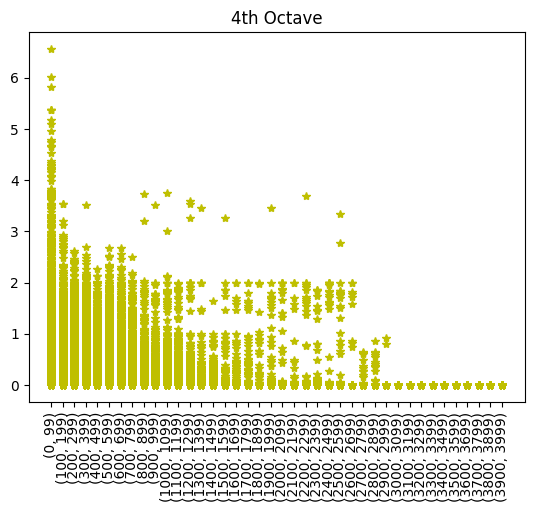

In [14]:
jj = 0
plt.figure()
for note in scale_4:
#    note = notes[5]
    note_folder = re.sub(' ','_',str(note)).lower()
    df_dumm = pd.read_csv(common_path+output_path+note_folder +'/' + note+'_freq.csv')
#    colors = ['b','g','r','k','c','m','y']
    colors = ['y']
    for kk in range(0,len(df_dumm)):
        sp_sum = dict()
        freqos = df_dumm.iloc[kk]['10_freq']
        freqos = freqos.replace('[','').replace(']','').split(', ')
        freqos = [float(freqo) for freqo in freqos]
        spos = df_dumm.iloc[kk]['10_peak']
        spos = spos.replace('[','').replace(']','').split(', ')
        spos = [float(spo) for spo in spos]
        sp_sum= hist_sum(freqos, spos, 40, sp_sum)
        if kk == 9:
            plt.plot(list(sp_sum.keys()), list(sp_sum.values()), '*'+colors[jj] , label = note)
        else:
            try:
                plt.plot(list(sp_sum.keys()), list(sp_sum.values()), '*'+colors[jj])
            except:
                jj = 0
                plt.plot(list(sp_sum.keys()), list(sp_sum.values()), '*'+colors[jj])
        
    jj += 1
ax = plt.gca()
ax.tick_params(axis='x', labelrotation = 90)
plt.title('4th Octave')
#plt.legend()
plt.show()

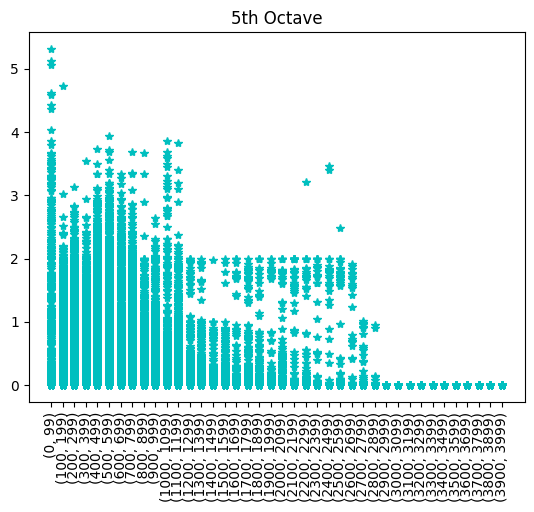

In [15]:
jj = 0
plt.figure()
for note in scale_5:
#    note = notes[5]
    note_folder = re.sub(' ','_',str(note)).lower()
    df_dumm = pd.read_csv(common_path+output_path+note_folder +'/' + note+'_freq.csv')
#    colors = ['b','g','r','k','c','m','y']
    colors = ['c']
    for kk in range(0,len(df_dumm)):
        sp_sum = dict()
        freqos = df_dumm.iloc[kk]['10_freq']
        freqos = freqos.replace('[','').replace(']','').split(', ')
        freqos = [float(freqo) for freqo in freqos]
        spos = df_dumm.iloc[kk]['10_peak']
        spos = spos.replace('[','').replace(']','').split(', ')
        spos = [float(spo) for spo in spos]
        sp_sum= hist_sum(freqos, spos, 40, sp_sum)
        if kk == 9:
            plt.plot(list(sp_sum.keys()), list(sp_sum.values()), '*'+colors[jj] , label = note)
        else:
            try:
                plt.plot(list(sp_sum.keys()), list(sp_sum.values()), '*'+colors[jj])
            except:
                jj = 0
                plt.plot(list(sp_sum.keys()), list(sp_sum.values()), '*'+colors[jj])
        
    jj += 1
ax = plt.gca()
ax.tick_params(axis='x', labelrotation = 90)
plt.title('5th Octave')
#plt.legend()
plt.show()

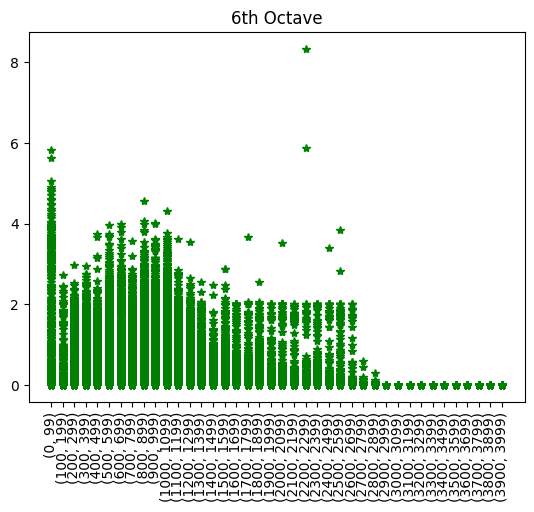

In [16]:
jj = 0
plt.figure()
for note in scale_6:
#    note = notes[5]
    note_folder = re.sub(' ','_',str(note)).lower()
    df_dumm = pd.read_csv(common_path+output_path+note_folder +'/' + note+'_freq.csv')
#    colors = ['b','g','r','k','c','m','y']
    colors = ['g']
    for kk in range(0,len(df_dumm)):
        sp_sum = dict()
        freqos = df_dumm.iloc[kk]['10_freq']
        freqos = freqos.replace('[','').replace(']','').split(', ')
        freqos = [float(freqo) for freqo in freqos]
        spos = df_dumm.iloc[kk]['10_peak']
        spos = spos.replace('[','').replace(']','').split(', ')
        spos = [float(spo) for spo in spos]
        sp_sum= hist_sum(freqos, spos, 40, sp_sum)
        if kk == 9:
            plt.plot(list(sp_sum.keys()), list(sp_sum.values()), '*'+colors[jj] , label = note)
        else:
            try:
                plt.plot(list(sp_sum.keys()), list(sp_sum.values()), '*'+colors[jj])
            except:
                jj = 0
                plt.plot(list(sp_sum.keys()), list(sp_sum.values()), '*'+colors[jj])
        
    jj += 1
ax = plt.gca()
ax.tick_params(axis='x', labelrotation = 90)
plt.title('6th Octave')
#plt.legend()
plt.show()

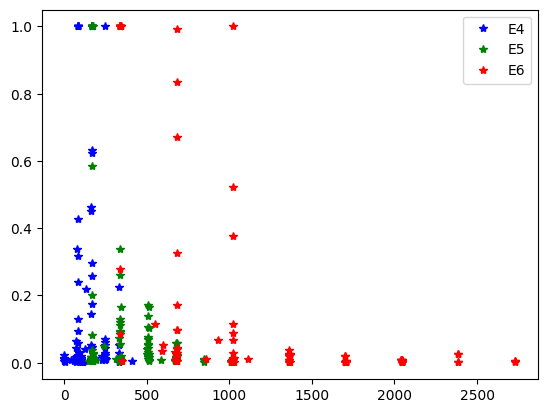

In [17]:
#for ii in range(0,len(notes_scale)):
#    note = notes_scale[ii]
jj = 0
plt.figure()
for note in notes_scale:
#    note = notes[5]
    note_folder = re.sub(' ','_',str(note)).lower()
    df_dumm = pd.read_csv(common_path+output_path+note_folder +'/' + note+'_freq.csv')
    colors = ['b','g','r','k','c','m','y']
    for kk in range(0,10):
        freqos = df_dumm.iloc[kk]['10_freq']
        freqos = freqos.replace('[','').replace(']','').split(', ')
        freqos = [float(freqo) for freqo in freqos]
        spos = df_dumm.iloc[kk]['10_peak']
        spos = spos.replace('[','').replace(']','').split(', ')
        spos = [float(spo) for spo in spos]
        if kk == 9:
            plt.plot(freqos, spos, '*'+colors[jj], label= note)
        else:
            try:
                plt.plot(freqos, spos, '*'+colors[jj])
            except:
                jj = 0
                plt.plot(freqos, spos, '*'+colors[jj])
        
    jj += 1
plt.legend()
plt.show()
    
#    plt.show()

## cepstrum

In [89]:
def main_cepstrum():
    for kk in range(0,len(notes)):
        print(kk)
        instrument_dataset = notes[kk]
        instrument_folder = re.sub(' ','_',str(instrument_dataset)).lower()+'/'
        if not os.path.exists(common_path+output_path+instrument_folder):
            os.makedirs(common_path+output_path+instrument_folder)
#        output_file = 'database_{}_cepstrum_features'.format(instrument_folder)
        df_final = pd.DataFrame()
        df_final3 = pd.DataFrame()
        for woko in df_into[df_into['Pitch'] == instrument_dataset]['Path']:
            wavo = common_path+input_path+'/TinySOL/' + woko
            titulo = woko.split('/')[-1]
            titulo = re.sub('.wav','',str(titulo))
            audio, Fs = librosa.load(wavo)
            length = audio.shape[0] / Fs
            print(f"length = {length}s")
            print(titulo)
            indexoo = 0
            df_final_2 = mel_freq_cepstrum(audio, Fs, 13, kk, instrument_dataset)
            df_final3 = pd.concat((df_final3,df_final_2), axis=0).reset_index(drop=True)
        df_final = pd.concat((df_final,df_final3), axis=0).reset_index(drop=True)
        df_final.to_csv(common_path+output_path+'/'+instrument_folder + instrument_dataset+'.csv', index=False)

In [90]:
main_cepstrum()

0
length = 2.8788662131519276s
BTb-ord-G1-pp-N-R100u
length = 1.3233106575963718s
BTb-ord-G1-ff-N-T15d
length = 6.359773242630386s
Hn-ord-G1-mf-N-T40d
length = 6.40140589569161s
Acc-ord-G1-mf-alt1-T18u
length = 5.951337868480725s
Acc-ord-G1-ff-N-T20u
length = 9.212108843537415s
Cb-ord-G1-pp-4c-T10u
length = 8.335056689342403s
Cb-ord-G1-mf-4c-R100u
length = 5.515510204081632s
Cb-ord-G1-ff-4c-T12u
1
length = 3.3387755102040817s
BTb-ord-G#1-pp-N-T16u
length = 2.823718820861678s
BTb-ord-G#1-mf-N-T18u
length = 1.4616326530612245s
BTb-ord-G#1-ff-N-T12u
length = 7.380725623582767s
Acc-ord-G#1-ff-N-T16u
2
length = 3.0821315192743763s
BTb-ord-A1-pp-N-T23d
length = 3.5529251700680273s
BTb-ord-A1-mf-N-T33u
length = 1.3160544217687076s
BTb-ord-A1-ff-N-T19d
length = 6.765578231292517s
Acc-ord-A1-ff-N-T22u
3
length = 2.7143764172335603s
BTb-ord-C2-pp-N-T13d
length = 2.948888888888889s
BTb-ord-C2-mf-N-T23u
length = 5.967755102040816s
Tbn-ord-C2-pp-N-T23d
length = 5.036598639455782s
Tbn-ord-C2-mf-N-T4

length = 5.709433106575964s
Tbn-ord-B1-mf-N-T14d
length = 3.1444897959183673s
Tbn-ord-B1-ff-N-T27d
length = 6.320770975056689s
Acc-ord-B1-ff-N-T11u
length = 7.092925170068027s
Cb-ord-B1-mf-3c-R100u
length = 5.703219954648526s
Bn-ord-B1-pp-N-T11d
18
length = 3.2879818594104306s
BTb-ord-G2-mf-N-T15u
length = 5.805079365079365s
Hn-ord-G2-ff-N-R100u
length = 6.166031746031746s
Cb-ord-G2-pp-4c-T13u
length = 6.894013605442177s
Cb-ord-G2-mf-2c-T11d
length = 5.517551020408163s
Cb-ord-G2-mf-4c-T10u_R100u
length = 5.652925170068027s
Bn-ord-G2-mf-N-T10d
19
length = 3.87750566893424s
BTb-ord-A#2-mf-N-T29u
length = 1.5363718820861678s
BTb-ord-A#2-ff-N-T19u
length = 5.835056689342403s
Hn-ord-A#2-pp-N-R100d
length = 7.548480725623583s
Vc-ord-A#2-mf-3c-T13u
length = 5.590929705215419s
Cb-ord-A#2-mf-2c-T13u
length = 4.787482993197279s
Cb-ord-A#2-ff-2c-T14u
length = 3.6941043083900227s
Cb-ord-A#2-ff-3c-T13u
length = 4.154875283446712s
Cb-ord-A#2-ff-4c-T21u
length = 5.452925170068027s
Bn-ord-A#2-mf-N-T11

33
length = 6.1347845804988665s
Hn-ord-D#5-ff-N-T10u
length = 5.3473922902494335s
Acc-ord-D#5-mf-alt3-T10d
length = 8.355510204081632s
Vc-ord-D#5-pp-1c-T10d
length = 6.783990929705215s
Va-ord-D#5-mf-1c-T11u
length = 7.111655328798186s
Va-ord-D#5-mf-3c-T11u
length = 7.319637188208617s
Va-ord-D#5-ff-1c-T12u
length = 5.859818594104309s
Bn-ord-D#5-ff-N-T14d
length = 6.785532879818594s
ClBb-ord-D#5-ff-N-T11u
length = 6.395963718820862s
Fl-ord-D#5-pp-N-T10u
34
length = 5.246167800453515s
Tbn-ord-A3-pp-N-T14u
length = 6.3986848072562355s
TpC-ord-A3-pp-N-T10d
length = 6.314467120181406s
TpC-ord-A3-ff-N-T23u
length = 10.160090702947846s
Vc-ord-A3-mf-3c-T16d
length = 9.308344671201814s
Vc-ord-A3-ff-3c-T21d
length = 7.370022675736961s
Va-ord-A3-pp-4c-T14u
length = 8.068979591836735s
Va-ord-A3-mf-3c-R100d
length = 7.210748299319728s
Va-ord-A3-mf-4c-T10u
length = 7.708072562358277s
Va-ord-A3-ff-4c-T16u
length = 8.643809523809523s
ASax-ord-A3-mf-N-R100d
length = 5.580680272108843s
Bn-ord-A3-pp-N-T11

length = 6.483401360544217s
Acc-ord-C#6-mf-alt2-T10d
length = 6.753333333333333s
Va-ord-C#6-pp-2c-T11u
length = 7.253333333333333s
Va-ord-C#6-ff-1c-T10u
length = 6.53233560090703s
Fl-ord-C#6-pp-N-T12d
length = 6.792517006802721s
Fl-ord-C#6-mf-N-T15d
length = 7.78140589569161s
Fl-ord-C#6-ff-N-T30d
length = 6.9221768707483s
Ob-ord-C#6-pp-N-T10u
52
length = 6.752743764172336s
Acc-ord-G#7-pp-N-T11d
length = 5.1873015873015875s
Acc-ord-G#7-pp-alt1-T10d
length = 5.758412698412698s
Acc-ord-G#7-mf-N-T10d
length = 7.817369614512471s
Acc-ord-G#7-ff-N-T13d
53
length = 5.237097505668935s
Acc-ord-B7-pp-N-T13d
length = 9.214557823129251s
Acc-ord-B7-pp-alt1-T13d
length = 4.215374149659864s
Acc-ord-B7-mf-N-T13d
length = 8.218185941043084s
Acc-ord-B7-ff-N-T13d
54
length = 6.941814058956916s
Acc-ord-E1-mf-N-T17u
length = 7.208526077097505s
Acc-ord-E1-mf-alt1-T13u
length = 7.490702947845805s
Acc-ord-E1-ff-N-T20u
55
length = 6.200680272108843s
Acc-ord-F1-mf-N-T19u
length = 6.932290249433106s
Acc-ord-F1-mf

In [93]:
brass_cols = ['spec_cent', 'spec_bw',
       'rolloff', 'zcr', 'mfccs_0', 'mfccs_1', 'mfccs_2', 'mfccs_3', 'mfccs_4',
       'mfccs_5', 'mfccs_6', 'mfccs_7', 'mfccs_8', 'mfccs_9', 'mfccs_10',
       'mfccs_11', 'mfccs_12']

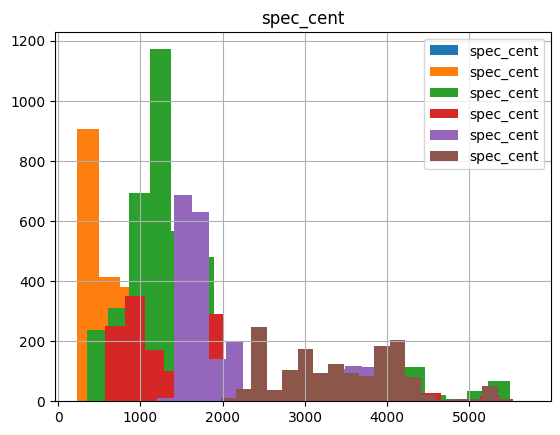

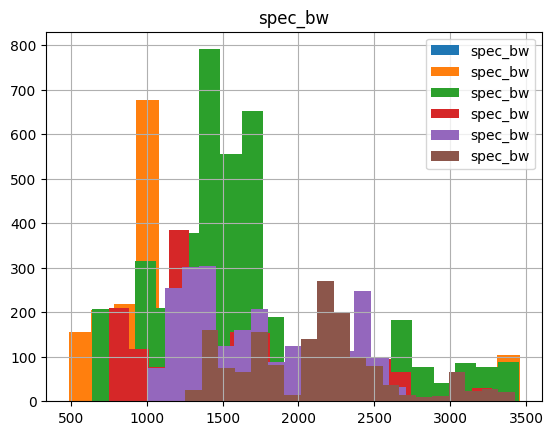

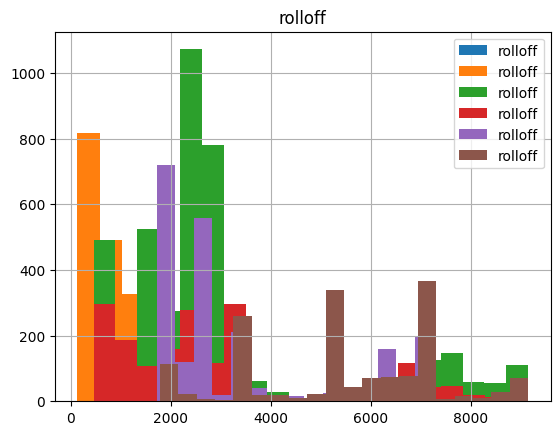

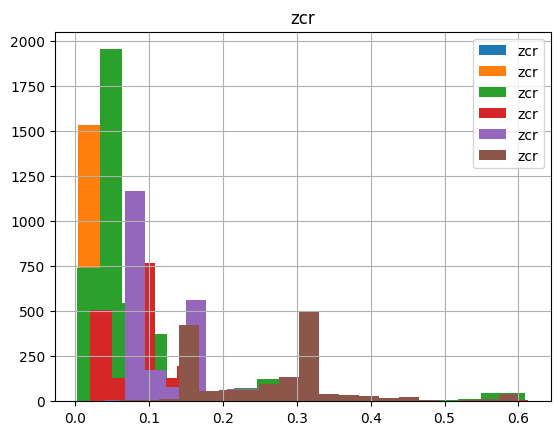

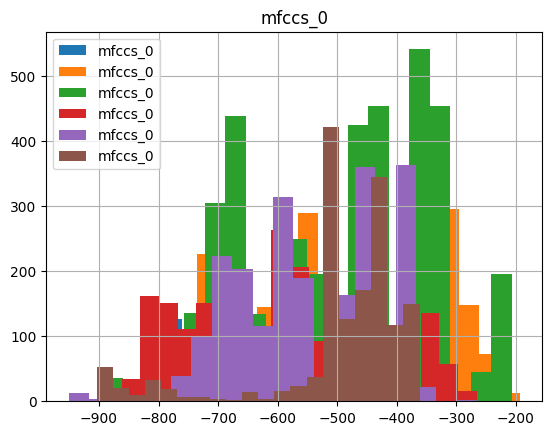

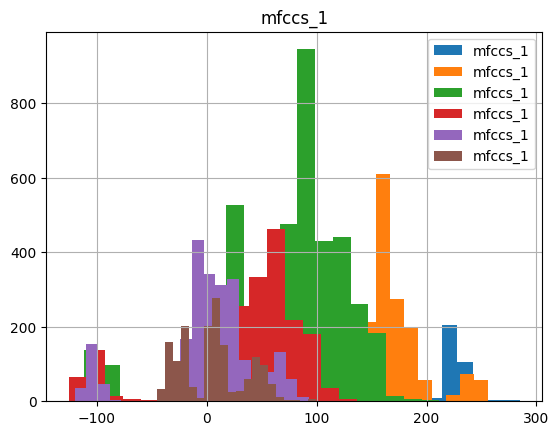

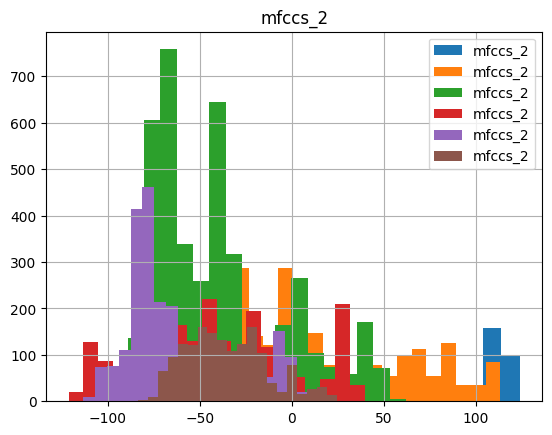

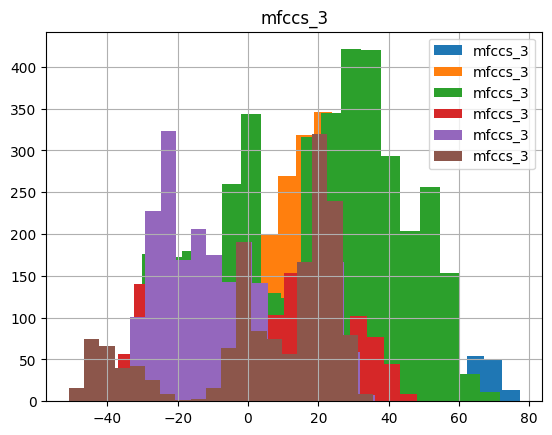

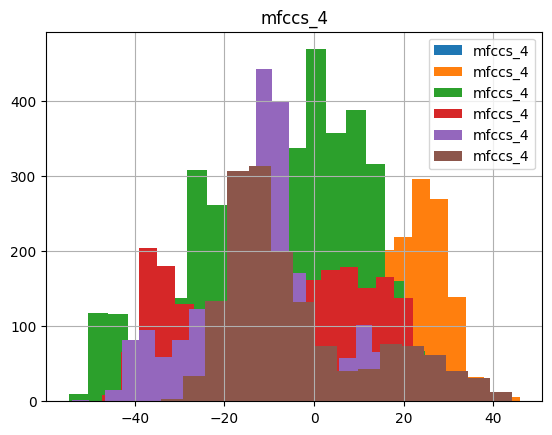

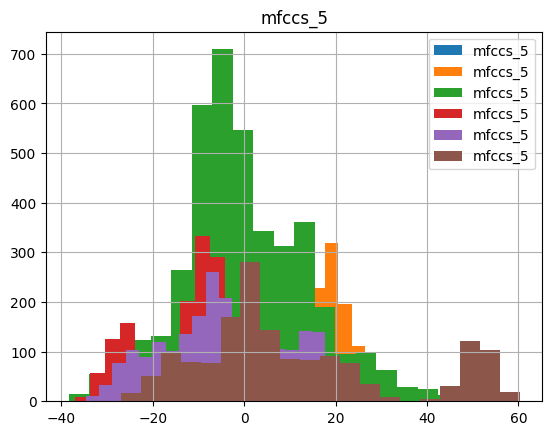

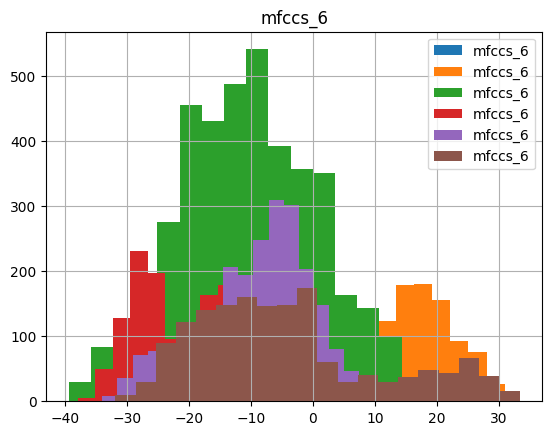

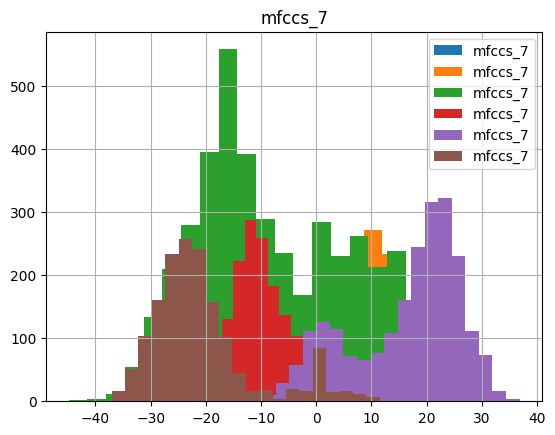

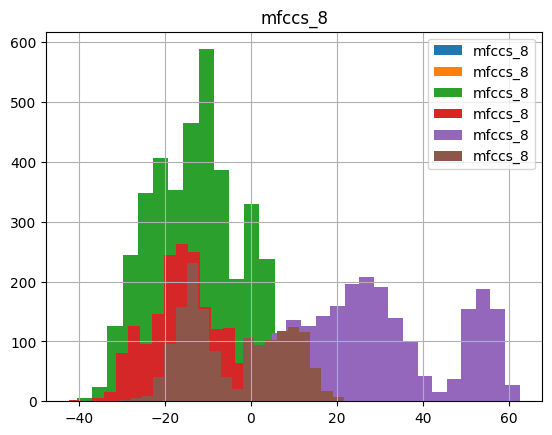

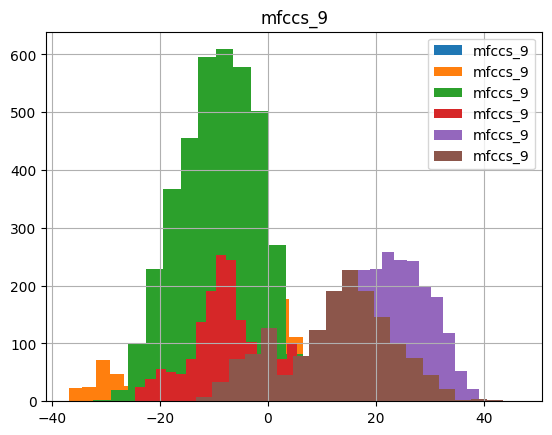

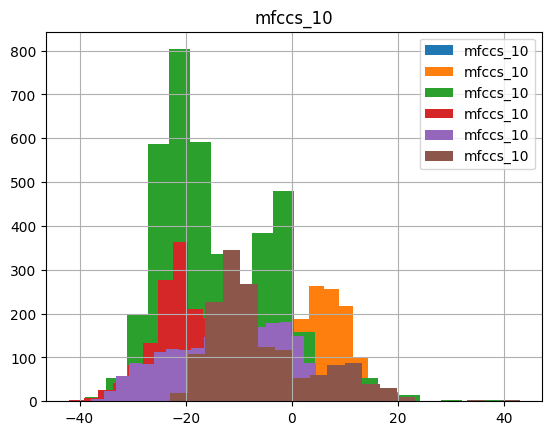

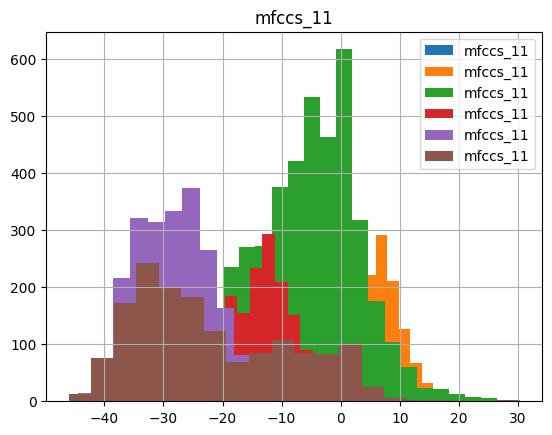

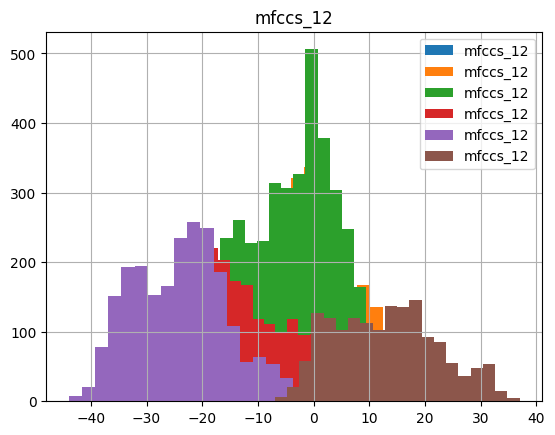

In [98]:
#brass_cols = list(df_instrument.columns)[3:-4]
for col in brass_cols:
    for note in notes_scale:
        note_folder = re.sub(' ','_',str(note)).lower()
        df_dumm = pd.read_csv(common_path+output_path+note_folder +'/' + note+'.csv')
#        df_dumm = df_dumm[df_dumm['note_played'] == note]
        df_dumm[col].hist(bins=20, legend =True)
    plt.title(col)
    plt.show()

In [2]:
tinysol = ['Bass Tuba', 'French Horn', 'Trombone', 'Trumpet in C', 'Accordion', 'Cello', 
           'Contrabass', 'Viola', 'Violin', 'Alto Saxophone', 'Bassoon', 'Clarinet in Bb',
           'Flute', 'Oboe']

In [3]:
instruments = ['Bass Tuba','French Horn','Trombone','Trumpet in C','Accordion','Cello','Contrabass','Viola','Violin','Alto Saxophone','Bassoon','Clarinet in Bb','Flute','Oboe','Guitar','Electric guitar','Acoustic guitar','Bass guitar','Tapping','Steelpan','Percussion', 'Drum and bass', 'Wind instrument', 'Bowed string instrument', 'Keyboard', 'Single Voice Singing', 'Group Singing', 'Noise']

In [5]:
set(instruments) - set(tinysol)

{'Acoustic guitar',
 'Bass guitar',
 'Bowed string instrument',
 'Drum and bass',
 'Electric guitar',
 'Group Singing',
 'Guitar',
 'Keyboard',
 'Noise',
 'Percussion',
 'Single Voice Singing',
 'Steelpan',
 'Tapping',
 'Wind instrument'}

In [4]:
instruments_reduced = {'woodwind': ['Clarinet in Bb','Flute','Oboe', 'Bassoon', 'Alto Saxophone', 'Wind Instrument'],
                       'brass':['Bass Tuba','French Horn','Trombone', 'Trumpet in C'],
                       'bowed_string_instruments': ['Cello','Viola','Violin', 'Bowed string instrument'],
                       'plucked_string_instruments':['Guitar','Electric guitar','Acoustic guitar', 'Tapping', 'Bass guitar','Contrabass'],
                       'keyboard': ['Keyboard','Accordion'],
                       'percussion': ['Steelpan','Percussion', 'Drum and bass'],
                       'singing': ['Single Voice Singing', 'Group Singing'],
                       'noise': ['Noise']}

In [39]:
brass = pd.read_csv('/home/jacs/Documents/DataScience/Personal/data/keyboard.csv')

In [41]:
instruments = list(dict(brass.groupby(['instrument']).count()['instrument_name']).keys())

In [42]:
brass.groupby(['instrument']).count()['instrument_name']

instrument
4      508888
24    2157417
Name: instrument_name, dtype: int64

In [7]:
sol_path = '/home/jacs/Documents/DataScience/Personal/song_similarity_audio/'

In [9]:
trumpet_sol = pd.read_csv('/home/jacs/Documents/DataScience/Personal/song_similarity_audio/trumpet_in_c/database_trumpet_in_c_cepstrum_features.csv')
trumpet_youtube = pd.read_csv('/home/jacs/Documents/DataScience/Personal/data/instruments/original/trumpet_in_c.csv')

In [30]:
def best_examples(df_stats, df_bowed):
    df_bowed_final = pd.DataFrame()
#    cols = list(df_bowed.columns[1:-4])
    cols = ['mfccs_0','mfccs_1', 'mfccs_2', 'mfccs_3', 'mfccs_4', 'mfccs_5', 'mfccs_6','mfccs_7', 'mfccs_8', 'mfccs_9', 'mfccs_10', 'mfccs_11', 'mfccs_12']
    for i in range(0,len(cols)):
        col = cols[i]
        stats = df_stats[col].describe()[['mean', 'std']].values
        if i == 0 :
            df_bowed_final = df_bowed[df_bowed[col].apply(lambda x: stats[0]-(3*stats[1]) <= x <= stats[0]+(3*stats[1]))]
            continue
        else:
            df_iter = df_bowed[df_bowed[col].apply(lambda x: stats[0]-(3*stats[1]) <= x <= stats[0]+(3*stats[1]))]
            df_bowed_final = pd.merge(df_bowed_final, df_iter, left_index=True, right_index=True)[['index_x', 'rms_x', 'spec_cent_x', 'spec_bw_x', 'rolloff_x', 'zcr_x',
                                                                                        'mfccs_0_x', 'mfccs_1_x', 'mfccs_2_x', 'mfccs_3_x', 'mfccs_4_x',
                                                                                        'mfccs_5_x', 'mfccs_6_x', 'mfccs_7_x', 'mfccs_8_x', 'mfccs_9_x',
                                                                                        'mfccs_10_x', 'mfccs_11_x', 'mfccs_12_x', 'instrument_x',
                                                                                        'note_played_x', 'instrument_name_x']]
            df_iter = pd.DataFrame()
    df_bowed_final = df_bowed_final.drop_duplicates()
    df_bowed_final.columns = ['index', 'rms', 'spec_cent', 'spec_bw', 'rolloff', 'zcr', 'mfccs_0',
       'mfccs_1', 'mfccs_2', 'mfccs_3', 'mfccs_4', 'mfccs_5', 'mfccs_6',
       'mfccs_7', 'mfccs_8', 'mfccs_9', 'mfccs_10', 'mfccs_11', 'mfccs_12',
       'instrument', 'note_played', 'instrument_name']
    df_bowed_final = df_bowed_final.reset_index(drop=True)
    return df_bowed_final

In [11]:
trumpet_sol.rename(columns={"rms": "rmeso"}, inplace=True)

In [25]:
df_blop = df_blop[['index', 'rms', 'spec_cent', 'spec_bw', 'rolloff', 'zcr',
       'mfccs_0', 'mfccs_1', 'mfccs_2', 'mfccs_3', 'mfccs_4', 'mfccs_5',
       'mfccs_6', 'mfccs_7', 'mfccs_8', 'mfccs_9', 'mfccs_10', 'mfccs_11',
       'mfccs_12', 'instrument', 'note_played', 'instrument_name']]

df_blop

,index,rms,spec_cent,spec_bw,rolloff,zcr,mfccs_0,mfccs_1,mfccs_2,mfccs_3,...,mfccs_6,mfccs_7,mfccs_8,mfccs_9,mfccs_10,mfccs_11,mfccs_12,instrument,note_played,instrument_name
0,0,0.095588,2280.628993,2330.551747,3972.875977,0.068359,-94.09004,98.144680,-27.844193,13.797825,...,-13.951532,-0.300353,3.117880,-3.803352,-7.409647,-5.312292,-8.733051,1,LAC_One_Faith_One_Hope_One_Lord_July_26_09,french_horn
1,1,0.109927,1805.400716,1837.147522,2659.350586,0.095215,-102.74020,125.933624,-38.674600,22.530045,...,-8.751230,-1.909981,-2.848365,-1.171824,-7.570692,-5.133161,-3.542285,1,LAC_One_Faith_One_Hope_One_Lord_July_26_09,french_horn
2,2,0.126121,1451.685109,1294.573269,2368.652344,0.114746,-133.01315,162.483000,-60.116783,35.450474,...,-10.518018,-0.120462,-9.201941,11.951706,-11.754770,-4.179883,-3.798096,1,LAC_One_Faith_One_Hope_One_Lord_July_26_09,french_horn
3,3,0.121579,1301.541284,1283.926483,2228.686523,0.103027,-142.38280,169.067460,-50.352120,29.223404,...,-11.996588,-3.325627,-14.352453,10.552578,-5.471054,-1.212259,-3.687645,1,LAC_One_Faith_One_Hope_One_Lord_July_26_09,french_horn
4,4,0.115666,1271.133701,1205.622794,2045.654297,0.095703,-139.39758,176.242630,-54.734634,17.786297,...,-12.005996,-0.900121,-12.775055,9.150068,-2.135362,1.136873,-3.081768,1,LAC_One_Faith_One_Hope_One_Lord_July_26_09,french_horn
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
224312,426,0.091628,480.157857,462.823334,699.829102,0.035645,-396.53217,202.416730,49.758310,-15.720409,...,-21.646260,-13.771475,-2.479147,-7.534841,-17.361110,-12.114419,-3.018016,1,涙そうそうトロンボーンとホルンの２重奏,french_horn
224313,427,0.089518,487.747664,477.845324,721.362305,0.033691,-391.83487,203.681210,44.939300,-19.163733,...,-19.675941,-16.060217,-2.591537,-4.776423,-15.719047,-14.079718,-6.309117,1,涙そうそうトロンボーンとホルンの２重奏,french_horn
224314,428,0.083000,501.233507,513.266222,742.895508,0.032227,-390.78146,203.219310,44.437630,-21.431356,...,-18.222637,-16.787262,-0.946304,-4.527922,-14.666221,-11.973747,-8.212722,1,涙そうそうトロンボーンとホルンの２重奏,french_horn
224315,429,0.071313,549.096720,681.420739,796.728516,0.030762,-384.98718,204.666410,41.292940,-26.097204,...,-19.157757,-21.089773,-6.839279,-10.329300,-14.746799,-9.841954,-9.425427,1,涙そうそうトロンボーンとホルンの２重奏,french_horn


In [26]:
route1 = '/home/jacs/Documents/DataScience/Personal/data/instruments/original/'
for blop in instruments:
    instrument_name = re.sub(' ','_',str(blop)).lower()
    df_blop = pd.read_csv(route1+'{}.csv'.format(instrument_name))
    df_blop.rename(columns={"indstrument_name": "instrument_name"}, inplace=True)
    dF_blop = df_blop[['index', 'rms', 'spec_cent', 'spec_bw', 'rolloff', 'zcr',
       'mfccs_0', 'mfccs_1', 'mfccs_2', 'mfccs_3', 'mfccs_4', 'mfccs_5',
       'mfccs_6', 'mfccs_7', 'mfccs_8', 'mfccs_9', 'mfccs_10', 'mfccs_11',
       'mfccs_12', 'instrument', 'note_played', 'instrument_name']]
    df_blop.to_csv(route1 +'{}.csv'.format(instrument_name), index=False)
    print(instrument_name)

bass_tuba
french_horn
trombone
trumpet_in_c
accordion
cello
contrabass
viola
violin
alto_saxophone
bassoon
clarinet_in_bb
flute
oboe
guitar
electric_guitar
acoustic_guitar
bass_guitar
tapping
steelpan
percussion
drum_and_bass
wind_instrument
bowed_string_instrument
keyboard
single_voice_singing
group_singing
noise


In [32]:
for sol in tinysol:
    sol_lower = re.sub(' ','_',str(sol)).lower()
    print(sol_lower)
    df_sol = pd.read_csv(sol_path + sol_lower+'/'+'database_{}_cepstrum_features.csv'.format(sol_lower))
    df_non_sol = pd.read_csv('/home/jacs/Documents/DataScience/Personal/data/instruments/original/{}.csv'.format(sol_lower))
    print(df_non_sol.shape)
    df_final=best_examples(df_sol, df_non_sol)
    df_final.to_csv('/home/jacs/Documents/DataScience/Personal/data/instruments/{}.csv'.format(sol_lower))
    print(df_final.shape)

bass_tuba
(6673, 24)
(6445, 22)
french_horn
(104150, 24)
(79185, 22)
trombone
(52149, 24)
(32081, 22)
trumpet_in_c
(595539, 23)
(233839, 22)
accordion
(753684, 23)
(508888, 22)
cello
(961606, 23)
(406580, 22)
contrabass
(389453, 23)
(149757, 22)
viola
(27072, 23)
(26658, 22)
violin
(2509149, 23)
(449242, 22)
alto_saxophone
(571409, 23)
(61823, 22)
bassoon
(8569, 23)
(8268, 22)
clarinet_in_bb
(411017, 23)
(241558, 22)
flute
(1108040, 23)
(201714, 22)
oboe
(9151, 23)
(8789, 22)


In [43]:
cols = ['mfccs_0',
       'mfccs_1', 'mfccs_2', 'mfccs_3', 'mfccs_4', 'mfccs_5', 'mfccs_6',
       'mfccs_7', 'mfccs_8', 'mfccs_9', 'mfccs_10', 'mfccs_11', 'mfccs_12']

for i in range(0,len(cols)):
    col = cols[i]
    stats = trumpet_sol[col].describe()[['mean', 'std']].values
    print(stats)
    if i == 0 :
        df_bowed_final = trumpet_youtube[trumpet_youtube[col].apply(lambda x: stats[0]-(2*stats[1]) <= x <= stats[0]+(2*stats[1]))]
        continue
    else:
        df_iter = trumpet_youtube[trumpet_youtube[col].apply(lambda x: stats[0]-(2*stats[1]) <= x <= stats[0]+(2*stats[1]))]
        df_bowed_final = pd.merge(df_bowed_final, df_iter, left_index=True, right_index=True)[['index_x', 'rms_x', 'spec_cent_x', 'spec_bw_x', 'rolloff_x', 'zcr_x',
                                                                                    'mfccs_0_x', 'mfccs_1_x', 'mfccs_2_x', 'mfccs_3_x', 'mfccs_4_x',
                                                                                    'mfccs_5_x', 'mfccs_6_x', 'mfccs_7_x', 'mfccs_8_x', 'mfccs_9_x',
                                                                                    'mfccs_10_x', 'mfccs_11_x', 'mfccs_12_x', 'instrument_x',
                                                                                    'note_played_x']]
        df_iter = pd.DataFrame()
df_bowed_final = df_bowed_final.drop_duplicates()
#df_bowed_final.columns = ['index', 'rms', 'spec_cent', 'spec_bw', 'rolloff', 'zcr', 'mfccs_0',
#   'mfccs_1', 'mfccs_2', 'mfccs_3', 'mfccs_4', 'mfccs_5', 'mfccs_6',
#   'mfccs_7', 'mfccs_8', 'mfccs_9', 'mfccs_10', 'mfccs_11', 'mfccs_12',
#   'instrument', 'note_played', 'instrument_name']
df_bowed_final = df_bowed_final.reset_index(drop=True)

[-543.65417004  165.05207269]
[ 3.87051558 66.00441641]
[-79.69119866  27.10541189]
[-14.68940536  13.82081806]
[-30.92931603  13.33380448]
[-4.07228009  6.50786584]
[-17.39283832  12.21363276]
[-5.01914971 16.11623395]
[-5.12774267 16.86346175]
[-1.04662835 16.91469596]
[-7.08354354 18.83143867]
[ 0.83333813 16.65010948]
[-8.7406259  17.61399766]


In [44]:
df_bowed_final

,index_x,rms_x,spec_cent_x,spec_bw_x,rolloff_x,zcr_x,mfccs_0_x,mfccs_1_x,mfccs_2_x,mfccs_3_x,...,mfccs_5_x,mfccs_6_x,mfccs_7_x,mfccs_8_x,mfccs_9_x,mfccs_10_x,mfccs_11_x,mfccs_12_x,instrument_x,note_played_x
0,34,0.018788,1991.073945,2073.200317,3951.342773,0.084473,-257.25958,109.676000,-29.089940,7.030249,...,1.535214,-25.880272,4.971275,-3.113334,1.158227,-9.689935,-11.171938,-4.276636,3,Trumpet_Nerds
1,35,0.026899,2048.829259,2080.779772,4338.940430,0.084473,-247.79716,109.257900,-30.259785,9.755367,...,3.749430,-23.423020,7.565862,-8.182447,1.877331,-9.876662,-20.162552,-3.162625,3,Trumpet_Nerds
2,36,0.071608,1716.816682,1846.600446,3025.415039,0.076660,-219.90921,121.600540,-36.428734,7.869358,...,-3.374462,-29.991116,4.582133,-1.301678,-0.672559,-17.926487,-21.399784,-15.225413,3,Trumpet_Nerds
3,40,0.065519,1443.312172,1816.658055,2691.650391,0.063477,-220.95706,129.033600,-27.135942,12.850897,...,2.516895,-27.530567,4.427068,-13.517498,-8.451872,-24.293148,-19.071556,-18.334896,3,Trumpet_Nerds
4,51,0.041024,1709.581325,1855.233108,3283.813477,0.068848,-222.33102,117.681274,-43.170624,3.979846,...,-4.166517,-6.538762,7.551125,-10.046950,-4.726045,-25.646503,-16.179066,-7.869777,3,Trumpet_Nerds
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24525,421,0.050331,1528.264877,1156.022858,2465.551758,0.092285,-395.05008,82.741880,-64.867240,-24.620522,...,5.426882,3.469699,6.320641,-23.186632,-32.638870,-35.841003,-29.010534,-22.659393,3,Trumpet_My_Kind_of_Night_Luke_Bryan_Sheet_Musi...
24526,424,0.051795,1550.087542,1180.185985,2465.551758,0.089355,-407.21097,71.570880,-55.570244,-12.172789,...,8.696243,-4.109870,-6.805652,-17.238537,-26.172709,-33.402634,-30.420311,-22.957523,3,Trumpet_My_Kind_of_Night_Luke_Bryan_Sheet_Musi...
24527,425,0.052210,1550.189781,1185.328539,2465.551758,0.089844,-399.72420,78.230960,-53.959297,-14.392092,...,-8.478271,-13.990112,-14.977723,-26.543865,-18.006721,-22.137115,-24.747053,-17.047478,3,Trumpet_My_Kind_of_Night_Luke_Bryan_Sheet_Musi...
24528,426,0.052856,1570.145954,1203.558216,2465.551758,0.088379,-373.40607,80.136780,-64.436554,-10.579174,...,-15.390429,-21.559431,-13.281731,-18.408428,-11.337223,-18.016560,-19.222810,-10.228198,3,Trumpet_My_Kind_of_Night_Luke_Bryan_Sheet_Musi...


In [45]:
trumpet_youtube.shape

(856186, 22)

In [5]:
instruments_reduced['woodwind']

['Clarinet in Bb',
 'Flute',
 'Oboe',
 'Bassoon',
 'Alto Saxophone',
 'Wind Instrument']

In [6]:
final_data_path = common_path + dummy_path + 'data/new/' #instrument_folder

In [8]:
input_path = '/home/jacs/Documents/DataScience/Personal/data/instruments/original/'
output_path = '/home/jacs/Documents/DataScience/Personal/data/instruments/new/'

In [ ]:
blop = pd.read_csv('/home/jacs/Documents/DataScience/Personal/data/instruments/cello.csv')

In [ ]:
best_examples(blop)

In [9]:
for pp in range(0,len(instruments)):
    instrument = instruments[pp]
    instrument_folder = re.sub(' ','_',str(instrument)).lower()#+'/'
    print(instrument_folder)
    df_iteration = pd.read_csv(input_path + instrument_folder+'.csv')
    df_iteration = best_examples(df_iteration)
    df_iteration.to_csv(output_path+'{}.csv'.format(instrument_folder))

bass_tuba
french_horn
trombone
trumpet_in_c
accordion
cello
contrabass
viola
violin
alto_saxophone
bassoon
clarinet_in_bb
flute
oboe
guitar
electric_guitar
acoustic_guitar
bass_guitar
tapping
steelpan
percussion
drum_and_bass
wind_instrument
bowed_string_instrument
keyboard
single_voice_singing
group_singing
noise


In [ ]:
for pp in range(0,len(instruments)):
    if not os.path.exists(final_data_path):
        os.makedirs(final_data_path)
    df_final2 = pd.DataFrame([])
    instrument = instruments[pp]
#        print(instrument)
    instrument_folder = re.sub(' ','_',str(instrument)).lower()#+'/'
    input_data_path = common_path + input_path+ instrument_folder
#    print(os.listdir(path))
    for file in os.listdir(input_data_path):
        if file == '{}_youtube_database_enrichment.csv'.format(instrument_folder):
            continue
        else:
            print(file)
            df_iteration = pd.read_csv(input_data_path+'/'+file)
            df_final2 = pd.concat((df_final2,df_iteration), axis=0).reset_index(drop=True)
    df_final2.to_csv(final_data_path+'{}.csv'.format(instrument_folder))
#    links_audio = list(df_links['youtube_links'])
#        print(instrument,len(links_audio))
#    titles = list(df_links['title'])


In [ ]:
blop = pd.read_csv('/home/jacs/Documents/DataScience/Personal/data/instruments/accordion.csv')

In [ ]:
stats = blop['mfccs_1'].describe()[['mean', 'std']].values
mffc1 = blop[blop['mfccs_1'].apply(lambda x: stats[0]-stats[1] <= x <= stats[0]+stats[1])]

stats = blop['mfccs_2'].describe()[['mean', 'std']].values
mfcc2 = blop[blop['mfccs_2'].apply(lambda x: stats[0]-stats[1] <= x <= stats[0]+stats[1])]

stats = blop['mfccs_3'].describe()[['mean', 'std']].values
mfcc3 = blop[blop['mfccs_3'].apply(lambda x: stats[0]-stats[1] <= x <= stats[0]+stats[1])]

df_bowed_final = pd.merge(mffc1, mfcc2, left_index=True, right_index=True)[['index_x', 'rms_x', 'spec_cent_x', 'spec_bw_x', 'rolloff_x', 'zcr_x',
       'mfccs_0_x', 'mfccs_1_x', 'mfccs_2_x', 'mfccs_3_x', 'mfccs_4_x',
       'mfccs_5_x', 'mfccs_6_x', 'mfccs_7_x', 'mfccs_8_x', 'mfccs_9_x',
       'mfccs_10_x', 'mfccs_11_x', 'mfccs_12_x', 'instrument_x',
       'note_played_x', 'instrument_name_x']]

df_bowed_final = pd.merge(df_bowed_final, mfcc3, left_index=True, right_index=True)[['index_x', 'rms_x', 'spec_cent_x', 'spec_bw_x', 'rolloff_x', 'zcr_x',
       'mfccs_0_x', 'mfccs_1_x', 'mfccs_2_x', 'mfccs_3_x', 'mfccs_4_x',
       'mfccs_5_x', 'mfccs_6_x', 'mfccs_7_x', 'mfccs_8_x', 'mfccs_9_x',
       'mfccs_10_x', 'mfccs_11_x', 'mfccs_12_x', 'instrument_x',
       'note_played_x', 'instrument_name_x']]

print(mffc1.shape, mfcc2.shape, mfcc3.shape, df_bowed_final.shape)

In [ ]:
setto = set(mffc1.index) & set(mfcc2.index)

In [ ]:
pd.merge(mffc1, mfcc2, left_index=True, right_index=True)[['index_x', 'rms_x', 'spec_cent_x', 'spec_bw_x', 'rolloff_x', 'zcr_x',
       'mfccs_0_x', 'mfccs_1_x', 'mfccs_2_x', 'mfccs_3_x', 'mfccs_4_x',
       'mfccs_5_x', 'mfccs_6_x', 'mfccs_7_x', 'mfccs_8_x', 'mfccs_9_x',
       'mfccs_10_x', 'mfccs_11_x', 'mfccs_12_x', 'instrument_x',
       'note_played_x', 'instrument_name_x']]

In [ ]:
blop.columns

In [ ]:
blop.shape

In [ ]:
best_examples(blop)

In [ ]:
df_final3=df_final2

In [ ]:
blopo

In [ ]:
blopo = df_final.columns
splopo = np.zeros((len(blopo),len(blopo)))
for i in range(0,len(blopo)):
    for j in range(0,len(blopo)):
        corr, _ = spearmanr(df_final2[blopo[i]], df_final2[blopo[j]])
        splopo[i,j] = corr
#print('Spearmans correlation: %.3f' % corr)

splopo

In [ ]:
for i in range(0,len(blopo)):
    print(blopo[i],df_final2[blopo[i]].describe())

In [ ]:
for i in range(0,len(blopo)):
    print(blopo[i],df_final2[blopo[i]].describe(),df_final3[blopo[i]].describe())

In [ ]:
linko1 = '/home/jacs/Documents/DataScience/Personal/song_similarity_audio/trumpet_in_c/database_trumpet_in_c_cepstrum_features.csv'
linko2 = '/home/jacs/Documents/DataScience/Personal/song_similarity_audio/alto_saxophone/database_alto_saxophone_cepstrum_features.csv'

In [ ]:
df_final2['mfccs_0'].describe()

In [ ]:
plt.plot(df_final3['rms'],df_final3['mfccs_0'], '.b')
plt.plot(df_final2['rms'],df_final2['mfccs_0'], '+r')

In [ ]:
df_tru = pd.read_csv(linko1)
df_sax = pd.read_csv(linko2)

In [ ]:
df_tru_new = pd.DataFrame([])
df_sax_new = pd.DataFrame([])
for tuu in df_tru.columns:
    df_tru_new[tuu] = df_tru[tuu].describe()
    df_sax_new[tuu] = df_sax[tuu].describe()

In [ ]:
df_tru_new

In [ ]:
df_sax_new

In [ ]:
plt.plot(df_acc['rms'],df_acc['mfccs_0'], '.b')
plt.plot(df_sax['rms'],df_sax['mfccs_0'], '+r')

In [ ]:
path = '/home/jacs/Documents/DataScience/Personal/song_similarity_audio/'
instrument = 'cello'
os.listdir(path)

In [ ]:
# for data transformation
import numpy as np
# for visualizing the data
import matplotlib.pyplot as plt
# for opening the media file
import scipy.io.wavfile as wavfile

import re
import librosa
import scipy
# for dataframe manipulation
import pandas as pd

In [ ]:
wavo = '/home/jacs/Documents/DataScience/Personal/song_similarity_audio/TinySOL/Brass/Trumpet_C/ordinario/TpC-ord-D4-ff-N-T27u.wav'

In [ ]:
Fs, audio = wavfile.read(wavo)

In [ ]:
#mfccs = librosa.feature.mfcc(y=audio, sr=Fs)
#print(mfccs.shape)

In [ ]:
x, fs = librosa.load(wavo)
#librosa.display.waveplot(x, sr=fs)

In [ ]:
xx= x#[:5*fs]

In [ ]:
mfccs = librosa.feature.mfcc(y=xx, sr=fs)#, norm='ortho')#, n_fft=26)
print(mfccs.shape)

In [ ]:
spec_cent = librosa.feature.spectral_centroid(y=xx, sr=fs)
spec_bw = librosa.feature.spectral_bandwidth(y=xx, sr=fs)
rolloff = librosa.feature.spectral_rolloff(y=xx, sr=fs)
zcr = librosa.feature.zero_crossing_rate(xx)

In [ ]:
df = pd.DataFrame()
df['zcr']= zcr[0,:]
for i in range(0,mfccs.shape[0]):
    df['mfccs_{}'.format(i)] = mfccs[i,:]

In [ ]:
df2 = pd.DataFrame()

In [ ]:
pd.concat((df,df2), axis=0)

In [ ]:
np.mean(mfccs[:,0])

In [ ]:
plt.plot(np.log(xx))

In [ ]:
meano = []

for i in range(0,mfccs.shape[1]):
    meano.append(np.mean(mfccs[:,i]))

In [ ]:
plt.plot(meano)
#    plt.show()
#    plt.xlim(0,50)
#    plt.ylim(-350,-300)

In [ ]:
sp = scipy.fft.fft(xx)
freq = scipy.fft.fftfreq(len(xx),fs)

In [ ]:
plt.plot(freq,sp)
plt.xlim(0,0.00002)

In [ ]:
plop = len(xx)
plop2= mfccs.shape[1]

print((plop/plop2)/fs)

In [ ]:
mfccs[:10,:].shape

In [ ]:
librosa.display.specshow(mfccs, sr=fs, x_axis='time')

In [ ]:
mfccs[0]`

In [ ]:
mfccs = sklearn.preprocessing.scale(mfccs, axis=1)
print(mfccs.mean(axis=1))
print(mfccs.var(axis=1))


In [ ]:
flop = 'TOP_10_MOST_POPULAR_TRUMPET_SONGS_(with_Sheet_Music_Notes)'

In [ ]:
re.sub('[)!$/(]','',flop)

In [ ]:
Fs, audio = wavfile.read('The_Most_Beautiful_Trumpet_Solo.wav')

In [ ]:
#top_2_idx = np.argsort(sp)[-40:]
#listo_freq = [freq[i] for i in top_2_idx]

In [ ]:
# Creates different chunks of data from a signal
# Includes half the past chunk
# Say, you have a 1s signal, you want windows of 0.25s 
# with this methodology you will have each window that includes half of the past window

def chunks(xs, n):
    # xs: signal
    # n: times you want to split the signal
    # len(return): n(even): 2n - 1
    #            : n(odd): 2n +1
    ms = int(len(xs)/n)
    return list(xs[i-int(ms/2):i+int(ms/2)] for i in range(int(ms/2), len(xs), int(ms/2)))
#    return list(xs[i:i+ms] for i in range(0, len(xs), ms))

In [ ]:
def suma_repetidos(freq_int, sp):
    sp_int = []
    frequ_int = []
    for i in range(1,len(freq_int)):
        frequ = int(freq_int[i-1])
        frequ_1 = int(freq_int[i])
        try:
            frequ_2 = int(freq_int[i+1])
        except:
            frequ_2 = int(freq_int[-1])
        if i == 1:
            frequ_int.append(frequ)
        if frequ == frequ_1:
            try:
                sp_new = sp_int[-1] + sp[i+1]
                sp_int.pop()
                sp_int.append(sp_new)
#                print("blop")
            except:
                sp_new = sp[i] + sp[i+1]
                sp_int.append(sp_new)
#                print("blopo")
            if frequ_int[-1] != frequ_1:
                frequ_int.append(frequ_1)
        else:
            sp_new = sp[i]
            sp_int.append(sp_new)
            frequ_int.append(frequ_1)
#            print("plopo")
    return frequ_int, sp_int

In [ ]:
def exist_or_zero(freq_new,sp,freq_final):
    sp_final = []
    maxxo = max(sp)
    for freq in freq_final:
        if freq in freq_new:
            spe = sp[list(freq_new).index(freq)]
            sp_final.append(spe/maxxo)
        else:
            sp_final.append(0)
    return sp_final

In [ ]:
def extract_peaks_and_freqs(aud, Fs):
    sp = scipy.fft.fft(aud)
    freq = scipy.fft.fftfreq(len(aud),Fs)
    freq_sci= scipy.signal.find_peaks(sp)[0]
    sp_sci = scipy.signal.peak_prominences(sp, peaks=freq_sci)[0]
    freq_gaps = np.arange(0,6750,1)
    sp_final = exist_or_zero(freq_sci, sp_sci, freq_gaps)
    freq_final, _ = scipy.signal.find_peaks(sp_final)
    pikos = [sp_final[freq_final[i]] for i in range(0,len(freq_final))]
    sp_sorted = sorted(pikos, reverse= True)
    freq_sorted=[freq_final[pikos.index(pikoso)] for pikoso in sp_sorted]
    return sp_sorted, freq_sorted, sp_final, freq_final

In [ ]:
def final_data_collection(freq_sorted, pikos_sorted, n, m, note_played):
    df_final = pd.DataFrame({'peak_1': [], 'peak_2': [], 'Magnitude difference': [],'instrument': m, 'note_played': []})
    frequs_sp = []
    for i in range(0,len(freq_sorted[:n])):
        freq_1, sp_1 = freq_sorted[i], pikos_sorted[i]
        frequs_sp.append((freq_1, sp_1))
        for j in range(0,len(freq_sorted[:n])):
            freq_2, sp_2 = freq_sorted[j], pikos_sorted[j]
            if (freq_2, sp_2) in frequs_sp:
                continue
            else:
                distance = np.sqrt((freq_2 - freq_1)**2 + (sp_2 - sp_1)**2)
                df_iteration = pd.DataFrame({'peak_1':[(freq_1, sp_1)], 'peak_2':[(freq_2, sp_2)], 'Magnitude difference': [distance] ,'instrument': 1, 'note_played': [note_played]})
                df_final = df_final.append(df_iteration)
    return df_final

In [ ]:
common_path = '/home/jacs/Documents/DataScience/Personal/song_similarity_audio/TinySOL/'
df_into = pd.read_csv(common_path+'TinySOL_metadata.csv')
df_into= df_into[df_into['Needed digital retuning']]
instruments = df_into['Instrument (in full)'].unique()

In [ ]:
instruments

In [ ]:
instruments_test = ['Trombone', 'Trumpet in C']
outputs = ['database_trombone_10_peaks', 'database_trumpet_10_peaks']

In [ ]:
#audio_files = ['A-sharp-trumpet', 'B-trumpet', 'C-sharp-trumpet', 'D-sharp-trumpet', 'E-trumpet', 'F-sharp-trumpet', 'G-sharp-trumpet']

df_final = pd.DataFrame({'peak_1': [], 'peak_2': [], 'Magnitude difference': [],'instrument': [], 'note_played': []})

i=0

for woko in df_into[df_into['Instrument (in full)'] == 'Trumpet in C']['Path']:
    wavo = common_path + woko
    titulo = woko.split('/')[-1]
#    file_1 = file.format(audio_1)
#    wavo = path + file_1
    Fs, audio = wavfile.read(wavo)
    length = audio.shape[0] / Fs
    audio_chunks = chunks(audio,int(length)*2)
    print(f"length = {length}s")
    for aud in audio_chunks[2:-2]:
        length_2 = aud.shape[0] / Fs
#        print(Fs)
        # select left channel only
        try:
            aud = aud[:,0]
            print('plop')
        except:
            aud = aud[:]
            print('anti-plop')
        pikos_sorted, freq_sorted, sp_final, peaks  = extract_peaks_and_freqs(aud, Fs)
        print(i)
        i+=1
        df_final_2 = final_data_collection(freq_sorted, pikos_sorted, 10, 1, titulo).reset_index(drop=True)
        df_final = df_final.append(df_final_2).reset_index(drop=True)
df_final=df_final.reset_index(drop=True)
df_final.to_csv(output[1]+'.csv', index=False)
#################################
#        plt.specgram(aud, Fs=Fs)
#        plt.xticks(time_cnk)    
#        plt.ylim(0,5000)
#        plt.title(titulo)
#        plt.show()
#        time = np.linspace(0., length_2, aud.shape[0])
#        plt.plot(time, aud)
#        plt.title('Original signal')
#        plt.show()
#        plt.plot(peaks, [sp_final[i] for i in peaks])
#        plt.plot(freq_sorted[:10], pikos_sorted[:10],'x')
#        plt.title('Final frequencies and intensities')
#        plt.show()
#        ss = np.fft.ifft(sp_final)
#        time = np.linspace(0., length_2, len(sp_final))
#        plt.plot(time, ss)
#        plt.title('Reconstruccion with data manipulation')
#        plt.show()
#################################

In [ ]:
df_final

In [ ]:
df_final=df_final.reset_index(drop=True)

In [ ]:
df_final.to_csv('database_trumpet_10_peaks.csv', index=False)

In [ ]:
pd.read_csv('database_trumpet_freq.csv')

In [ ]:
max(freq_sci)

In [ ]:
wavfile.write("example.wav", Fs, ss.astype(np.int16))

In [ ]:
sp = scipy.fft.fft(aud)
freq = scipy.fft.fftfreq(len(aud),Fs)
freq_sci= scipy.signal.find_peaks(sp)[0]
sp_sci = scipy.signal.peak_prominences(sp, peaks=freq_sci)[0]
freq_gaps = np.arange(0,6750,1)
sp_final = exist_or_zero(freq_sci, sp_sci, freq_gaps)
freq_final, _ = scipy.signal.find_peaks(sp_final)
pikos = [sp_final[freq_final[i]] for i in range(0,len(freq_final))]
sp_sorted = sorted(pikos, reverse= True)
freq_sorted=[freq_final[pikos.index(pikoso)] for pikoso in sp_sorted]

In [ ]:
plt.plot(freq_gaps, sp_final)
plt.plot(freq_sorted[:15],sp_sorted[:15], 'x')

# Usando numpy

In [ ]:
#audio_files = ['A-sharp-trumpet', 'B-trumpet', 'C-sharp-trumpet', 'D-sharp-trumpet', 'E-trumpet', 'F-sharp-trumpet', 'G-sharp-trumpet']

df_final = pd.DataFrame({'note_played':[], 'frequencies':[], 'intensities':[], 'instrument': []})

for audio_1 in audio_files:
    file_1 = file.format(audio_1)
    wavo = path + file_1
    Fs, audio = wavfile.read(wavo + '.wav')
    length = audio.shape[0] / Fs
    audio_chunks = chunks(audio,int(length)*2)
    print(f"length = {length}s")
    for aud in audio_chunks[2:-2]:
#        print(Fs)
        # select left channel only
        try:
            aud = aud[:,0]
            print('plop')
        except:
            aud = aud[:]
            print('anti-plop')
        # trim the first 125 seconds
        sp_final = np.fft.fft(aud)
        freq_final = np.fft.fftfreq(aud.shape[-1], d=(1/Fs))
        plt.specgram(aud, Fs=Fs)
        plt.ylim(0,5000)
        time = np.linspace(0., length, aud.shape[0])
        freq_positive = [(freq_final[i], sp_final[i]) for i in range(0,len(freq_final)) if freq_final[i]>=0]
        freq_final = [freq_positive[i][0] for i in range(0,len(freq_positive))]
        sp_final = [freq_positive[i][1] for i in range(0,len(freq_positive))]
        plt.title(file_1)
        plt.show()
        plt.plot(time, aud)
        plt.title('Original signal')
        plt.show()
        plt.plot(freq_final,sp_final)
        plt.title('Final frequencies and intensities')
        plt.show()
        ss = np.fft.ifft(sp_final)
        time = np.linspace(0., length, len(sp_final))
        plt.plot(time, ss)
        plt.title('Reconstruccion with data manipulation')
        plt.show()
        df_iteration = pd.DataFrame({'note_played': file_1, 'frequencies':[freq_final], 'intensities':[sp_final], 'instrument': 1})
        df_final = df_final.append(df_iteration)

In [ ]:
df_final

# Usando spectrogram de matplotlib

In [ ]:
for audio in audio_files:
    file_1 = file.format(audio_1)
    wavo = path + file_1
    Fs, audio = wavfile.read(wavo + '.wav')
    length = audio.shape[0] / Fs
    audio_chunks = chunks(audio,int(length*8))
    print(f"length = {length}s")
    for aud in audio_chunks[1:-1]:
        # select left channel only
        try:
            aud = aud[:,0]
            print('plop')
        except:
            aud = aud[:]
            print('anti-plop')
        # trim the first 125 seconds
        length = aud.shape[0] / Fs
        first = aud[:int(Fs*length)]
        powerSpectrum, frequenciesFound, time2, imageAxis = plt.specgram(first, Fs=Fs)
        plt.ylim(0,5000)
        time = np.linspace(0., length, aud.shape[0])
        plt.title(file_1)
        plt.show()
        plt.plot(time, aud)
        plt.show()
        print(frequenciesFound)
    #    poweroso = [np.average(powerSpectrum[i,:]) for i in range(0,len(powerSpectrum))]
    #    print(len(poweroso))
    #    ss = np.fft.ifft(poweroso)
        plt.plot(frequenciesFound,powerSpectrum)
        plt.xlim(0,2500)
        plt.title('frequencies')
        plt.show()
    #    plt.plot(ss.real)
    #    plt.title('Reconstruccion')
    #    plt.show()
    #    plt.savefig('{}.png'.format(audio))

In [ ]:
len(frequenciesFound)

In [ ]:
powerSpectrum